In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from google.colab import files

In [ ]:
!cp /content/drive/MyDrive/thesis.py /content

In [ ]:
import thesis
#def IMPORT():
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Thesis Dataset/CHF_USD_15min.csv')
df.dropna(inplace=True)
df['timestamp'] = pd.to_datetime(df['timestamp'], infer_datetime_format=True)

df.set_index('timestamp', inplace=True)
print(df.shape)
df.head()

(74218, 4)


,open,close,low,high
timestamp,,,,
2020-01-01 17:00:00,0.96645,0.96831,0.96597,0.96831
2020-01-01 17:15:00,0.96820,0.96595,0.96531,0.96831
2020-01-01 17:30:00,0.96519,0.96611,0.96512,0.96614
2020-01-01 17:45:00,0.96610,0.96623,0.96610,0.96624
2020-01-01 18:00:00,0.96813,0.96689,0.96678,0.96813


In [ ]:
df=thesis.AddingColumn(df)
print(df.shape)
df.head()

(74217, 12)


/content/thesis.py:42: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  df['week'] = df.index.week


,open,close,low,high,previous_close,hour,day,week,momentum,avg_price,range,ohlc_price
timestamp,,,,,,,,,,,,
2020-01-01 17:00:00,0.96645,0.96831,0.96597,0.96831,0.96595,17,2,1,-0.00186,0.967140,0.00234,0.967260
2020-01-01 17:15:00,0.96820,0.96595,0.96531,0.96831,0.96611,17,2,1,0.00225,0.966810,0.00300,0.966942
2020-01-01 17:30:00,0.96519,0.96611,0.96512,0.96614,0.96623,17,2,1,-0.00092,0.965630,0.00102,0.965640
2020-01-01 17:45:00,0.96610,0.96623,0.96610,0.96624,0.96689,17,2,1,-0.00013,0.966170,0.00014,0.966167
2020-01-01 18:00:00,0.96813,0.96689,0.96678,0.96813,0.96708,18,2,1,0.00124,0.967455,0.00135,0.967483


In [ ]:
df=thesis.ApplyPCA(df)
df.head()

,open,close,low,high,previous_close,hour,day,week,momentum,avg_price,range,ohlc_price,pca
timestamp,,,,,,,,,,,,,
2020-01-01 17:00:00,0.96645,0.96831,0.96597,0.96831,0.96595,17,2,1,-0.00186,0.967140,0.00234,0.967260,-25.515146
2020-01-01 17:15:00,0.96820,0.96595,0.96531,0.96831,0.96611,17,2,1,0.00225,0.966810,0.00300,0.966942,-25.514837
2020-01-01 17:30:00,0.96519,0.96611,0.96512,0.96614,0.96623,17,2,1,-0.00092,0.965630,0.00102,0.965640,-25.514839
2020-01-01 17:45:00,0.96610,0.96623,0.96610,0.96624,0.96689,17,2,1,-0.00013,0.966170,0.00014,0.966167,-25.514837
2020-01-01 18:00:00,0.96813,0.96689,0.96678,0.96813,0.96708,18,2,1,0.00124,0.967455,0.00135,0.967483,-25.515299


In [ ]:
X = df.drop('close', axis=1)
print(X.head())
y=pd.DataFrame(df['close'])
print(y.head())

                        open      low     high  previous_close  hour  day  \
timestamp                                                                   
2020-01-01 17:00:00  0.96645  0.96597  0.96831         0.96595    17    2   
2020-01-01 17:15:00  0.96820  0.96531  0.96831         0.96611    17    2   
2020-01-01 17:30:00  0.96519  0.96512  0.96614         0.96623    17    2   
2020-01-01 17:45:00  0.96610  0.96610  0.96624         0.96689    17    2   
2020-01-01 18:00:00  0.96813  0.96678  0.96813         0.96708    18    2   

                     week  momentum  avg_price    range  ohlc_price        pca  
timestamp                                                                       
2020-01-01 17:00:00     1  -0.00186   0.967140  0.00234    0.967260 -25.515146  
2020-01-01 17:15:00     1   0.00225   0.966810  0.00300    0.966942 -25.514837  
2020-01-01 17:30:00     1  -0.00092   0.965630  0.00102    0.965640 -25.514839  
2020-01-01 17:45:00     1  -0.00013   0.966170  0.00014

In [ ]:
x_train, y_train, x_val, y_val, x_test, y_test = thesis.Train_Val_Test_split_15Min(X,y)

59373
59373
7500
7500
7344
7344


In [ ]:
x_train = x_train.values.astype('float32')
x_train=thesis.NormalizeDataset(x_train)

y_train = y_train.values.astype('float32')
y_train = np.reshape(y_train, (-1, 1))
y_train=thesis.NormalizeDataset(y_train)

x_train.shape



(59373, 12)

In [ ]:
x_val = x_val.values.astype('float32')
x_val=thesis.NormalizeDataset(x_val)

y_val = y_val.values.astype('float32')
y_val = np.reshape(y_val, (-1, 1))
y_val=thesis.NormalizeDataset(y_val)


In [ ]:
x_test = x_test.values.astype('float32')
x_test=thesis.NormalizeDataset(x_test)

y_test = y_test.values.astype('float32')
y_test = np.reshape(y_test, (-1, 1))
y_test=thesis.NormalizeDataset(y_test)

In [ ]:
window=24
x_train, x_val, x_test = thesis.df_to_numpy_array_features(x_train, x_val, x_test, window)
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(59348, 24, 12)
(7475, 24, 12)
(7319, 24, 12)


In [ ]:
y_train, y_val, y_test= thesis.df_to_numpy_array_target(y_train, y_val, y_test, window)
print(y_train.shape)
print(y_val.shape)
print(y_test.shape)
y_train

(59348, 1)
(7475, 1)
(7319, 1)


array([[0.7150121],
       [0.7166295],
       [0.7172456],
       ...,
       [0.7499037],
       [0.7530618],
       [0.7513671]], dtype=float32)

In [ ]:
y_train=y_train[:,-1]
y_val=y_val[:,-1]
y_test=y_test[:,-1]
y_train

array([0.7150121, 0.7166295, 0.7172456, ..., 0.7499037, 0.7530618,
       0.7513671], dtype=float32)

In [ ]:
model= thesis.BiLSTM_Model(x_train)


In [ ]:
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping

# Set the metric you want to monitor, the threshold, and the patience value
early_stopping = EarlyStopping(monitor='val_mse', patience=30)

checkpoint = ModelCheckpoint("weights.best.hdf5", monitor='val_mse', verbose=1, save_best_only=True, mode='min')

# Fit
callbacks_list = [checkpoint, early_stopping ]

Epochs=75
Batch_size=128
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/75
464/464 [==============================] - ETA: 0s - loss: 0.1822 - mae: 0.1415 - mse: 0.1822 - root_mean_squared_error: 0.4269 - mape: 2707.2549
Epoch 1: val_mse improved from inf to 0.00144, saving model to weights.best.hdf5
464/464 [==============================] - 139s 277ms/step - loss: 0.1822 - mae: 0.1415 - mse: 0.1822 - root_mean_squared_error: 0.4269 - mape: 2707.2549 - val_loss: 0.0014 - val_mae: 0.0305 - val_mse: 0.0014 - val_root_mean_squared_error: 0.0379 - val_mape: 19885.4961
Epoch 2/75
464/464 [==============================] - ETA: 0s - loss: 7.3978e-04 - mae: 0.0197 - mse: 7.3978e-04 - root_mean_squared_error: 0.0272 - mape: 2206.8750
Epoch 2: val_mse improved from 0.00144 to 0.00063, saving model to weights.best.hdf5
464/464 [==============================] - 129s 277ms/step - loss: 7.3978e-04 - mae: 0.0197 - mse: 7.3978e-04 - root_mean_squared_error: 0.0272 - mape: 2206.8750 - val_loss: 6.2994e-04 - val_mae: 0.0185 - val_mse: 6.2994e-04 - val_root_mean_s

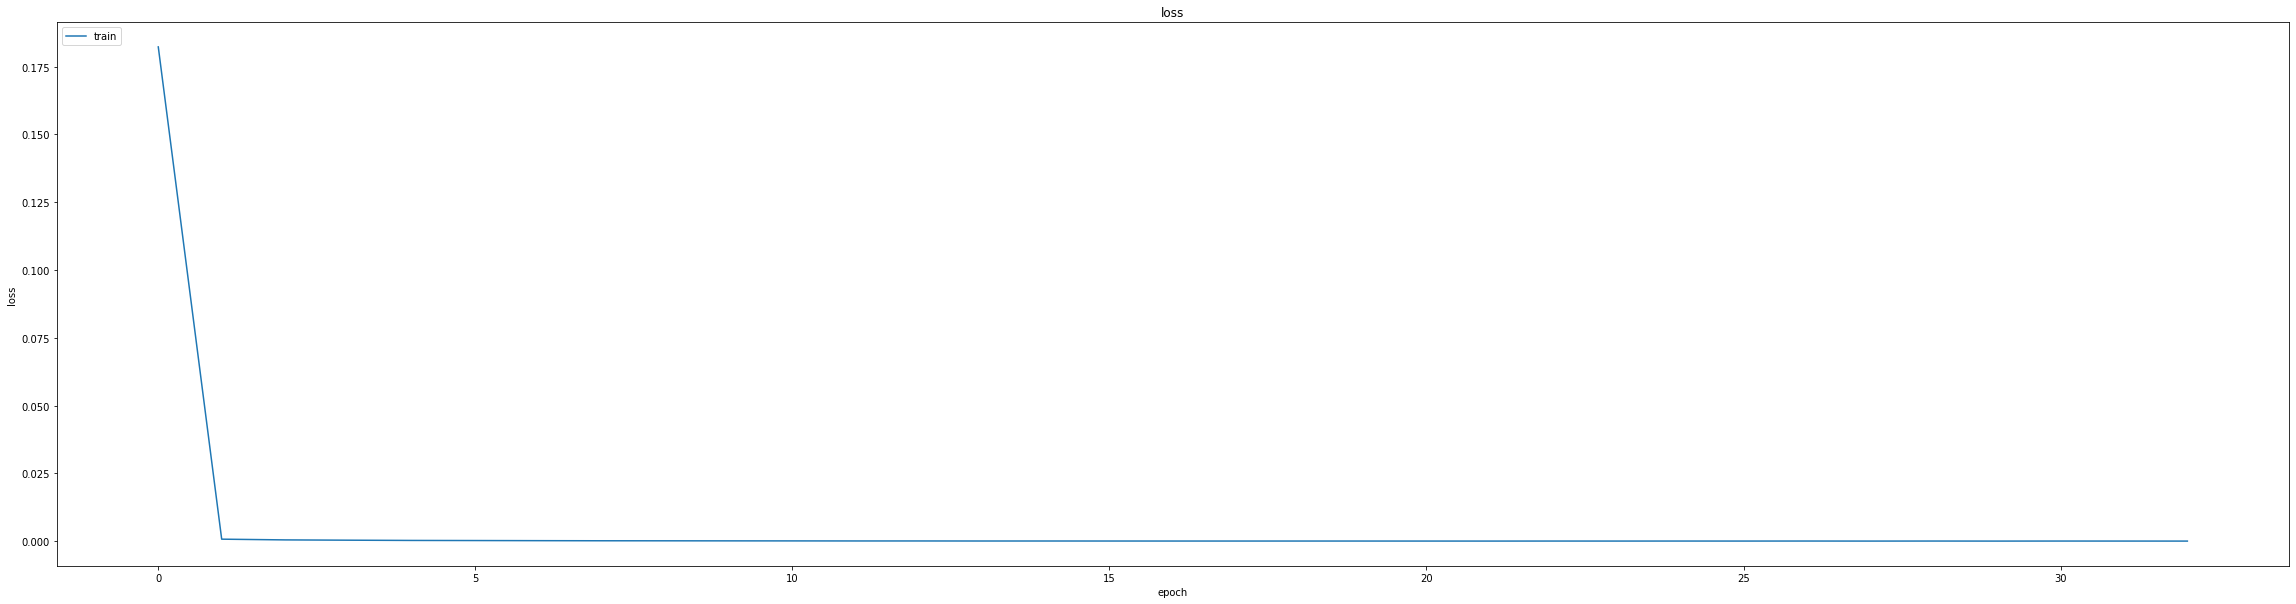

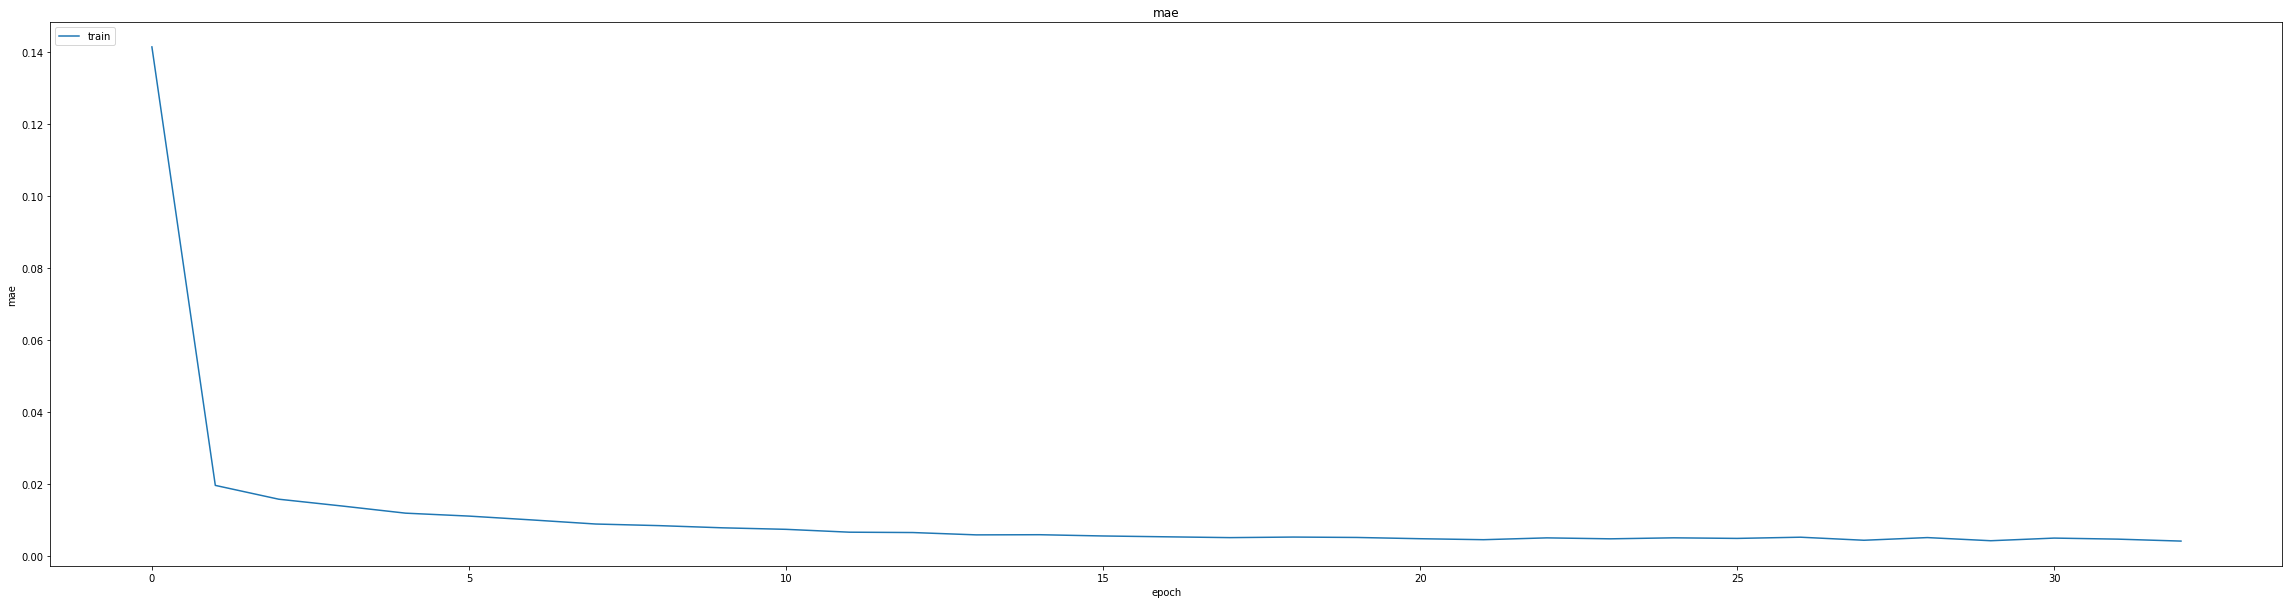

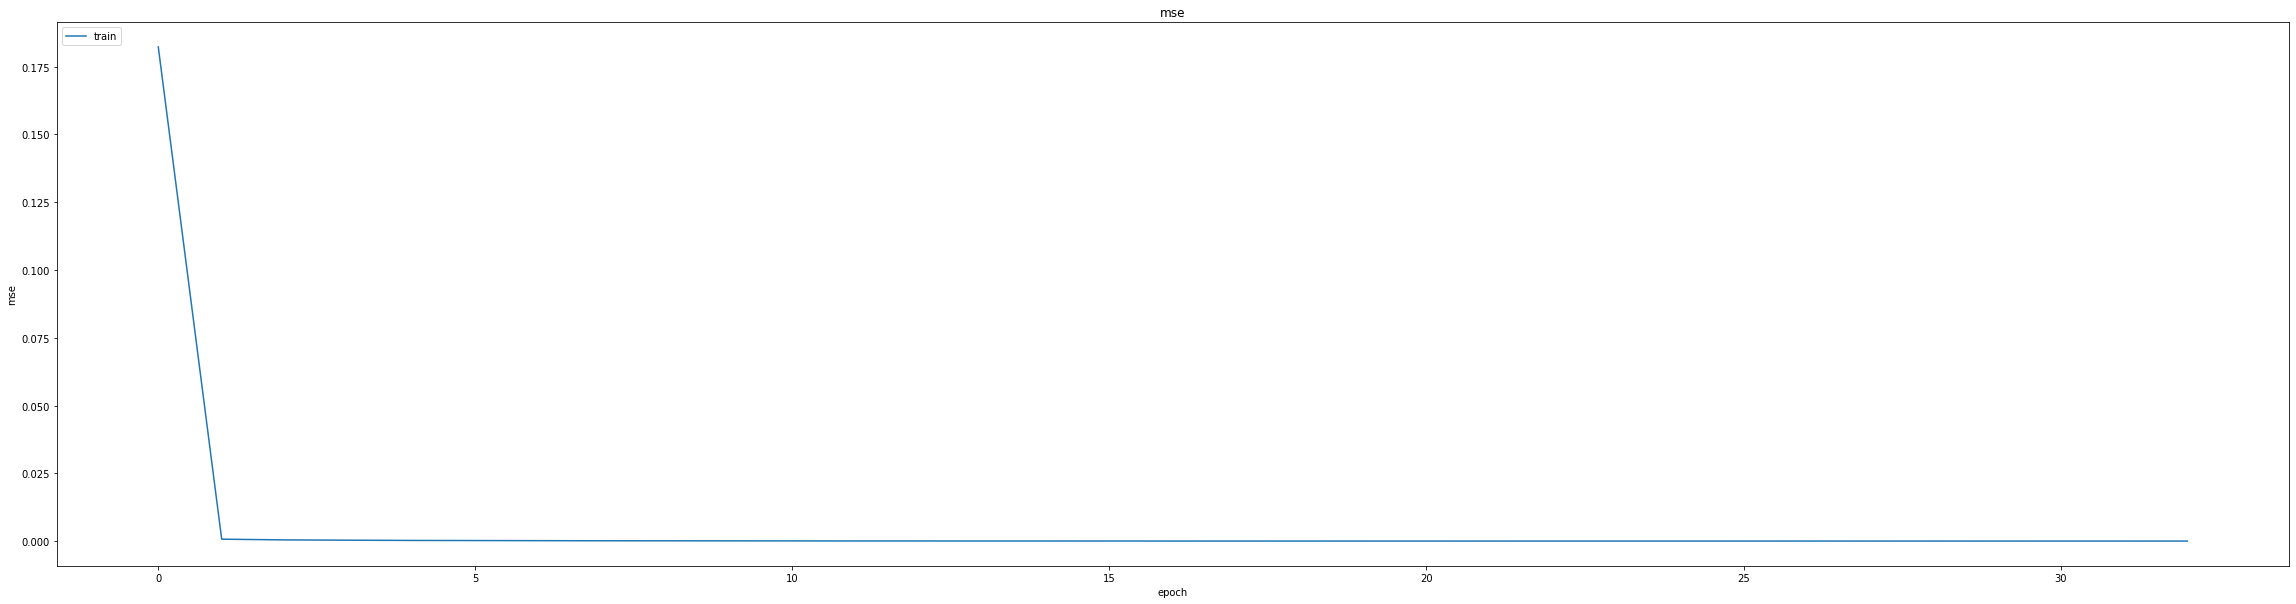

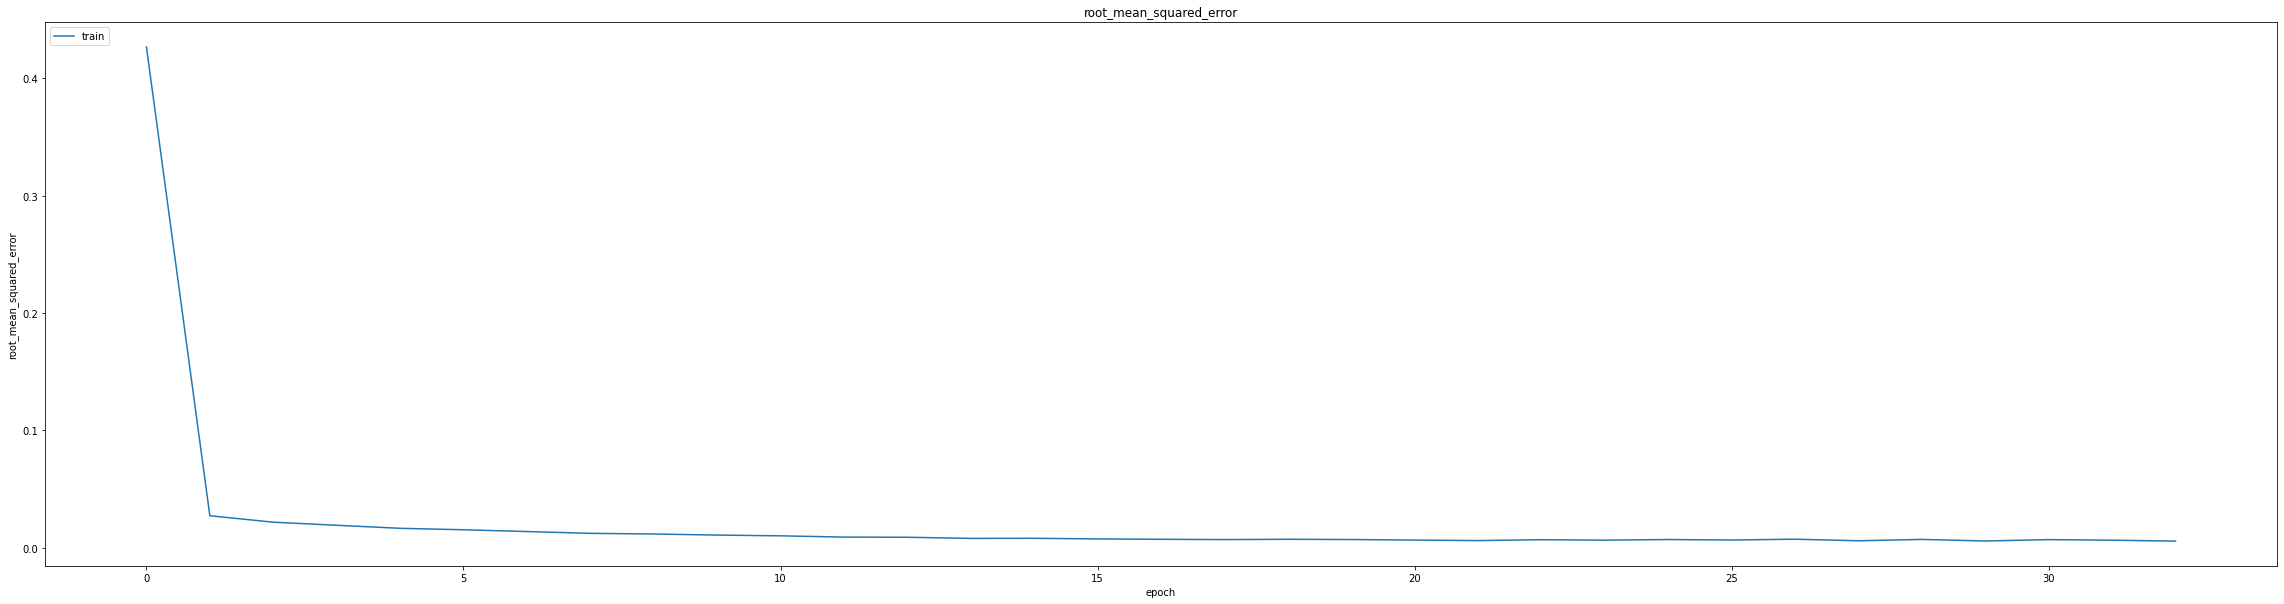

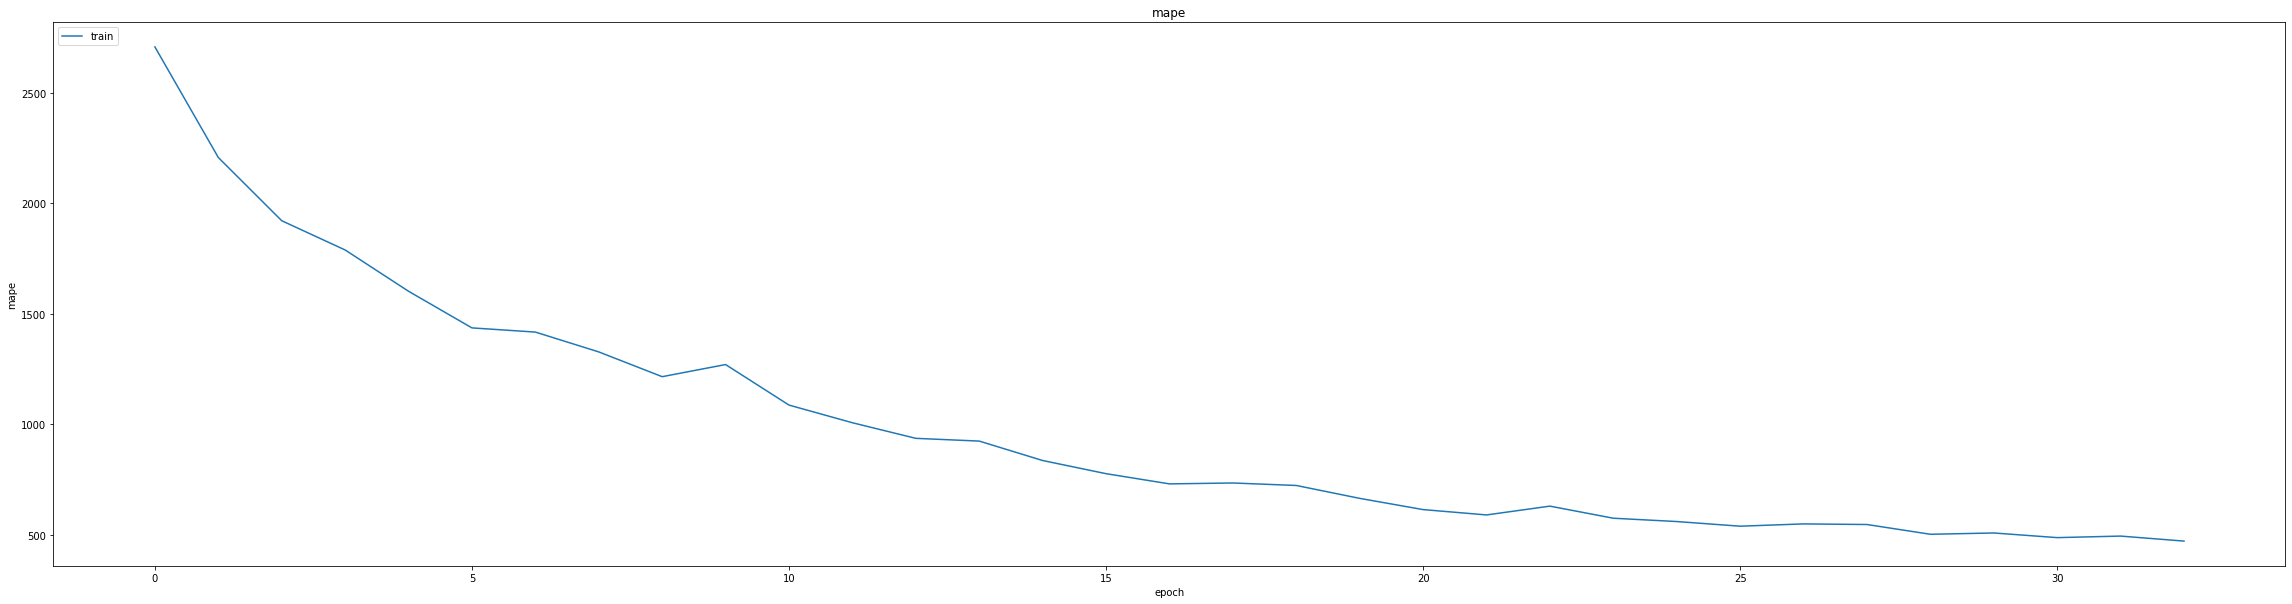

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.01747732236981392
0.023858705535531044
234/234 [==============================] - 12s 39ms/step
0.9321583680348181


In [ ]:
model.load_weights("weights.best.hdf5")
early_stopping = EarlyStopping(monitor='val_mse', patience=15)
from keras.callbacks import LearningRateScheduler
import keras.backend as K

def scheduler(epoch):
    if epoch%2==0 and epoch!=0:
        lr = K.get_value(model.optimizer.lr)
        K.set_value(model.optimizer.lr, lr*.9)
        print("lr changed to {}".format(lr*.9))
    return K.get_value(model.optimizer.lr)
lr_decay = LearningRateScheduler(scheduler)

callbacks_list = [checkpoint, lr_decay, early_stopping]

Epochs=int(Epochs/3)
Batch_size=128
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/25
464/464 [==============================] - ETA: 0s - loss: 6.3526e-04 - mae: 0.0150 - mse: 6.3526e-04 - root_mean_squared_error: 0.0252 - mape: 1508.3263
Epoch 1: val_mse did not improve from 0.00057
464/464 [==============================] - 145s 288ms/step - loss: 6.3526e-04 - mae: 0.0150 - mse: 6.3526e-04 - root_mean_squared_error: 0.0252 - mape: 1508.3263 - val_loss: 7.6727e-04 - val_mae: 0.0233 - val_mse: 7.6727e-04 - val_root_mean_squared_error: 0.0277 - val_mape: 10237.3291 - lr: 0.0010
Epoch 2/25
464/464 [==============================] - ETA: 0s - loss: 1.9131e-04 - mae: 0.0102 - mse: 1.9131e-04 - root_mean_squared_error: 0.0138 - mape: 1207.5902
Epoch 2: val_mse did not improve from 0.00057
464/464 [==============================] - 127s 274ms/step - loss: 1.9131e-04 - mae: 0.0102 - mse: 1.9131e-04 - root_mean_squared_error: 0.0138 - mape: 1207.5902 - val_loss: 6.6851e-04 - val_mae: 0.0215 - val_mse: 6.6851e-04 - val_root_mean_squared_error: 0.0259 - val_mape: 8731

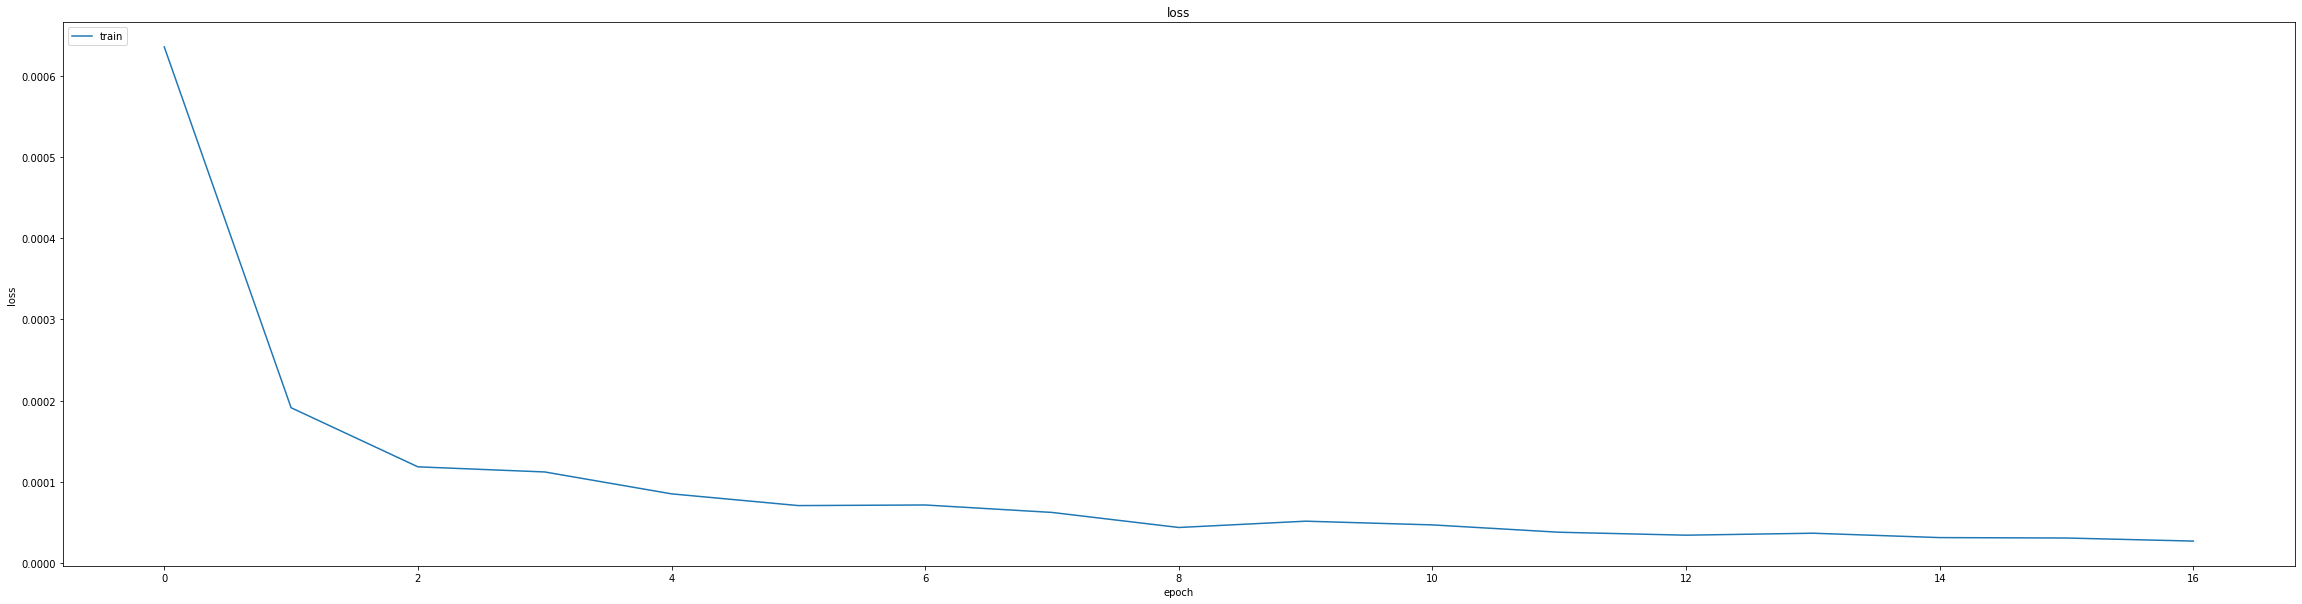

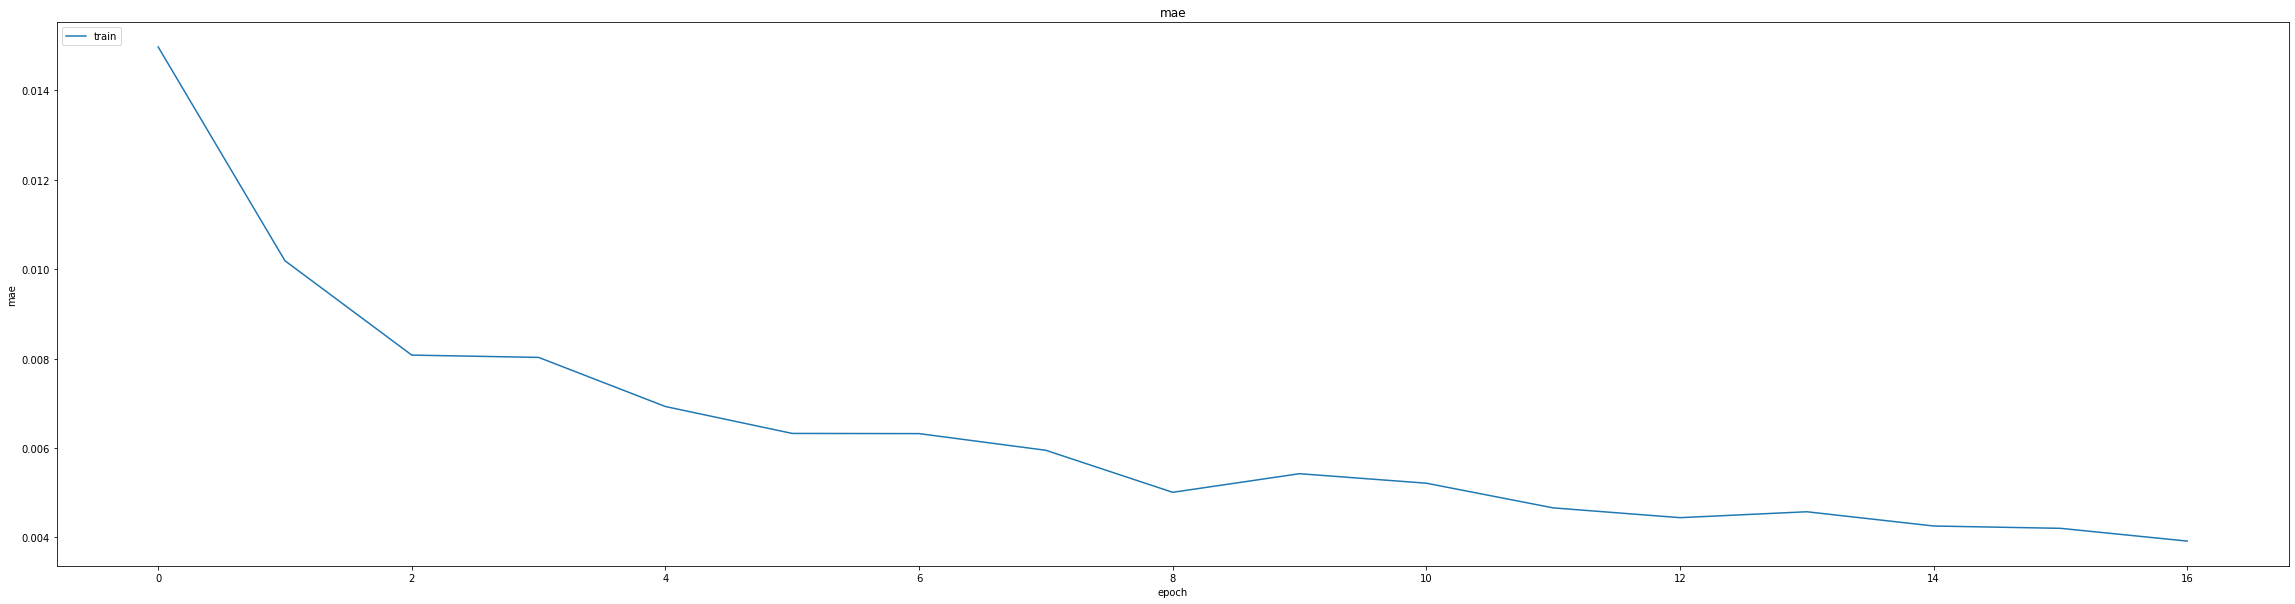

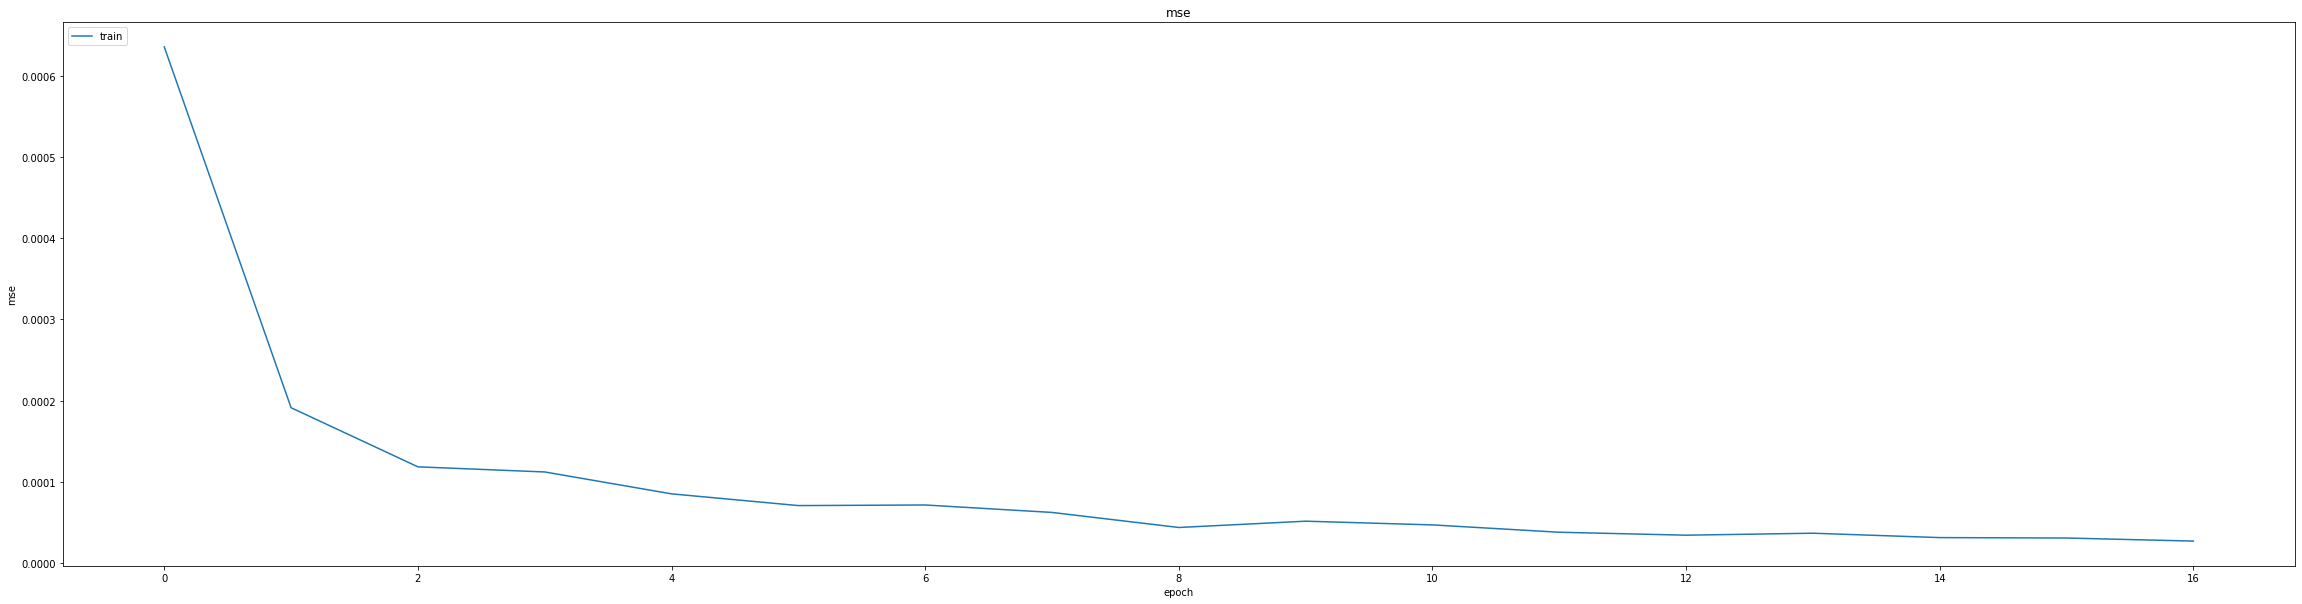

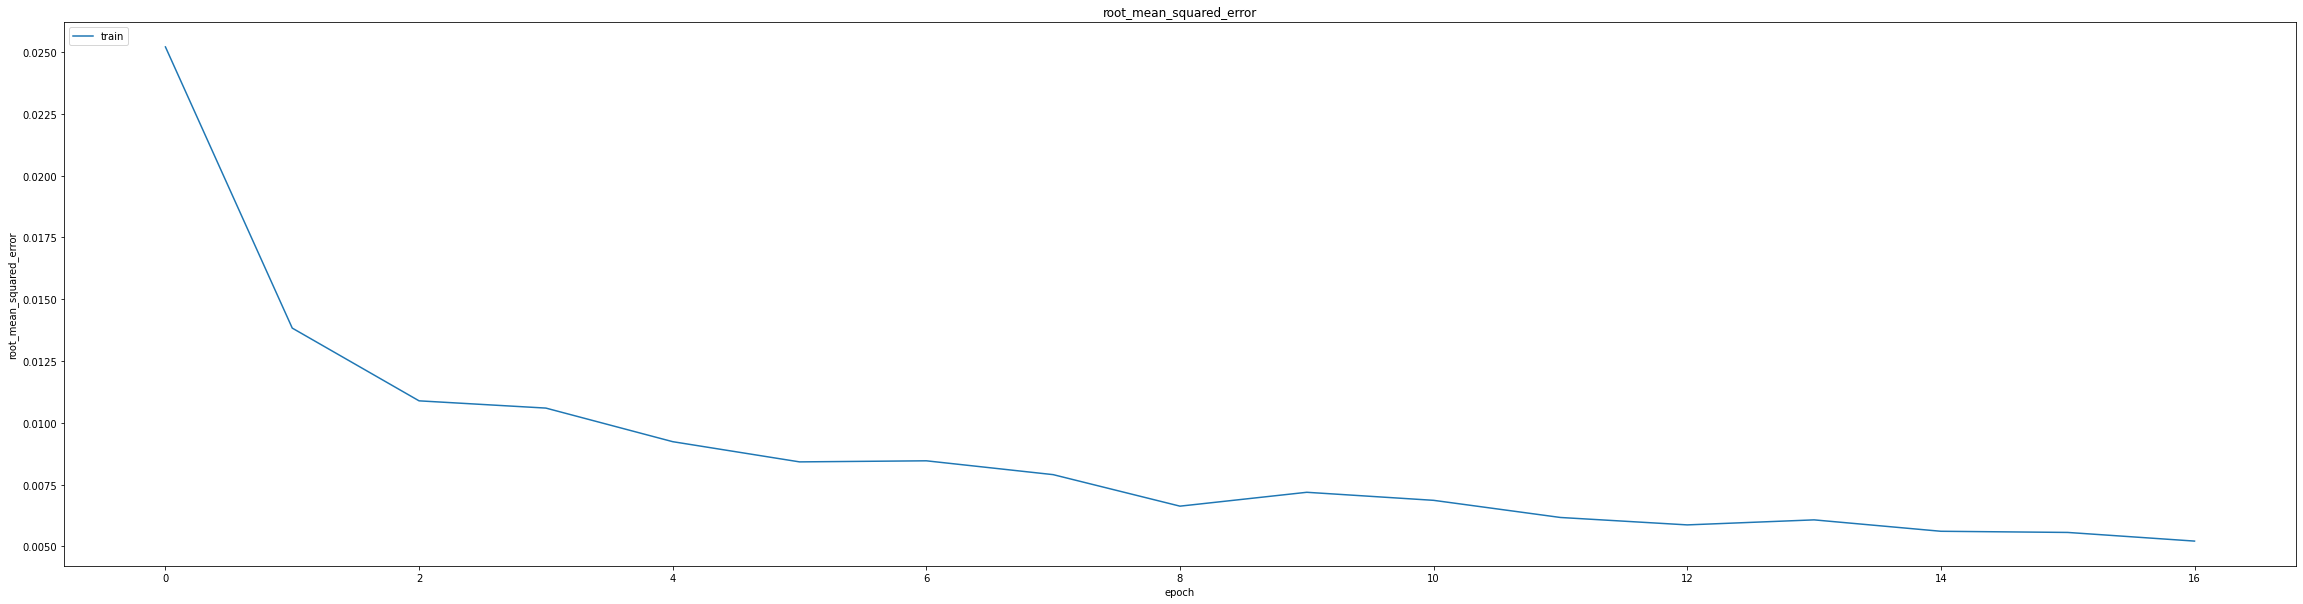

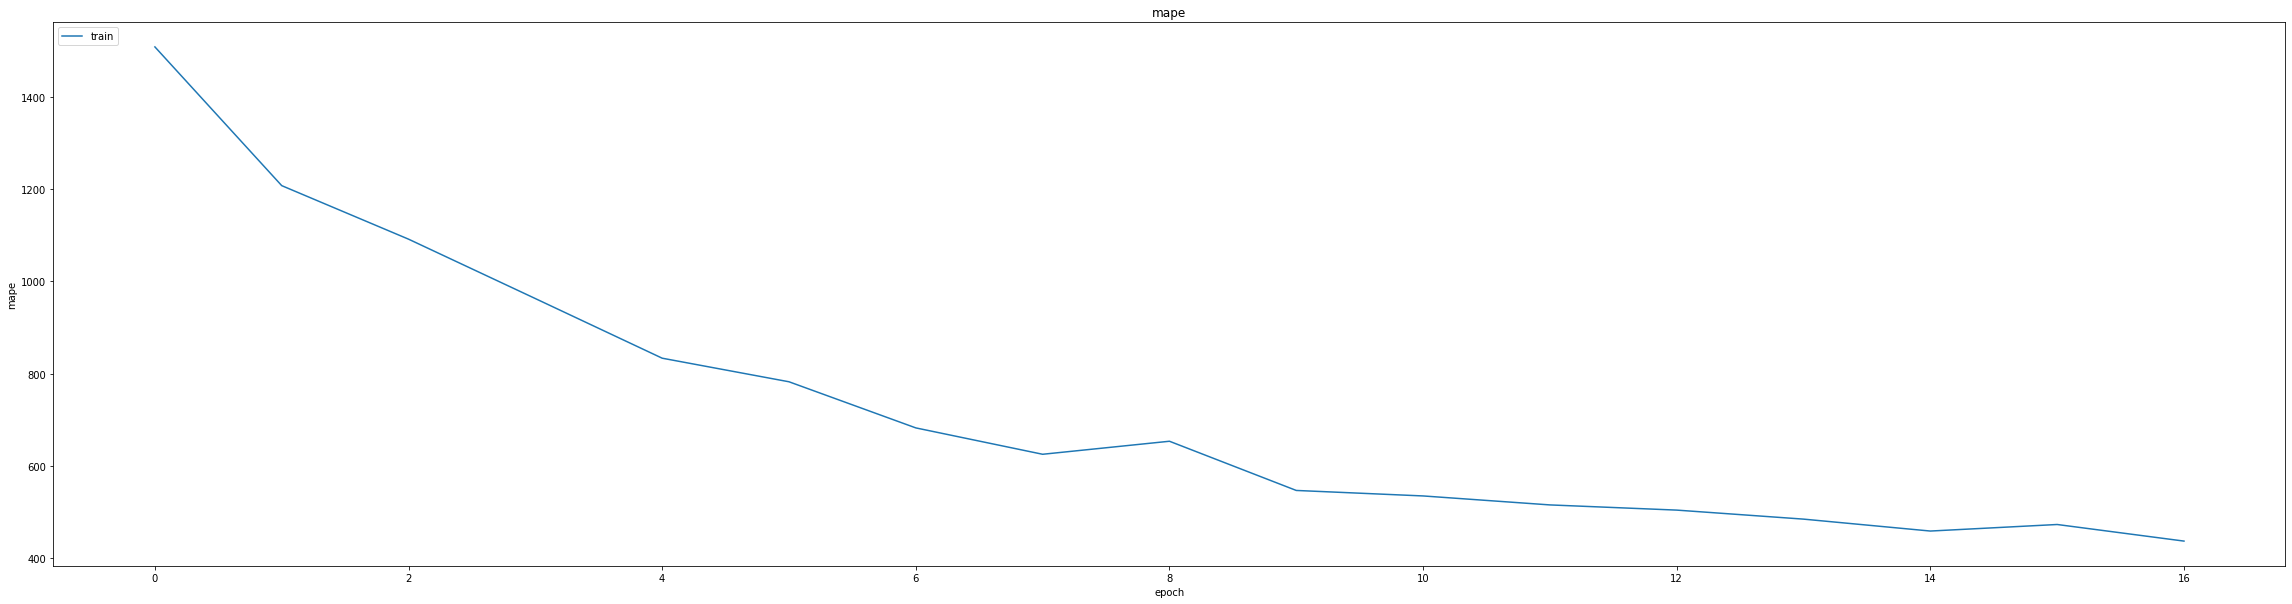

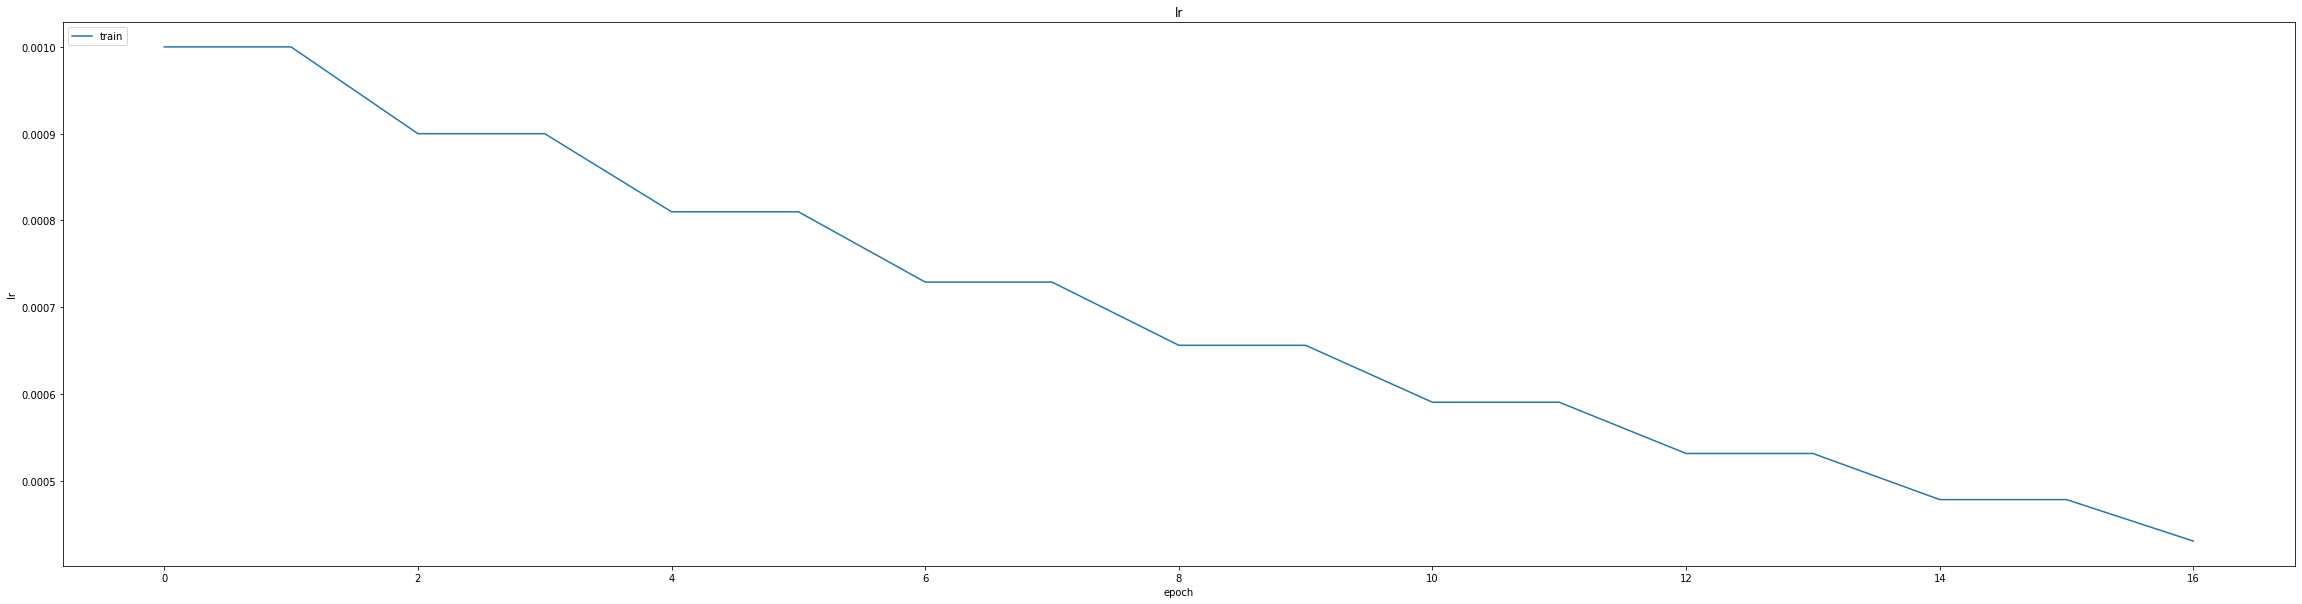

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.021486444398760796
0.02585555613040924
234/234 [==============================] - 9s 38ms/step
0.9832000474746301


234/234 [==============================] - 9s 39ms/step


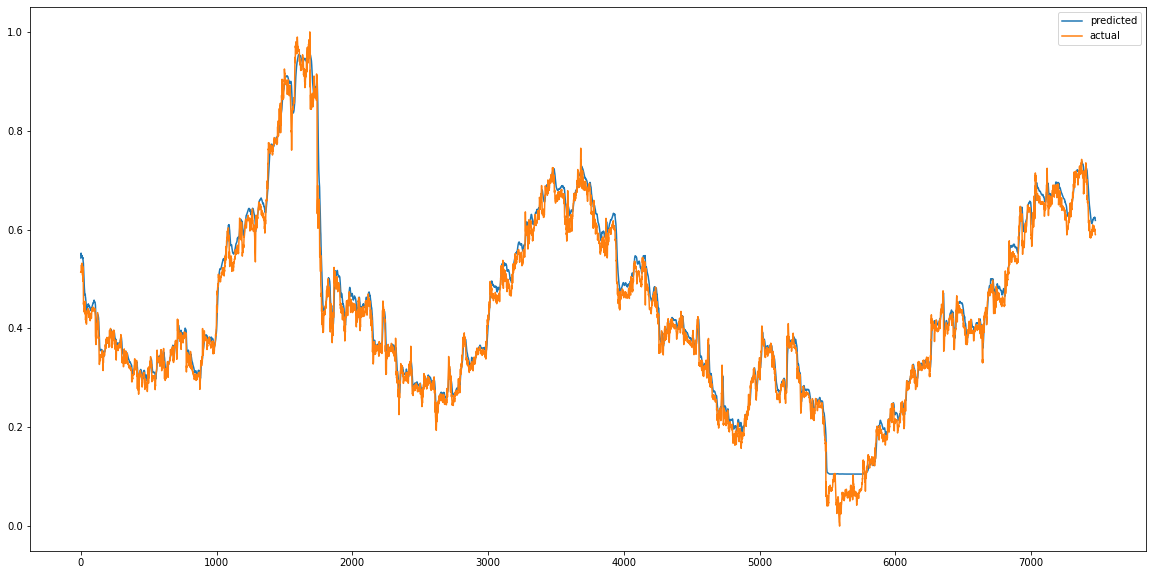

In [ ]:
model.load_weights("weights.best.hdf5")
val_predictions=thesis.CreatPrediction(model,x_val, y_val)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


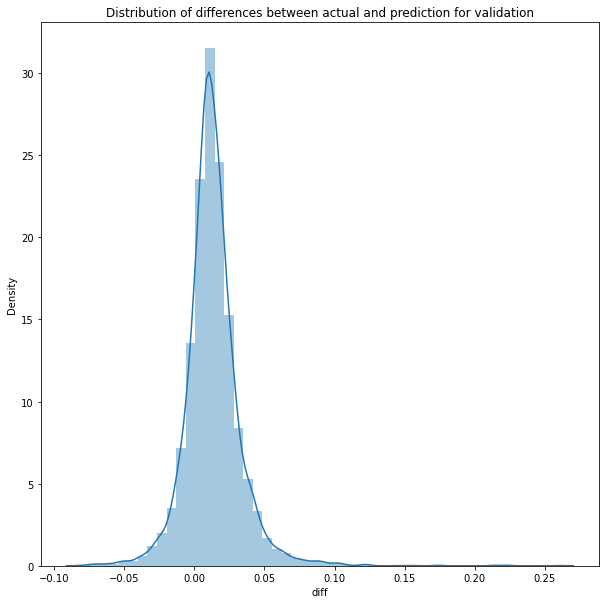

In [ ]:
val_predictions['diff'] = val_predictions['predicted'] - val_predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(val_predictions['diff']);
plt.title('Distribution of differences between actual and prediction for validation')
plt.show()

229/229 [==============================] - 9s 38ms/step


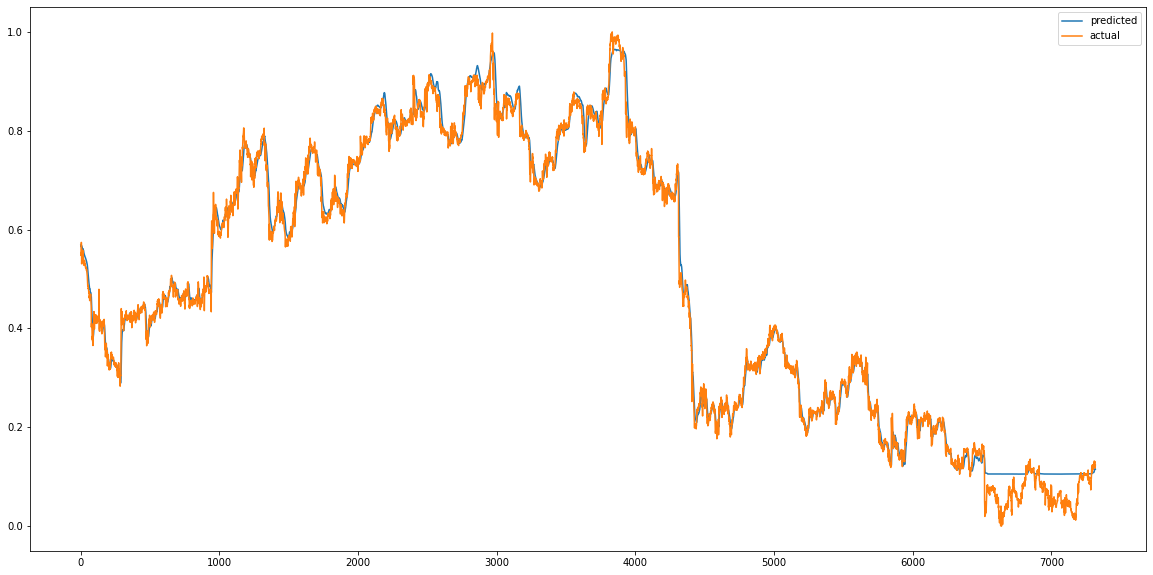

In [ ]:
predictions=thesis.CreatPrediction(model,x_test, y_test)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


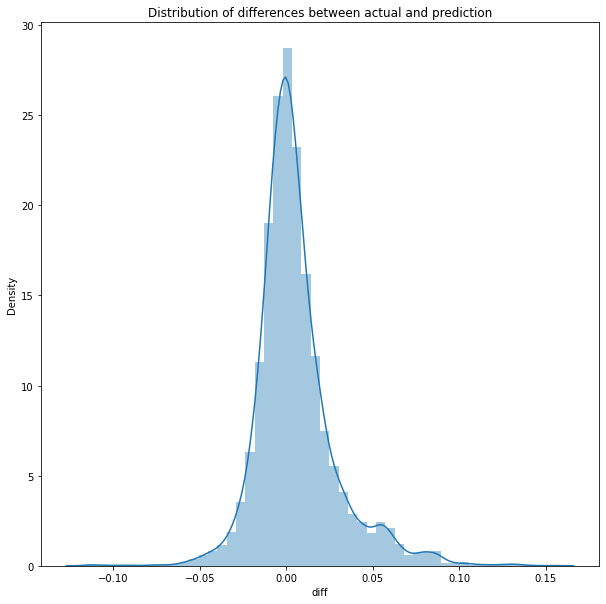

In [ ]:
predictions['diff'] = predictions['predicted'] - predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(predictions['diff']);
plt.title('Distribution of differences between actual and prediction')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
print("MSE : ", mean_squared_error(predictions['predicted'].values, predictions['actual'].values))
print("MAE : ", mean_absolute_error(predictions['predicted'].values, predictions['actual'].values))
from math import sqrt

print('RMSE  :', sqrt(mean_squared_error(predictions['predicted'].values, predictions['actual'].values)))

test_r2_scr = thesis.R_Squared_Score(model, x_test, y_test)
print('R2_Score  :',test_r2_scr)


predictions['diff'].describe()

MSE :  0.0005652859689203109
MAE :  0.01580990810918912
RMSE  : 0.023775743288492808
229/229 [==============================] - 9s 39ms/step
R2_Score  : 0.9929454810130286


count    7319.000000
mean        0.005567
std         0.023116
min        -0.115428
25%        -0.007217
50%         0.001759
75%         0.013897
max         0.154509
Name: diff, dtype: float64

In [ ]:
model= thesis.GRU_Model(x_train)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 24, 256)           207360    
                                                                 
 gru_1 (GRU)                 (None, 24, 64)            61824     
                                                                 
 dropout (Dropout)           (None, 24, 64)            0         
                                                                 
 gru_2 (GRU)                 (None, 16)                3936      
                                                                 
 dense (Dense)               (None, 32)                544       
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 1)                 1

In [ ]:
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping

# Set the metric you want to monitor, the threshold, and the patience value
early_stopping = EarlyStopping(monitor='val_mse', patience=30)

checkpoint = ModelCheckpoint("weights.best.hdf5", monitor='val_mse', verbose=1, save_best_only=True, mode='min')

# Fit
callbacks_list = [checkpoint, early_stopping ]

Epochs=75
Batch_size=128
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/75
464/464 [==============================] - ETA: 0s - loss: 827.1712 - mae: 13.3524 - mse: 827.1712 - root_mean_squared_error: 28.7606 - mape: 109747.9688
Epoch 1: val_mse improved from inf to 8.00251, saving model to weights.best.hdf5
464/464 [==============================] - 117s 238ms/step - loss: 827.1712 - mae: 13.3524 - mse: 827.1712 - root_mean_squared_error: 28.7606 - mape: 109747.9688 - val_loss: 8.0025 - val_mae: 2.8229 - val_mse: 8.0025 - val_root_mean_squared_error: 2.8289 - val_mape: 436085.5938
Epoch 2/75
464/464 [==============================] - ETA: 0s - loss: 4.1660 - mae: 1.9875 - mse: 4.1660 - root_mean_squared_error: 2.0411 - mape: 38340.6406
Epoch 2: val_mse improved from 8.00251 to 1.86268, saving model to weights.best.hdf5
464/464 [==============================] - 102s 219ms/step - loss: 4.1660 - mae: 1.9875 - mse: 4.1660 - root_mean_squared_error: 2.0411 - mape: 38340.6406 - val_loss: 1.8627 - val_mae: 1.3523 - val_mse: 1.8627 - val_root_mean_square

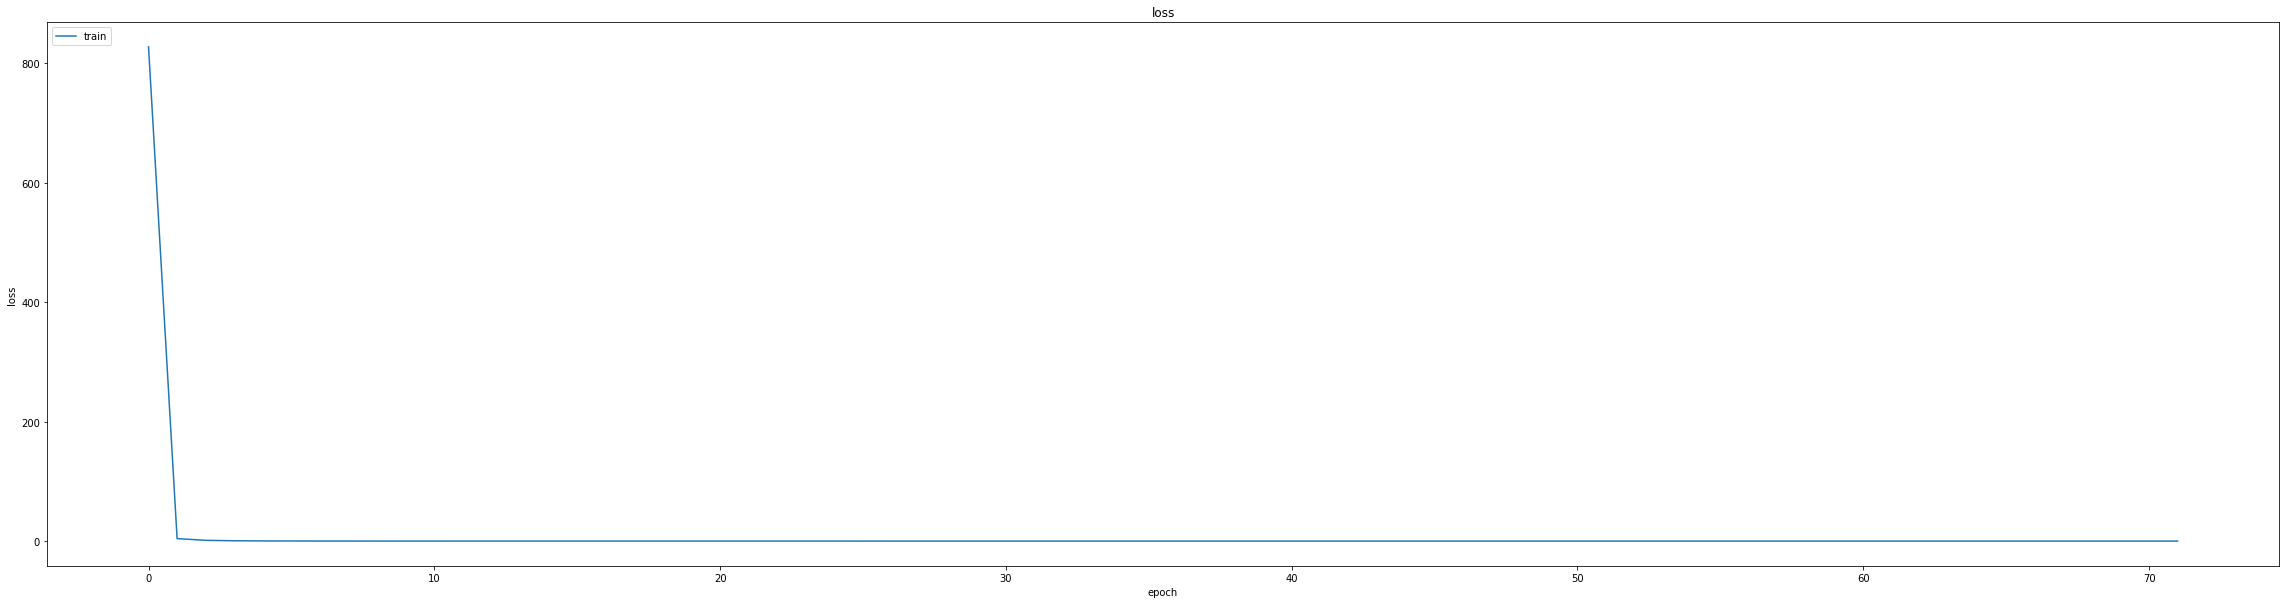

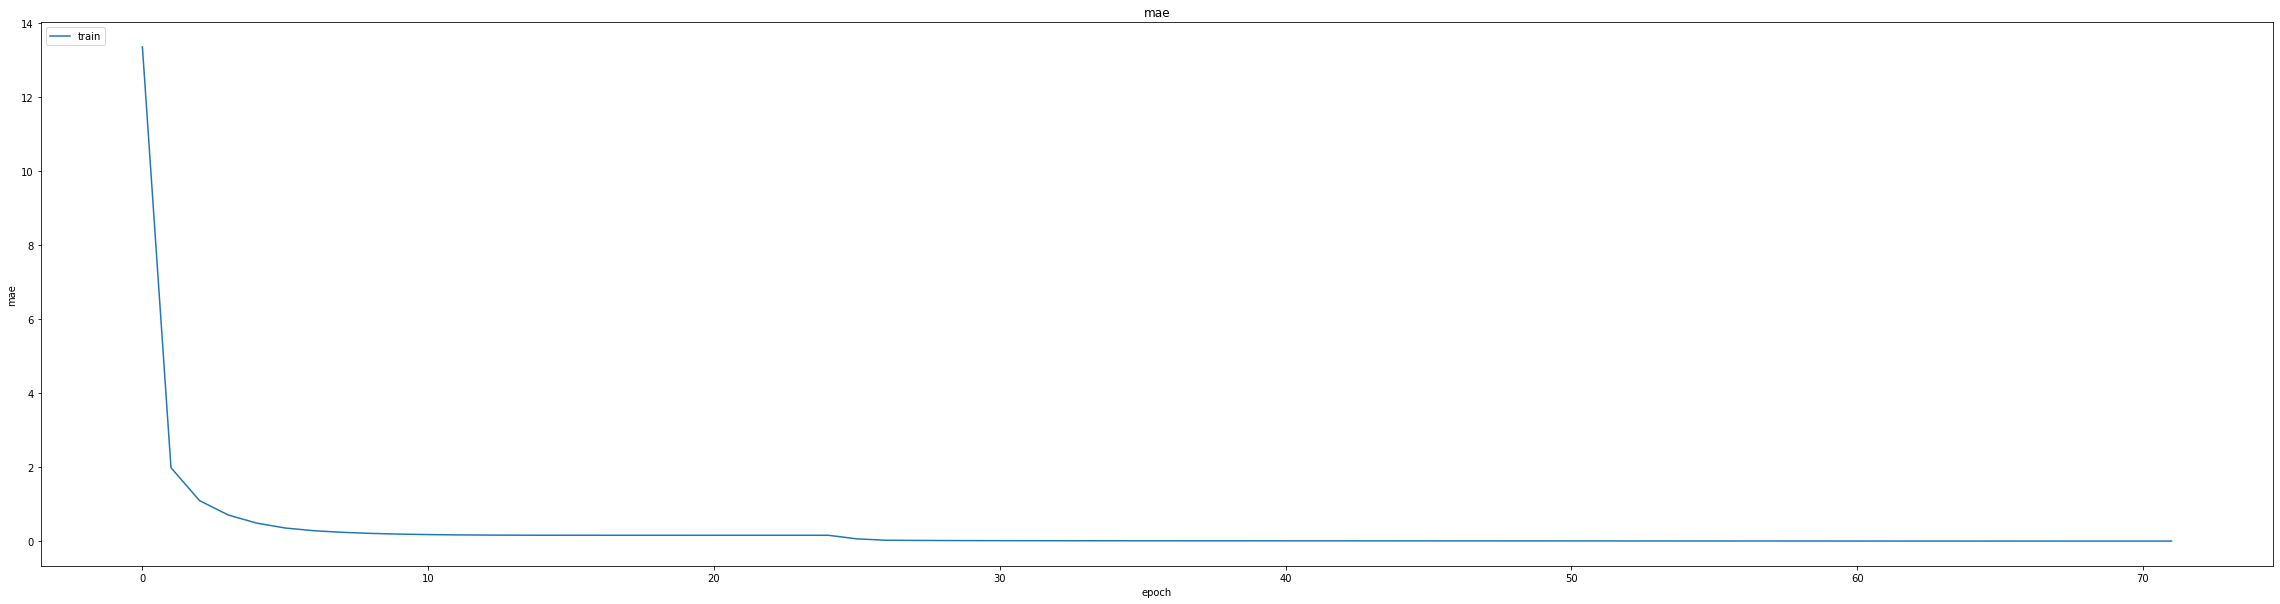

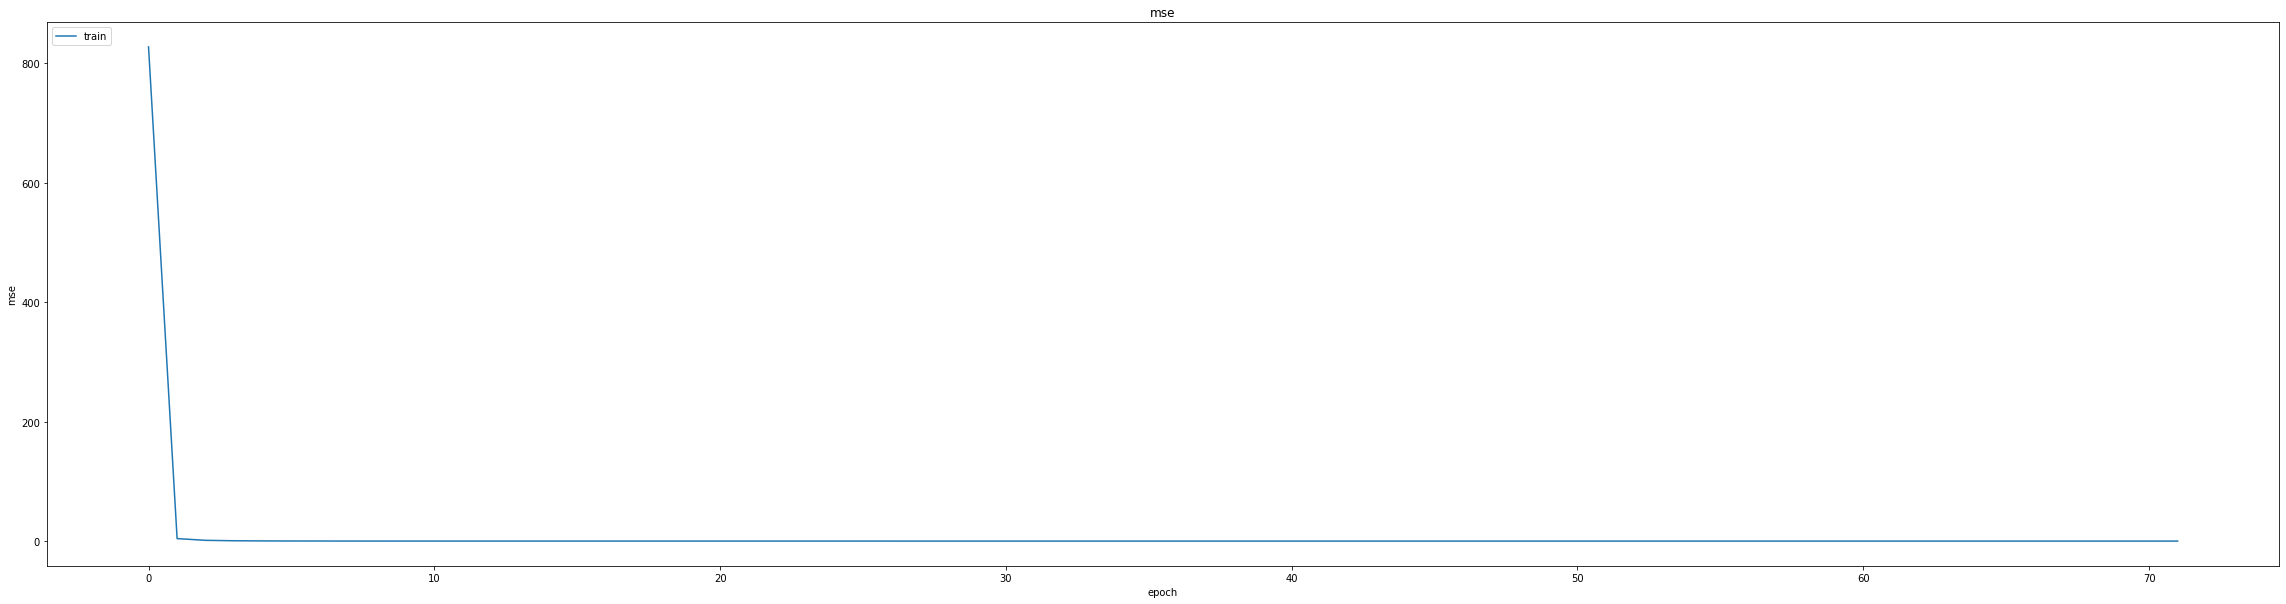

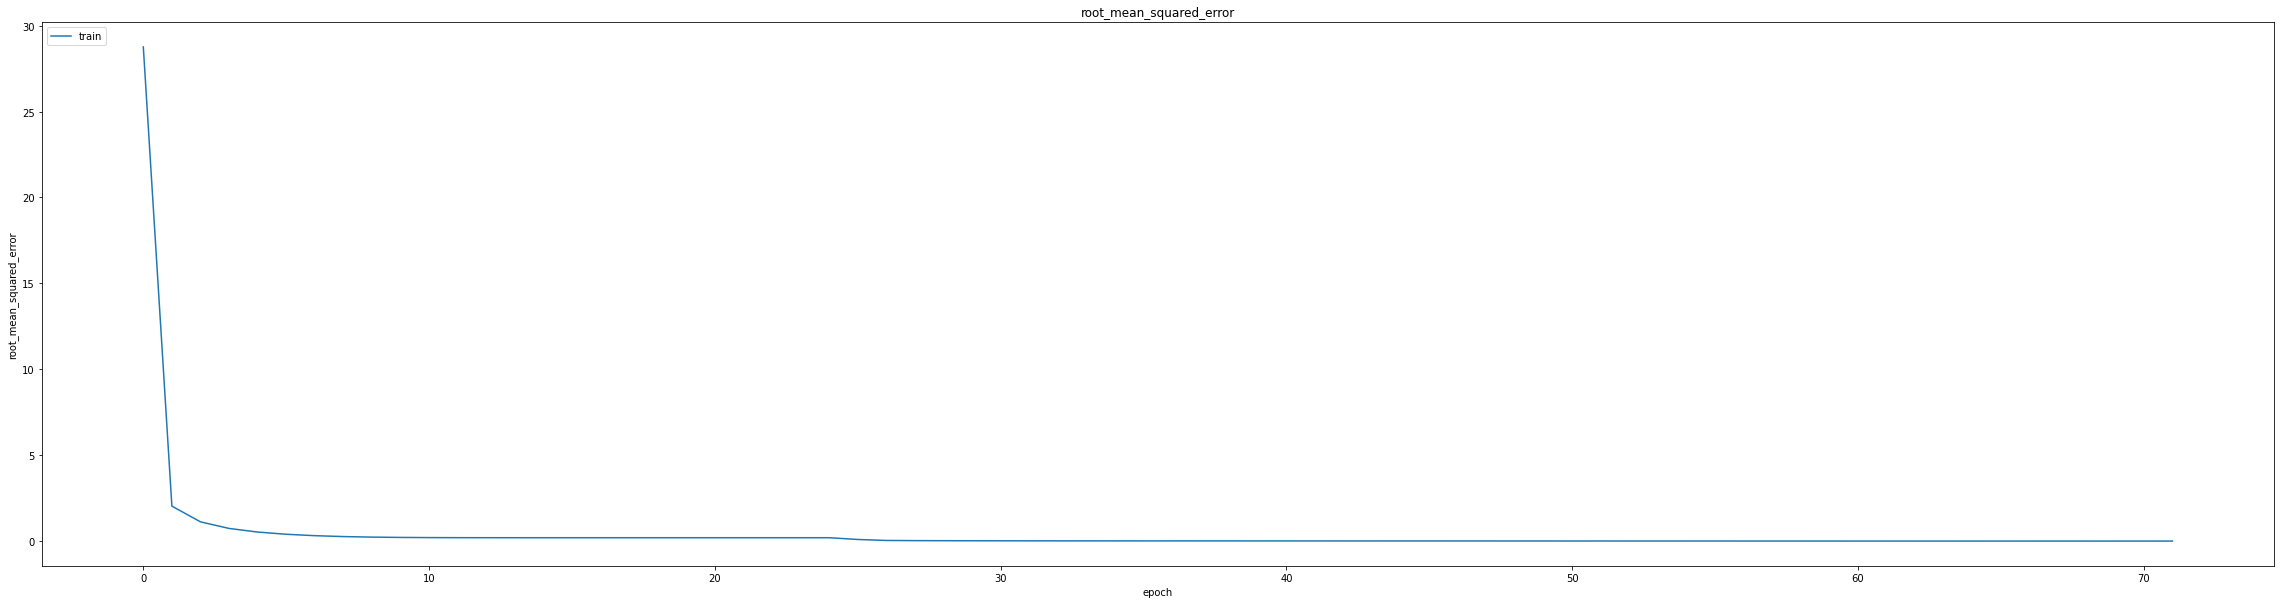

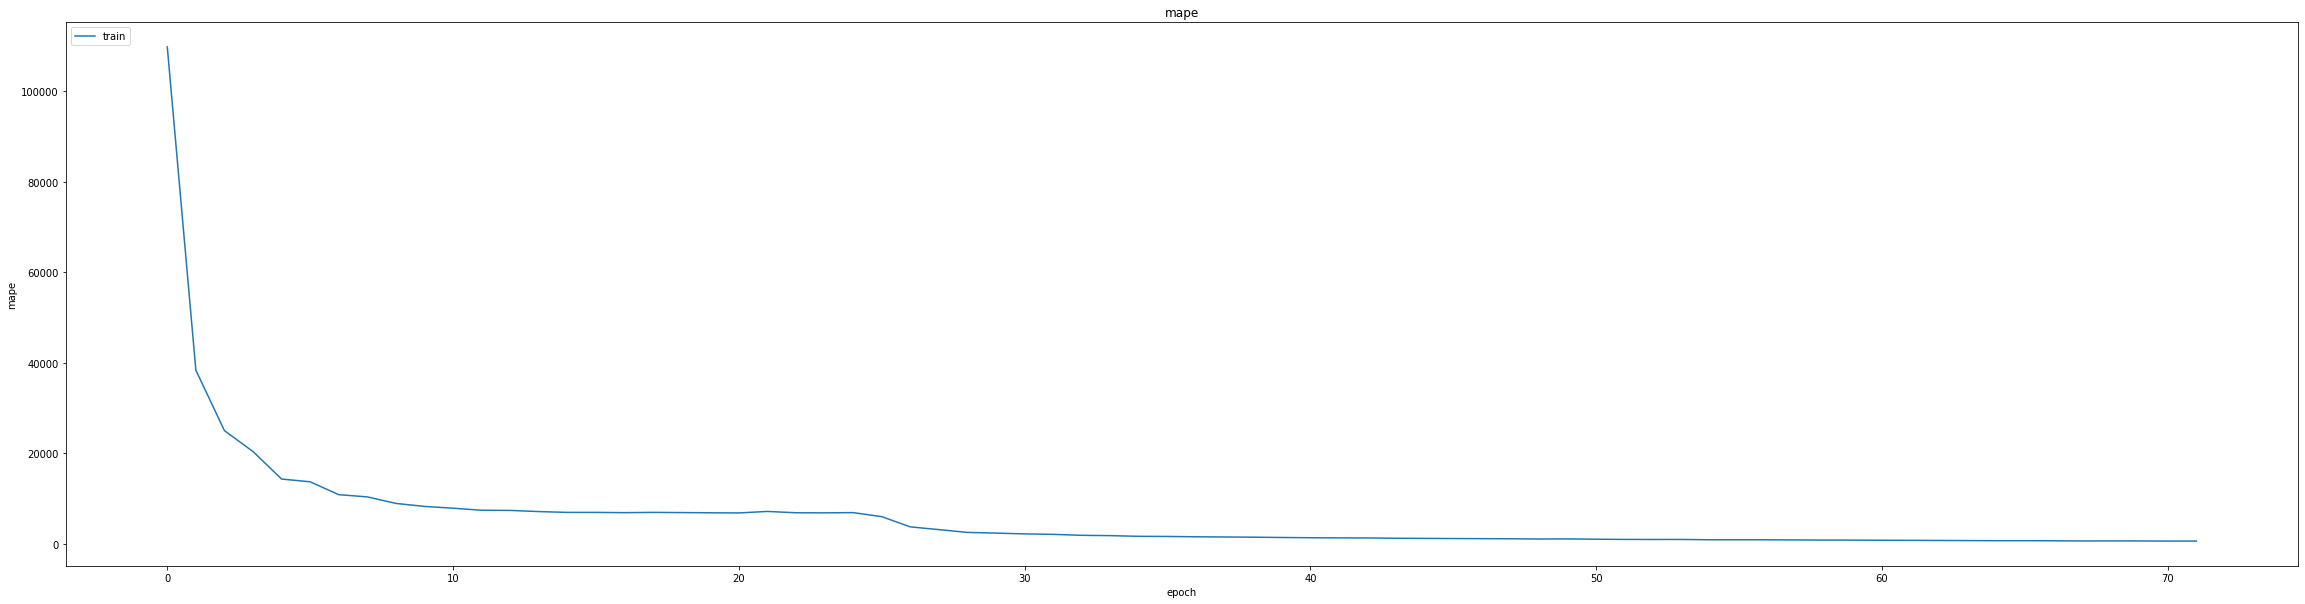

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.02513914555311203
0.03483765199780464
234/234 [==============================] - 9s 33ms/step
0.8793704512011964


In [ ]:
model.load_weights("weights.best.hdf5")
early_stopping = EarlyStopping(monitor='val_mse', patience=15)
from keras.callbacks import LearningRateScheduler
import keras.backend as K

def scheduler(epoch):
    if epoch%2==0 and epoch!=0:
        lr = K.get_value(model.optimizer.lr)
        K.set_value(model.optimizer.lr, lr*.9)
        print("lr changed to {}".format(lr*.9))
    return K.get_value(model.optimizer.lr)
lr_decay = LearningRateScheduler(scheduler)

callbacks_list = [checkpoint, lr_decay, early_stopping]

Epochs=int(Epochs/3)
Batch_size=128
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/25
464/464 [==============================] - ETA: 0s - loss: 6.5218e-04 - mae: 0.0148 - mse: 6.5218e-04 - root_mean_squared_error: 0.0255 - mape: 1214.8021
Epoch 1: val_mse did not improve from 0.00121
464/464 [==============================] - 119s 240ms/step - loss: 6.5218e-04 - mae: 0.0148 - mse: 6.5218e-04 - root_mean_squared_error: 0.0255 - mape: 1214.8021 - val_loss: 0.0012 - val_mae: 0.0255 - val_mse: 0.0012 - val_root_mean_squared_error: 0.0352 - val_mape: 9873.0557 - lr: 0.0010
Epoch 2/25
464/464 [==============================] - ETA: 0s - loss: 2.2945e-04 - mae: 0.0113 - mse: 2.2945e-04 - root_mean_squared_error: 0.0151 - mape: 1204.0842
Epoch 2: val_mse did not improve from 0.00121
464/464 [==============================] - 106s 228ms/step - loss: 2.2945e-04 - mae: 0.0113 - mse: 2.2945e-04 - root_mean_squared_error: 0.0151 - mape: 1204.0842 - val_loss: 0.0014 - val_mae: 0.0285 - val_mse: 0.0014 - val_root_mean_squared_error: 0.0375 - val_mape: 10181.2070 - lr: 0.00

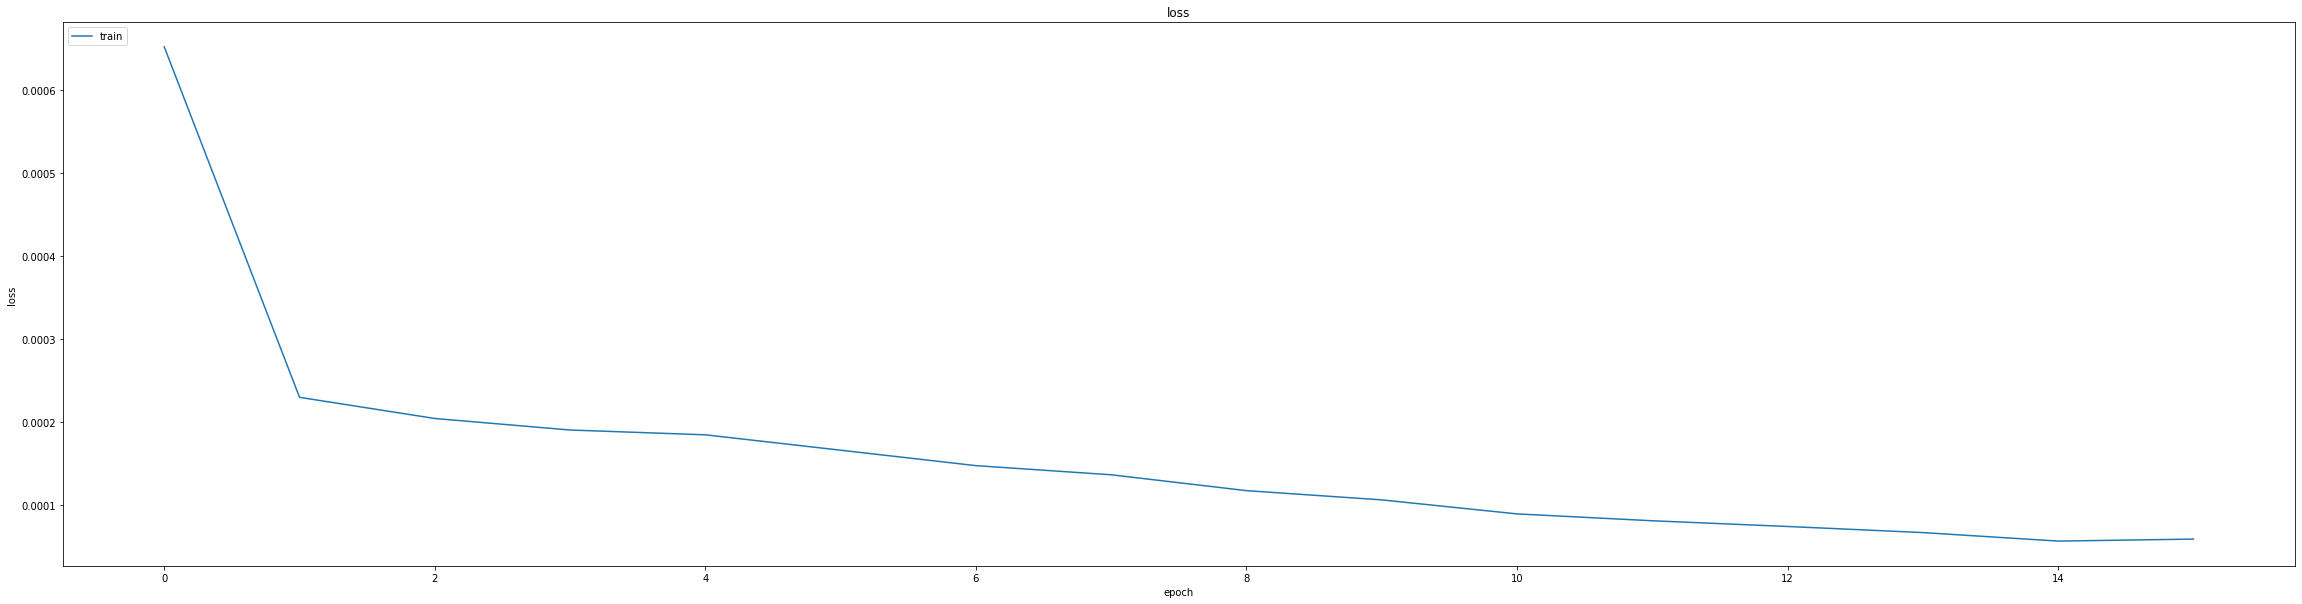

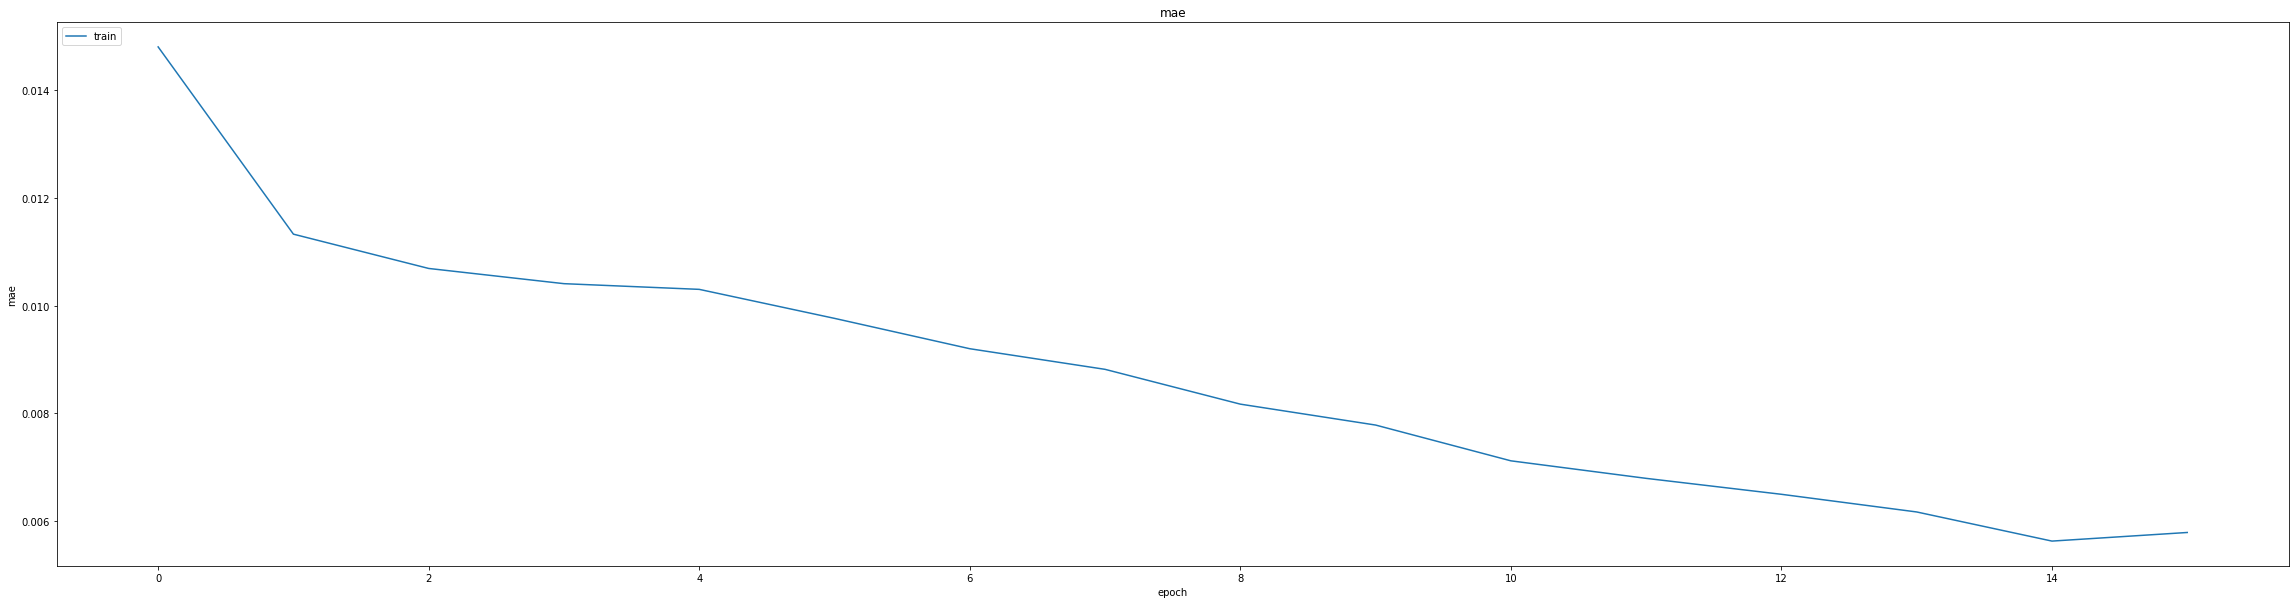

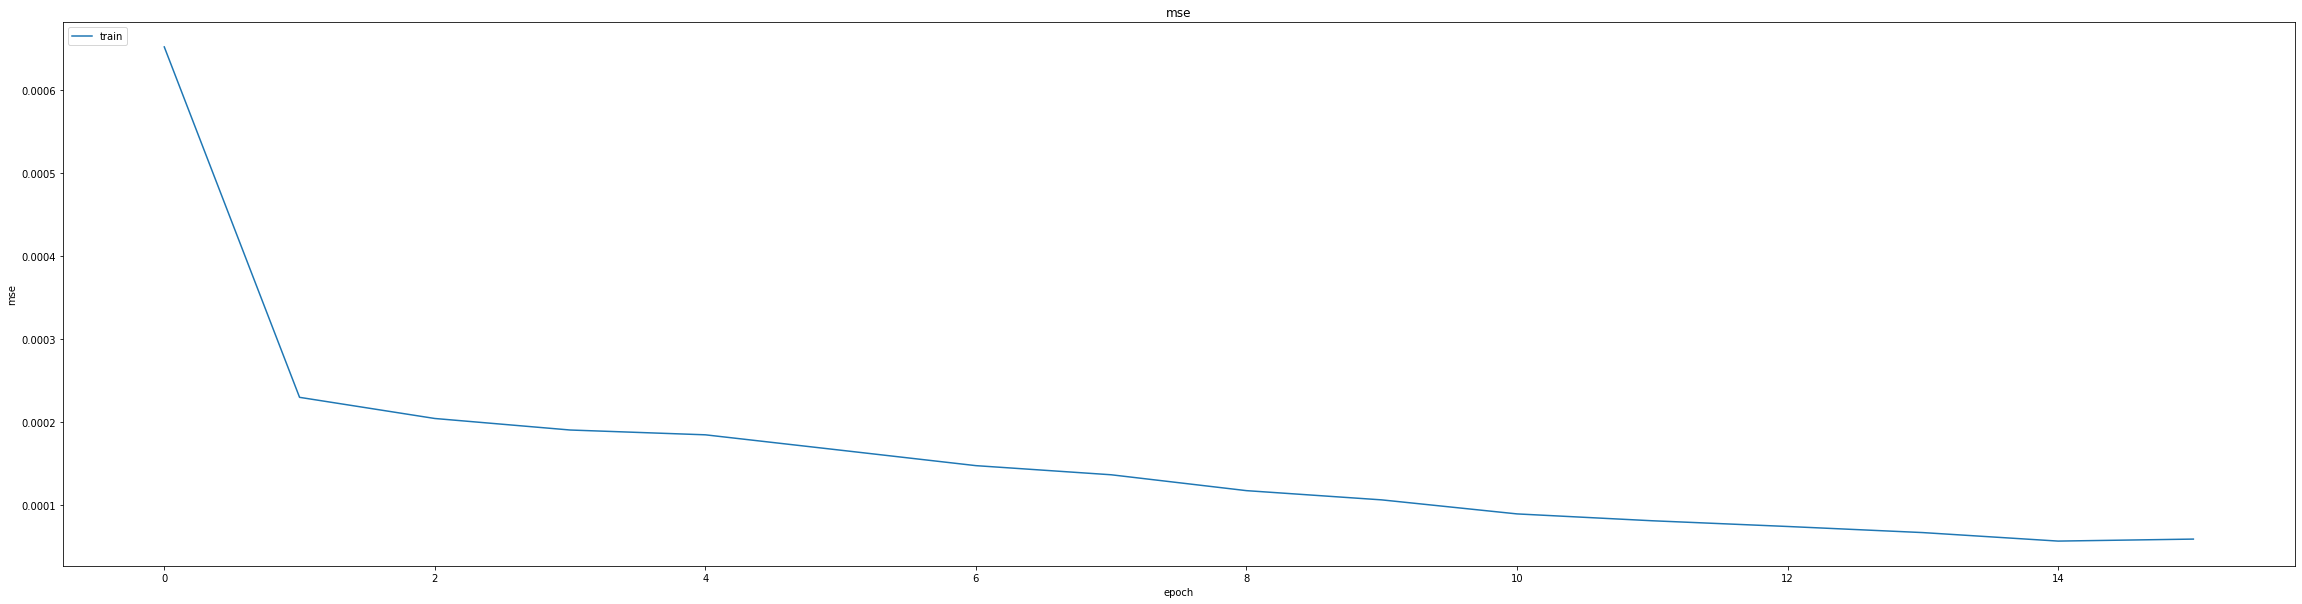

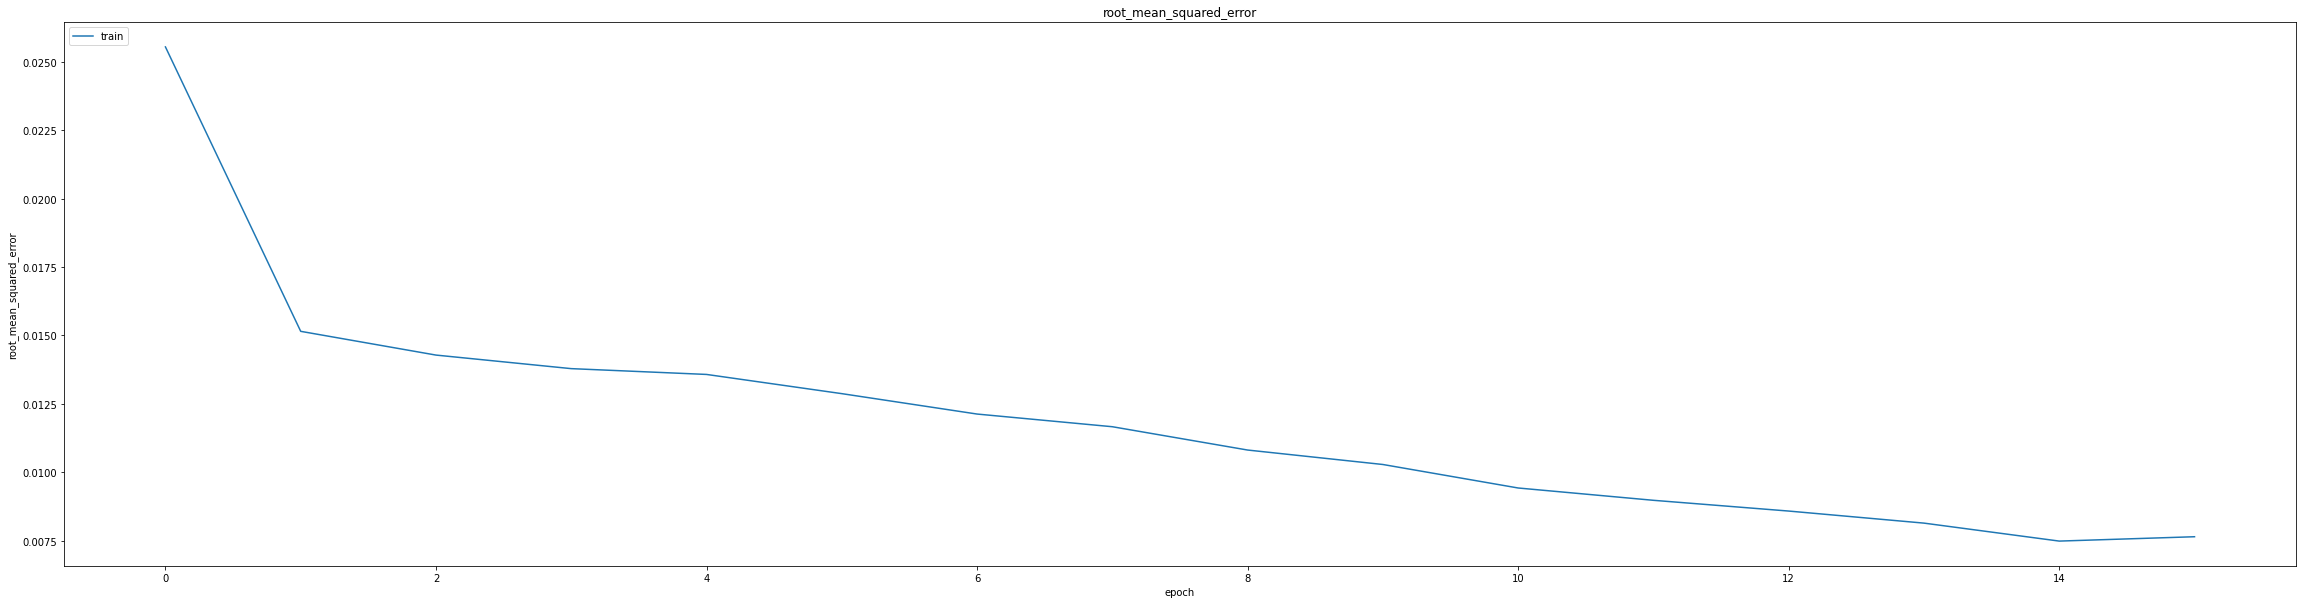

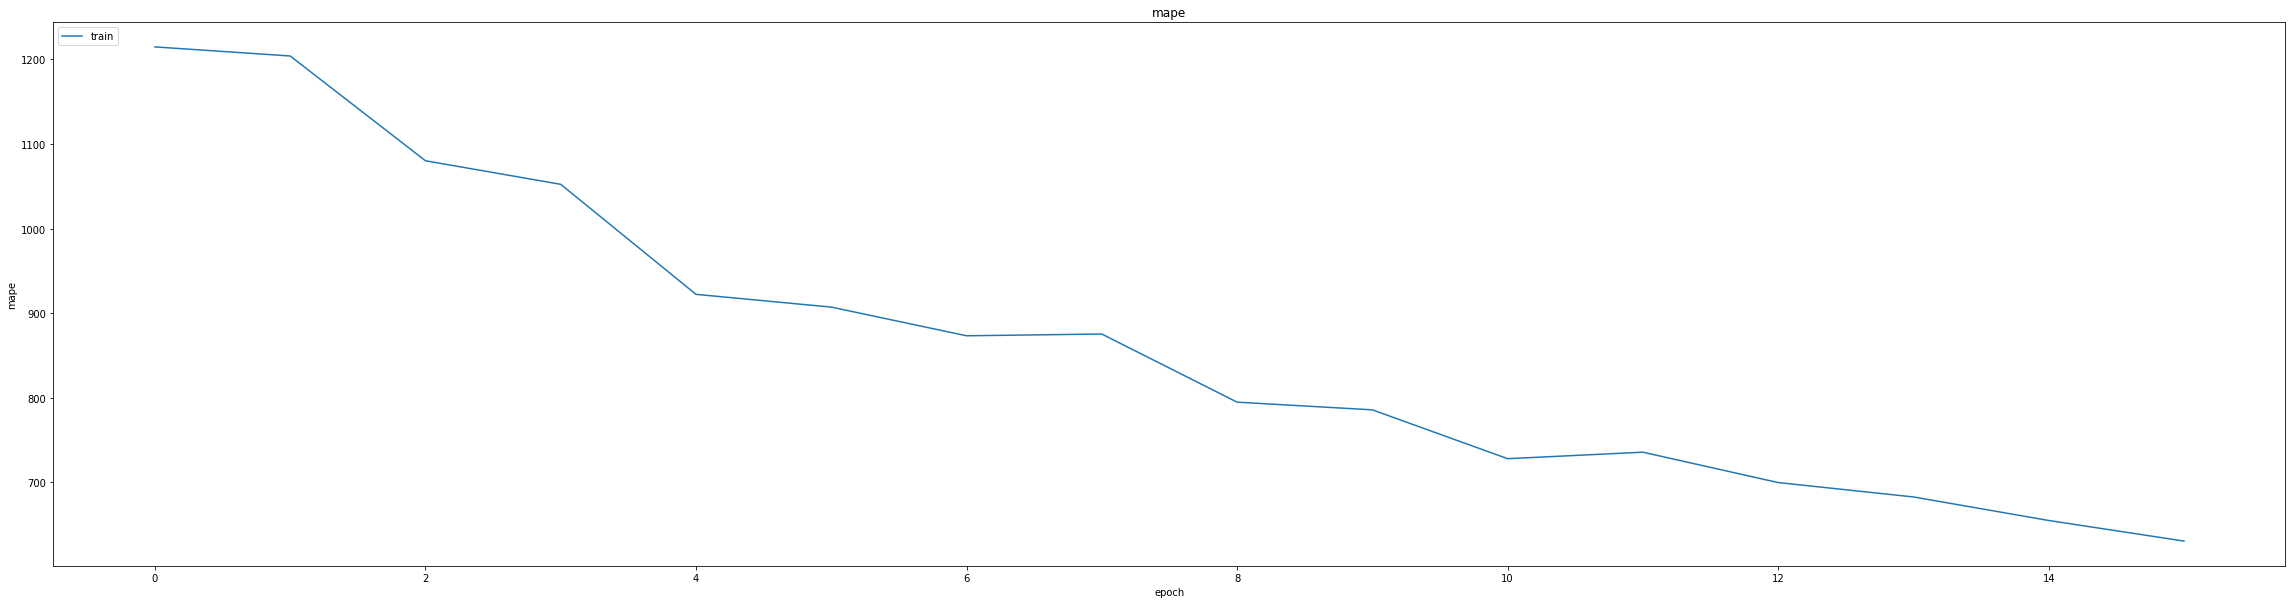

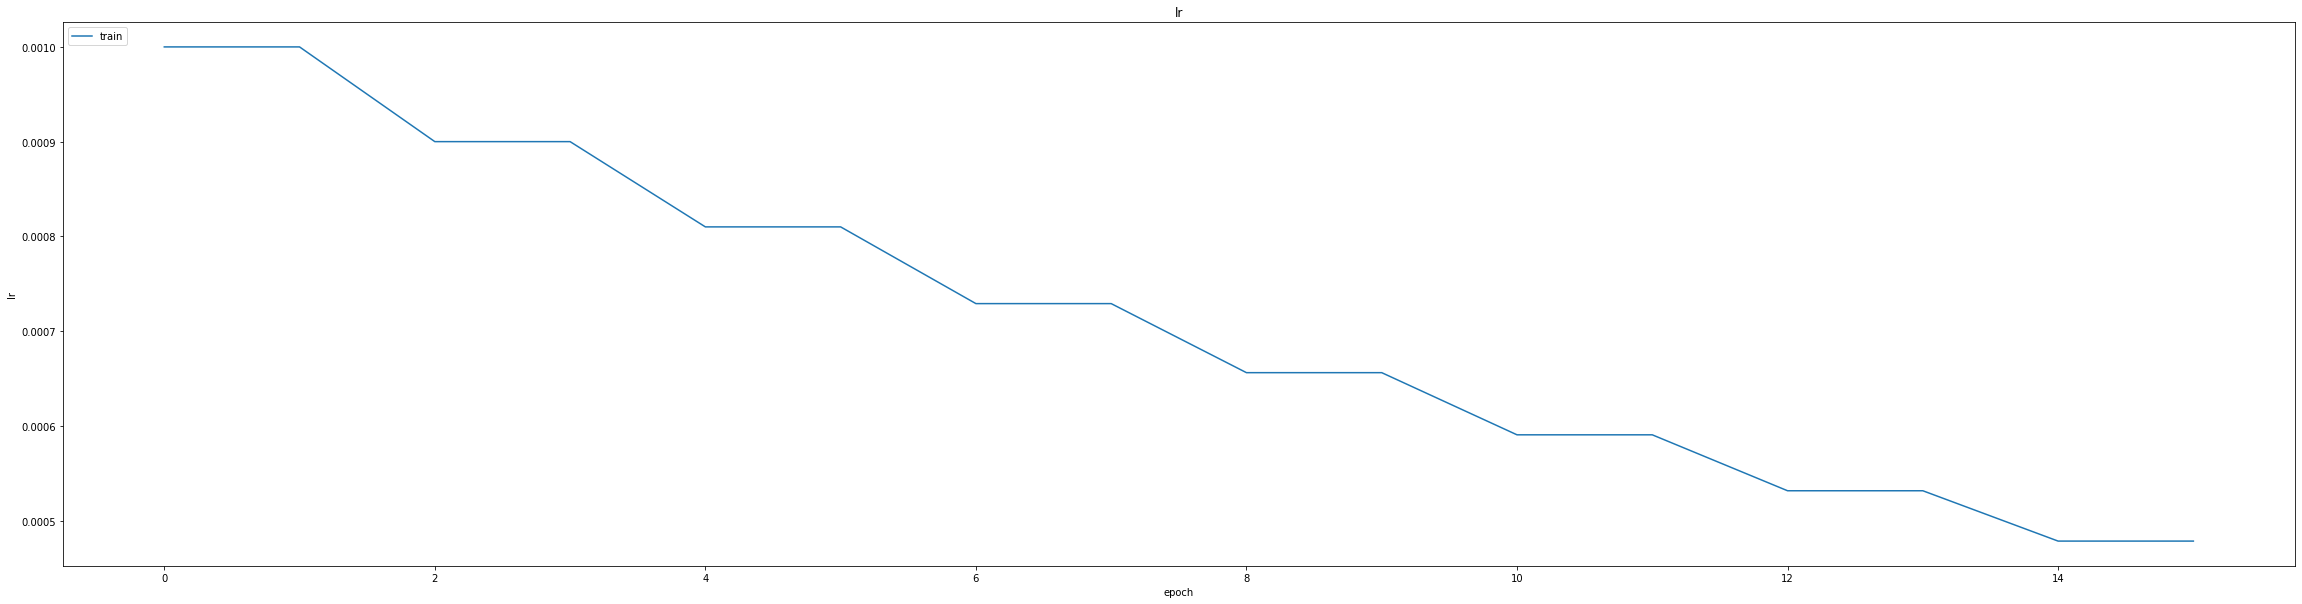

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.02547915279865265
0.03521488234400749
234/234 [==============================] - 8s 29ms/step
0.9063828105280369


234/234 [==============================] - 7s 30ms/step


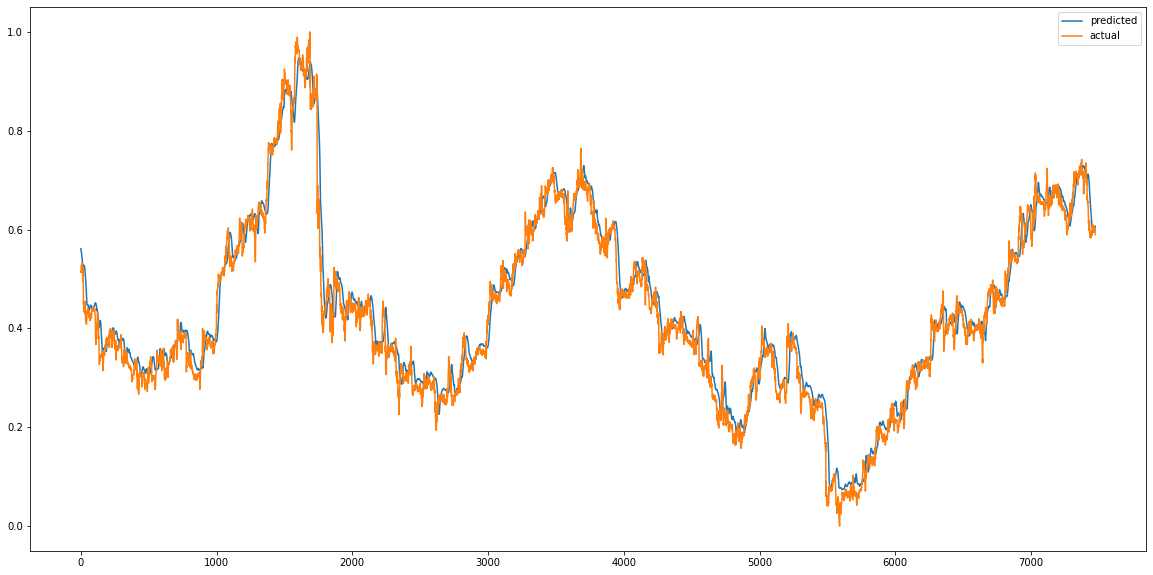

In [ ]:
model.load_weights("weights.best.hdf5")
val_predictions=thesis.CreatPrediction(model,x_val, y_val)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


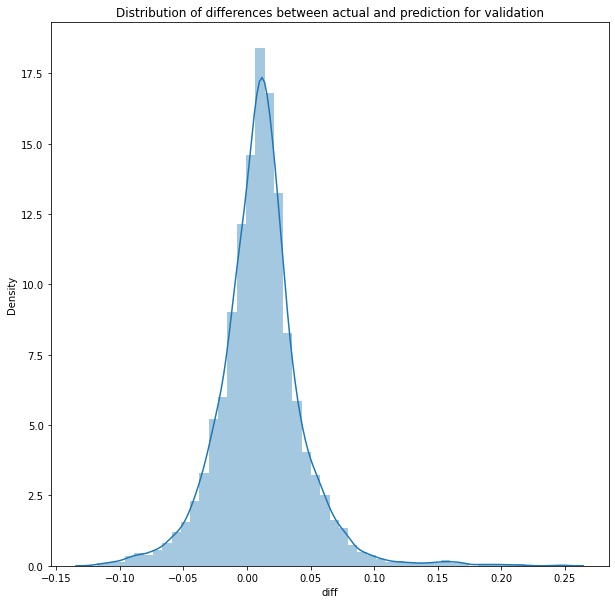

In [ ]:
val_predictions['diff'] = val_predictions['predicted'] - val_predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(val_predictions['diff']);
plt.title('Distribution of differences between actual and prediction for validation')
plt.show()

229/229 [==============================] - 11s 46ms/step


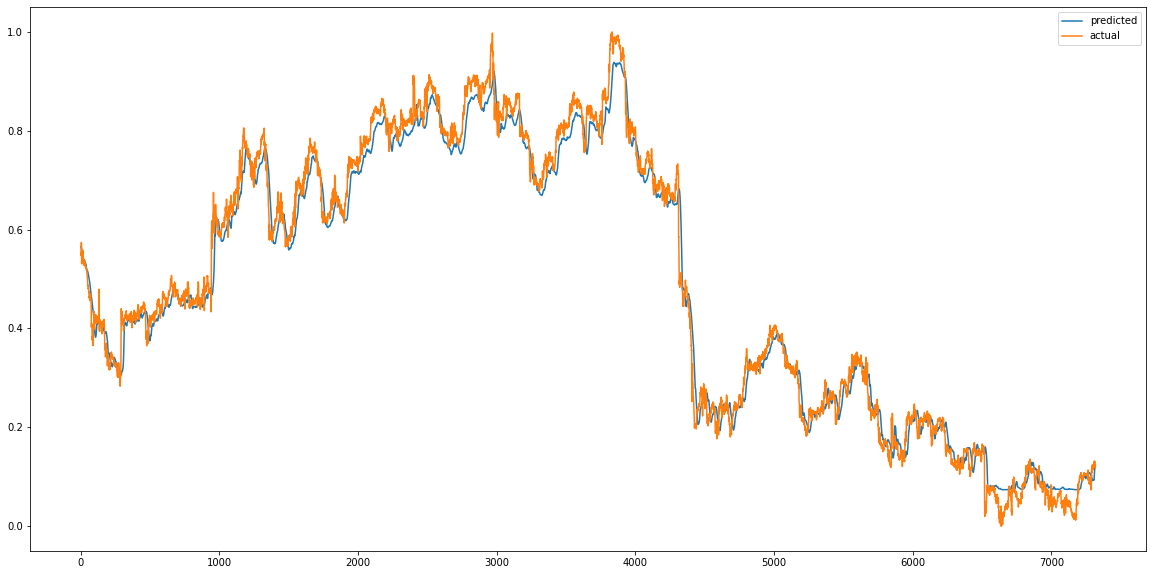

In [ ]:
predictions=thesis.CreatPrediction(model,x_test, y_test)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


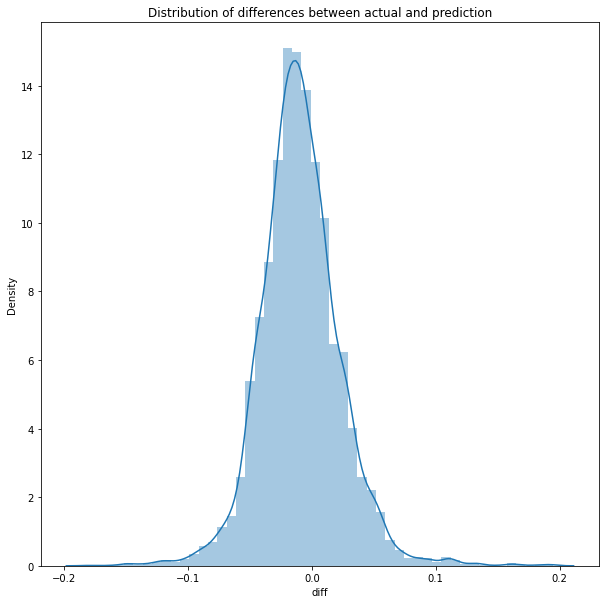

In [ ]:
predictions['diff'] = predictions['predicted'] - predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(predictions['diff']);
plt.title('Distribution of differences between actual and prediction')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
print("MSE : ", mean_squared_error(predictions['predicted'].values, predictions['actual'].values))
print("MAE : ", mean_absolute_error(predictions['predicted'].values, predictions['actual'].values))
from math import sqrt

print('RMSE  :', sqrt(mean_squared_error(predictions['predicted'].values, predictions['actual'].values)))

test_r2_scr = thesis.R_Squared_Score(model, x_test, y_test)
print('R2_Score  :',test_r2_scr)


predictions['diff'].describe()

MSE :  0.0011422030285694385
MAE :  0.025716523384727047
RMSE  : 0.03379649432366379
229/229 [==============================] - 7s 29ms/step
R2_Score  : 0.9857458111568751


count    7319.000000
mean       -0.009174
std         0.032530
min        -0.181635
25%        -0.028530
50%        -0.010842
75%         0.008319
max         0.194868
Name: diff, dtype: float64

In [ ]:
TargetIndex = df.columns.tolist().index('close')
HighIndex = df.columns.tolist().index('high')
LowIndex = df.columns.tolist().index('low')

In [ ]:
model= thesis.GRU_BiLSTM_Model(x_train)
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 24, 32)            4416      
                                                                 
 bidirectional_3 (Bidirectio  (None, 24, 512)          591872    
 nal)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 24, 512)           0         
                                                                 
 bidirectional_4 (Bidirectio  (None, 128)              295424    
 nal)                                                            
                                                                 
 dense_3 (Dense)             (None, 32)                4128      
                                                                 
 dense_4 (Dense)             (None, 16)               

In [ ]:
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping

# Set the metric you want to monitor, the threshold, and the patience value
early_stopping = EarlyStopping(monitor='val_mse', patience=30)

checkpoint = ModelCheckpoint("/content/drive/MyDrive/modelweights/CHF_USD_15min_GRU_BiLSTM.hdf5", monitor='val_mse', verbose=1, save_best_only=True, mode='min')

# Fit
callbacks_list = [checkpoint, early_stopping ]

Epochs=75
Batch_size=128
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/75
463/464 [============================>.] - ETA: 0s - loss: 242.9562 - mae: 1.8782 - mse: 242.9562 - root_mean_squared_error: 15.5871 - mape: 20160.9160
Epoch 1: val_mse improved from inf to 0.04455, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_GRU_BiLSTM.hdf5
464/464 [==============================] - 22s 21ms/step - loss: 242.6124 - mae: 1.8758 - mse: 242.6124 - root_mean_squared_error: 15.5760 - mape: 20132.4453 - val_loss: 0.0446 - val_mae: 0.1578 - val_mse: 0.0446 - val_root_mean_squared_error: 0.2111 - val_mape: 44021.8164
Epoch 2/75
463/464 [============================>.] - ETA: 0s - loss: 0.0435 - mae: 0.1569 - mse: 0.0435 - root_mean_squared_error: 0.2086 - mape: 5975.0947
Epoch 2: val_mse improved from 0.04455 to 0.03650, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_GRU_BiLSTM.hdf5
464/464 [==============================] - 8s 17ms/step - loss: 0.0435 - mae: 0.1569 - mse: 0.0435 - root_mean_squared_error: 0.2086 - mape: 596

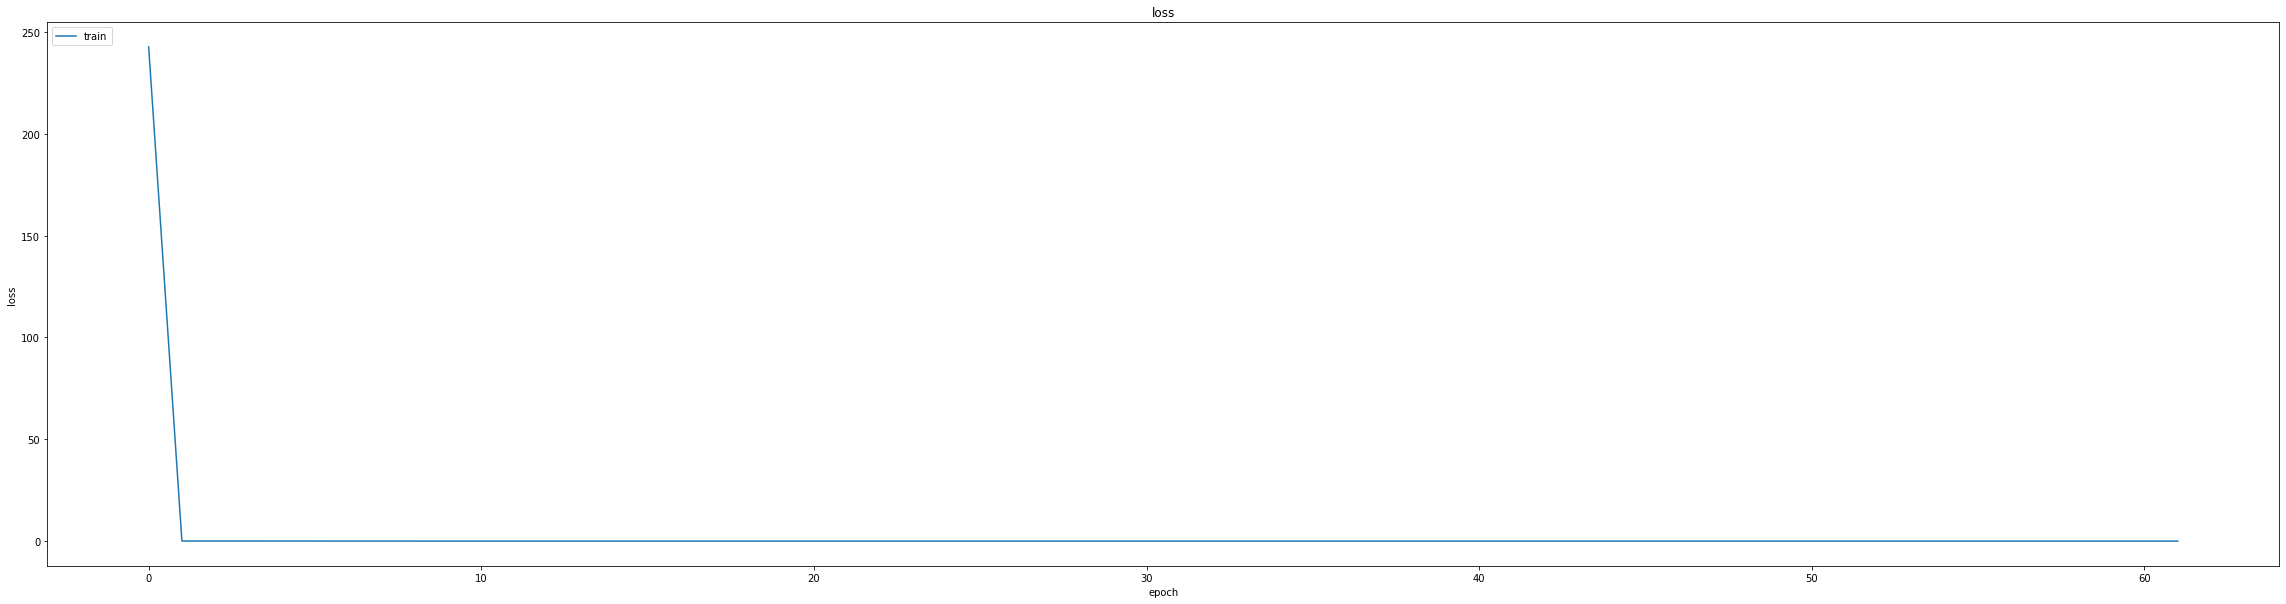

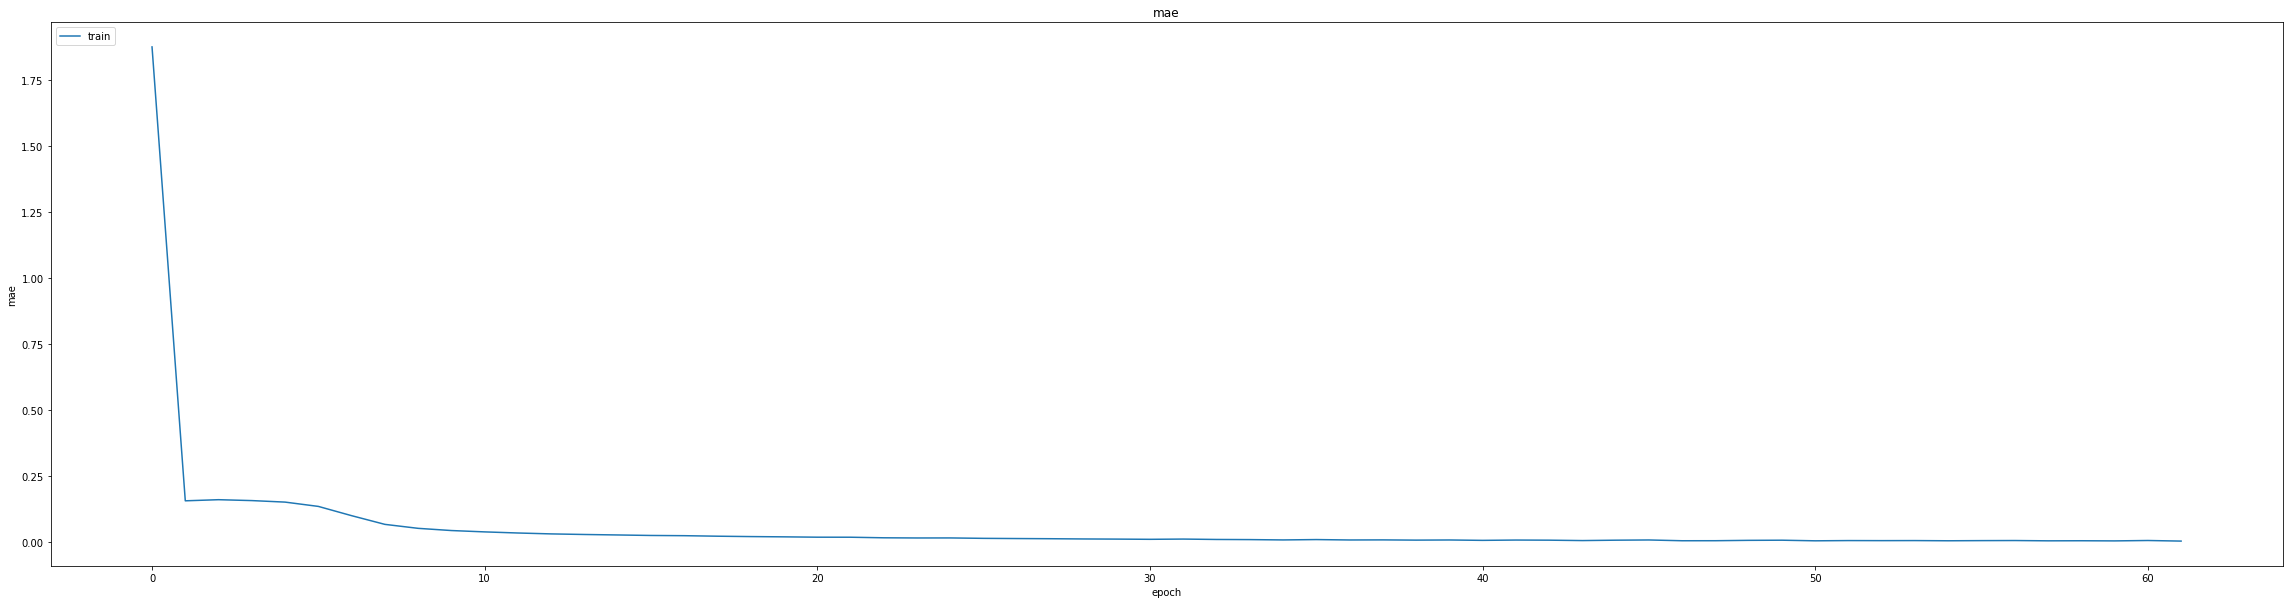

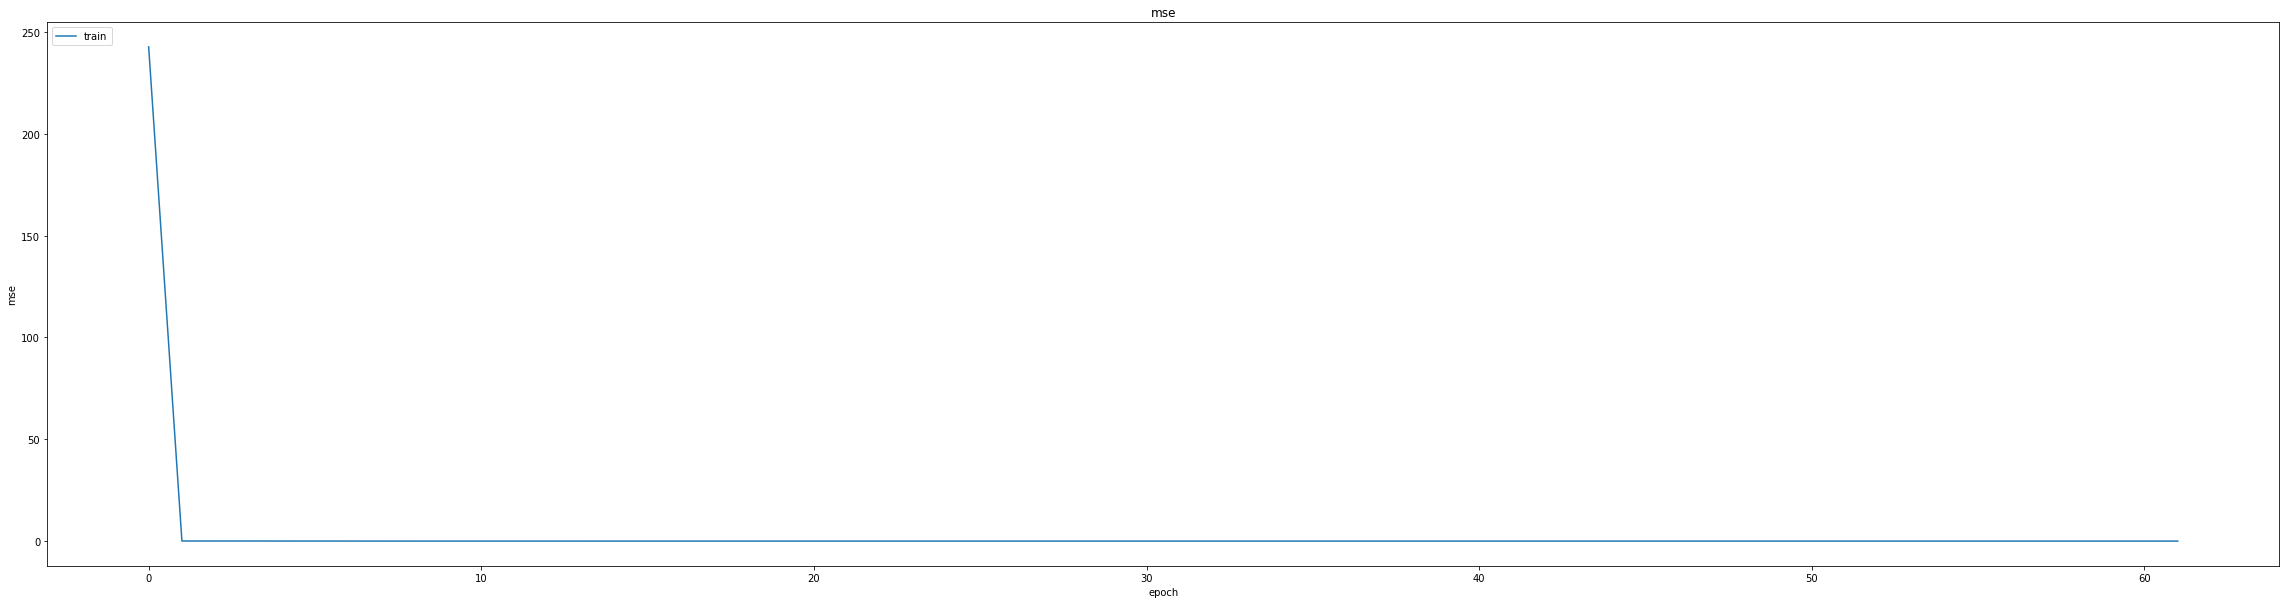

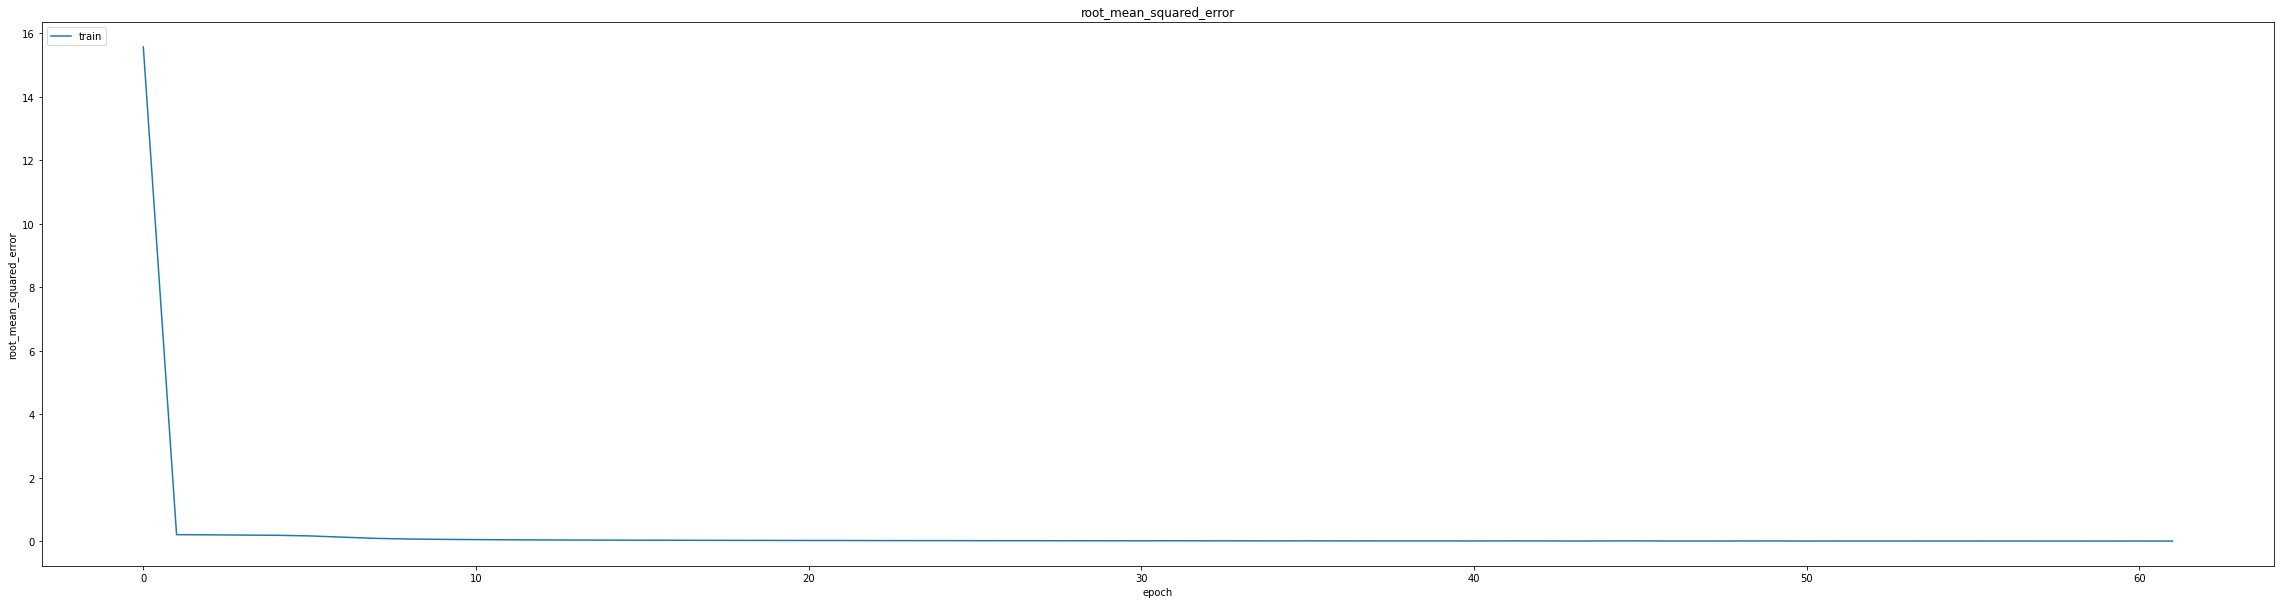

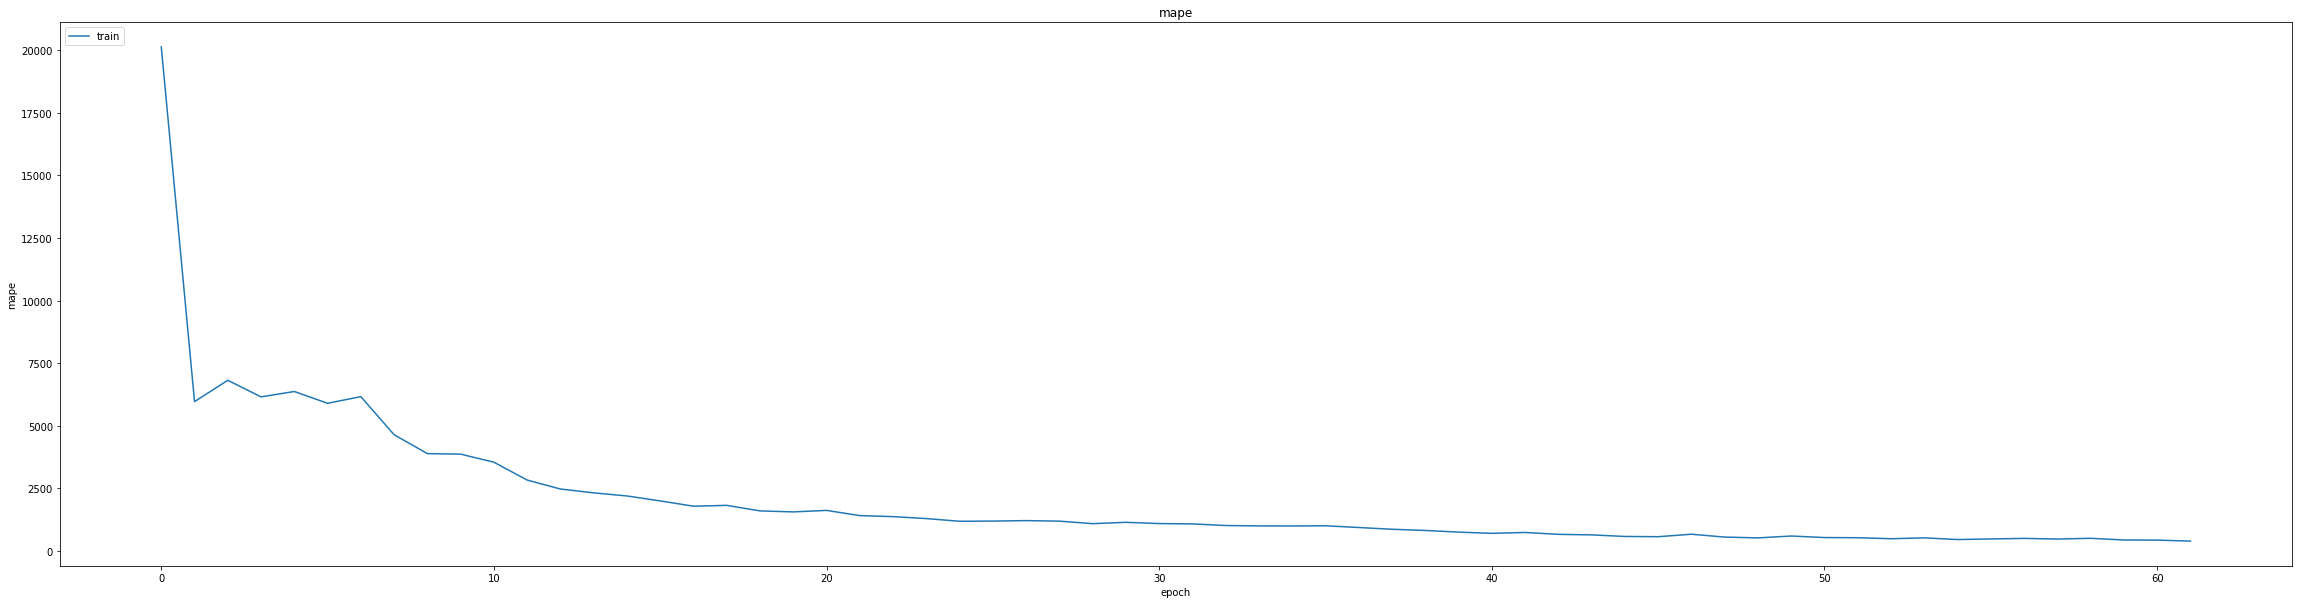

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.014956951141357422
0.021435657516121864
234/234 [==============================] - 3s 6ms/step
0.818052675087485


In [ ]:
model.load_weights("/content/drive/MyDrive/modelweights/CHF_USD_15min_GRU_BiLSTM.hdf5")
early_stopping = EarlyStopping(monitor='val_mse', patience=15)
from keras.callbacks import LearningRateScheduler
import keras.backend as K

def scheduler(epoch):
    if epoch%2==0 and epoch!=0:
        lr = K.get_value(model.optimizer.lr)
        K.set_value(model.optimizer.lr, lr*.9)
        print("lr changed to {}".format(lr*.9))
    return K.get_value(model.optimizer.lr)
lr_decay = LearningRateScheduler(scheduler)

callbacks_list = [checkpoint, lr_decay, early_stopping]

Epochs=int(Epochs/3)
Batch_size=128
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/25
463/464 [============================>.] - ETA: 0s - loss: 0.0117 - mae: 0.0520 - mse: 0.0117 - root_mean_squared_error: 0.1080 - mape: 1160.8967
Epoch 1: val_mse did not improve from 0.00046
464/464 [==============================] - 18s 22ms/step - loss: 0.0116 - mae: 0.0519 - mse: 0.0116 - root_mean_squared_error: 0.1079 - mape: 1159.2598 - val_loss: 0.0012 - val_mae: 0.0257 - val_mse: 0.0012 - val_root_mean_squared_error: 0.0342 - val_mape: 8945.3721 - lr: 0.0010
Epoch 2/25
461/464 [============================>.] - ETA: 0s - loss: 3.3799e-04 - mae: 0.0141 - mse: 3.3799e-04 - root_mean_squared_error: 0.0184 - mape: 921.5195
Epoch 2: val_mse did not improve from 0.00046
464/464 [==============================] - 8s 17ms/step - loss: 3.3751e-04 - mae: 0.0140 - mse: 3.3751e-04 - root_mean_squared_error: 0.0184 - mape: 916.2670 - val_loss: 0.0014 - val_mae: 0.0293 - val_mse: 0.0014 - val_root_mean_squared_error: 0.0371 - val_mape: 10857.4473 - lr: 0.0010
lr changed to 0.0009

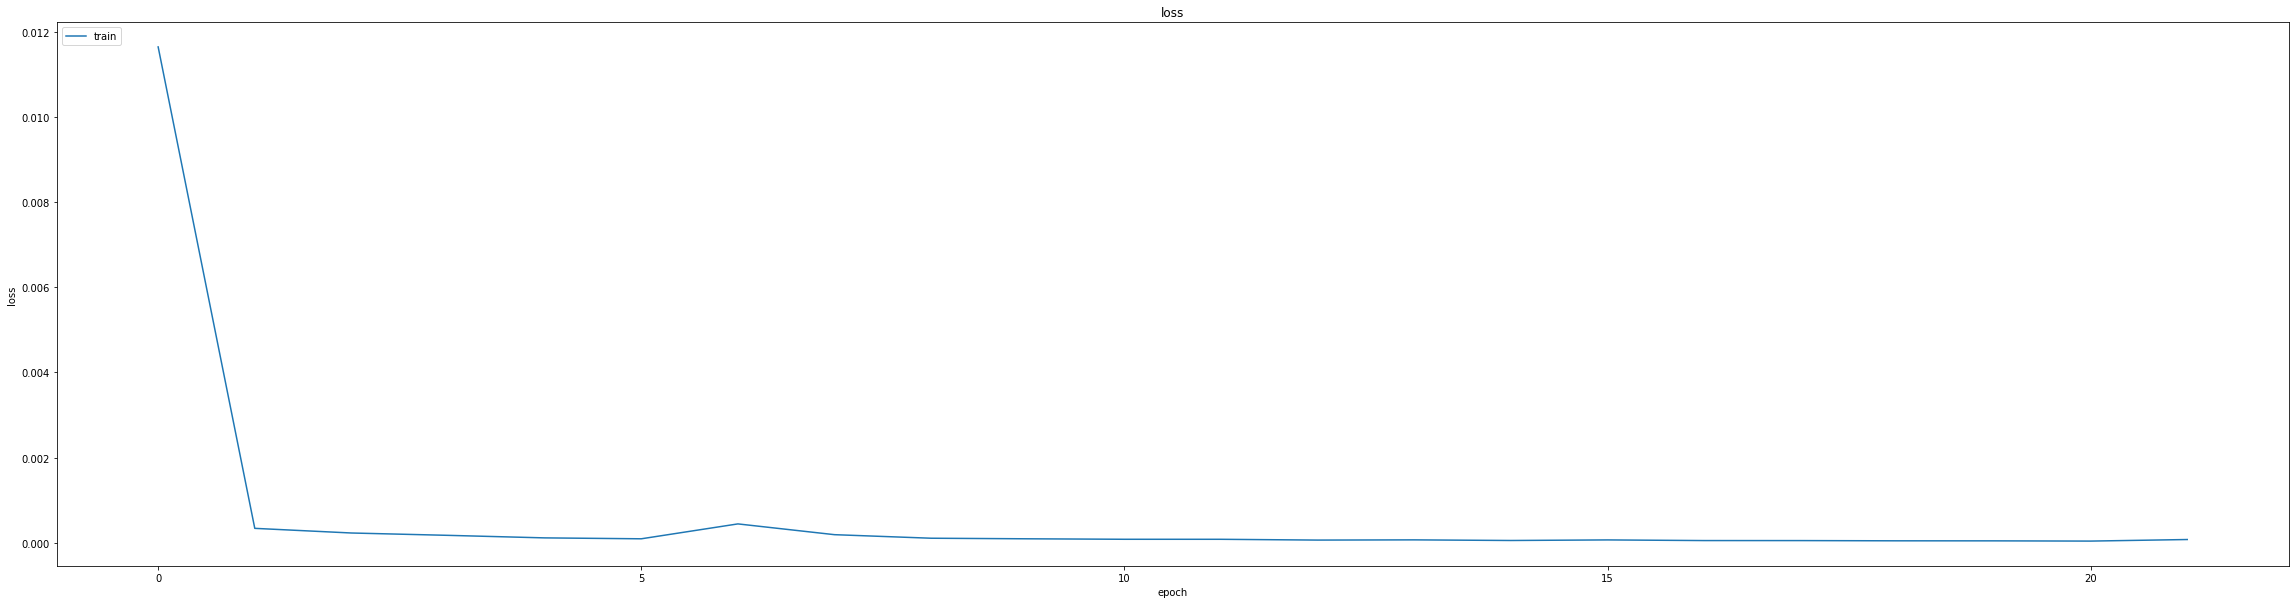

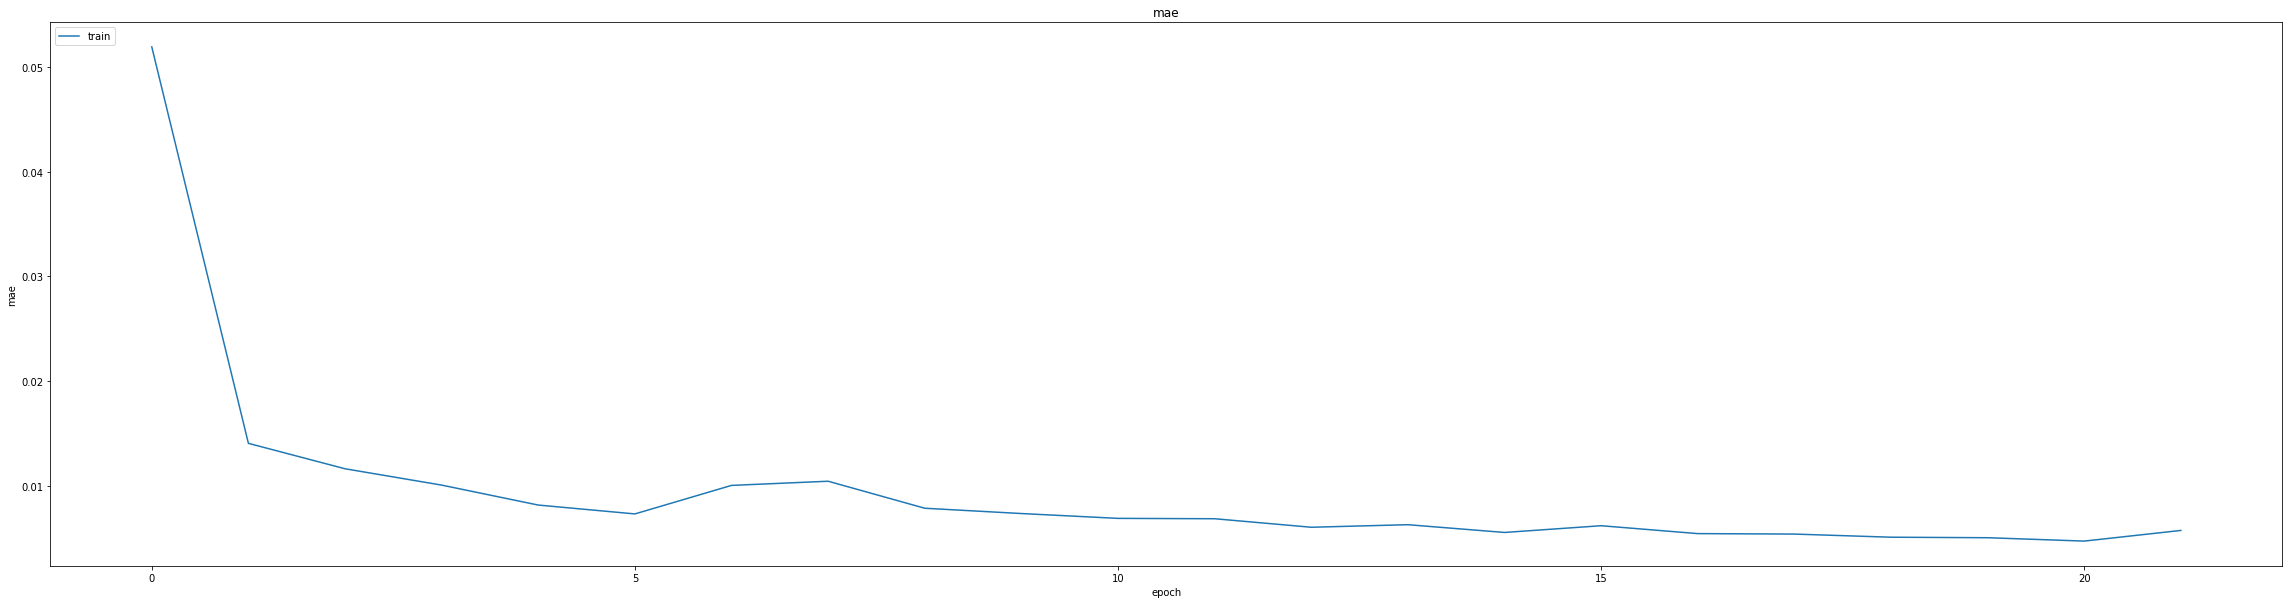

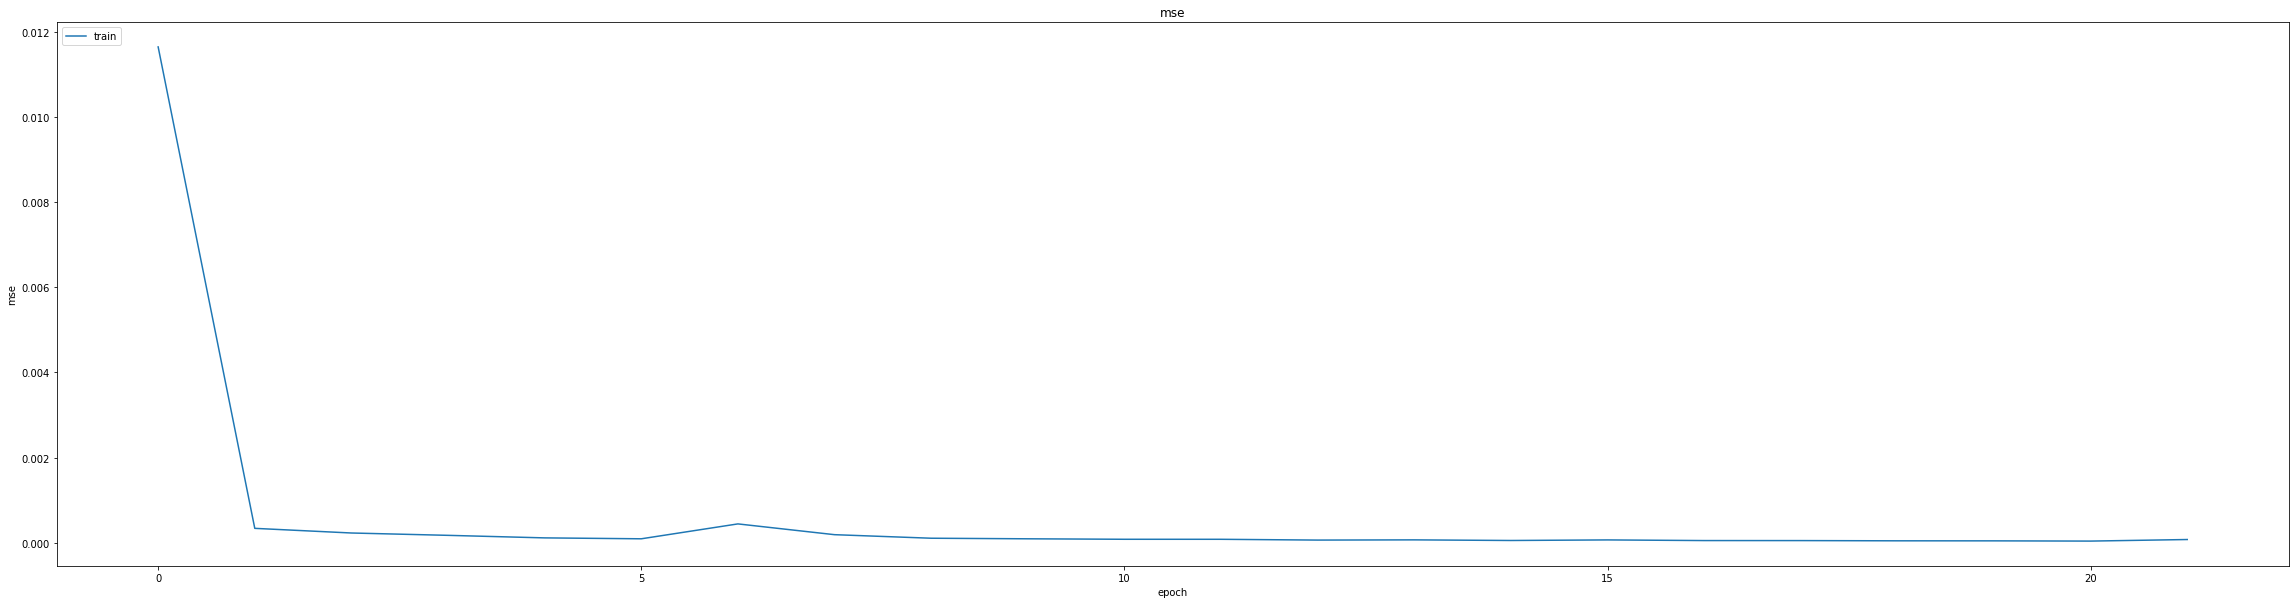

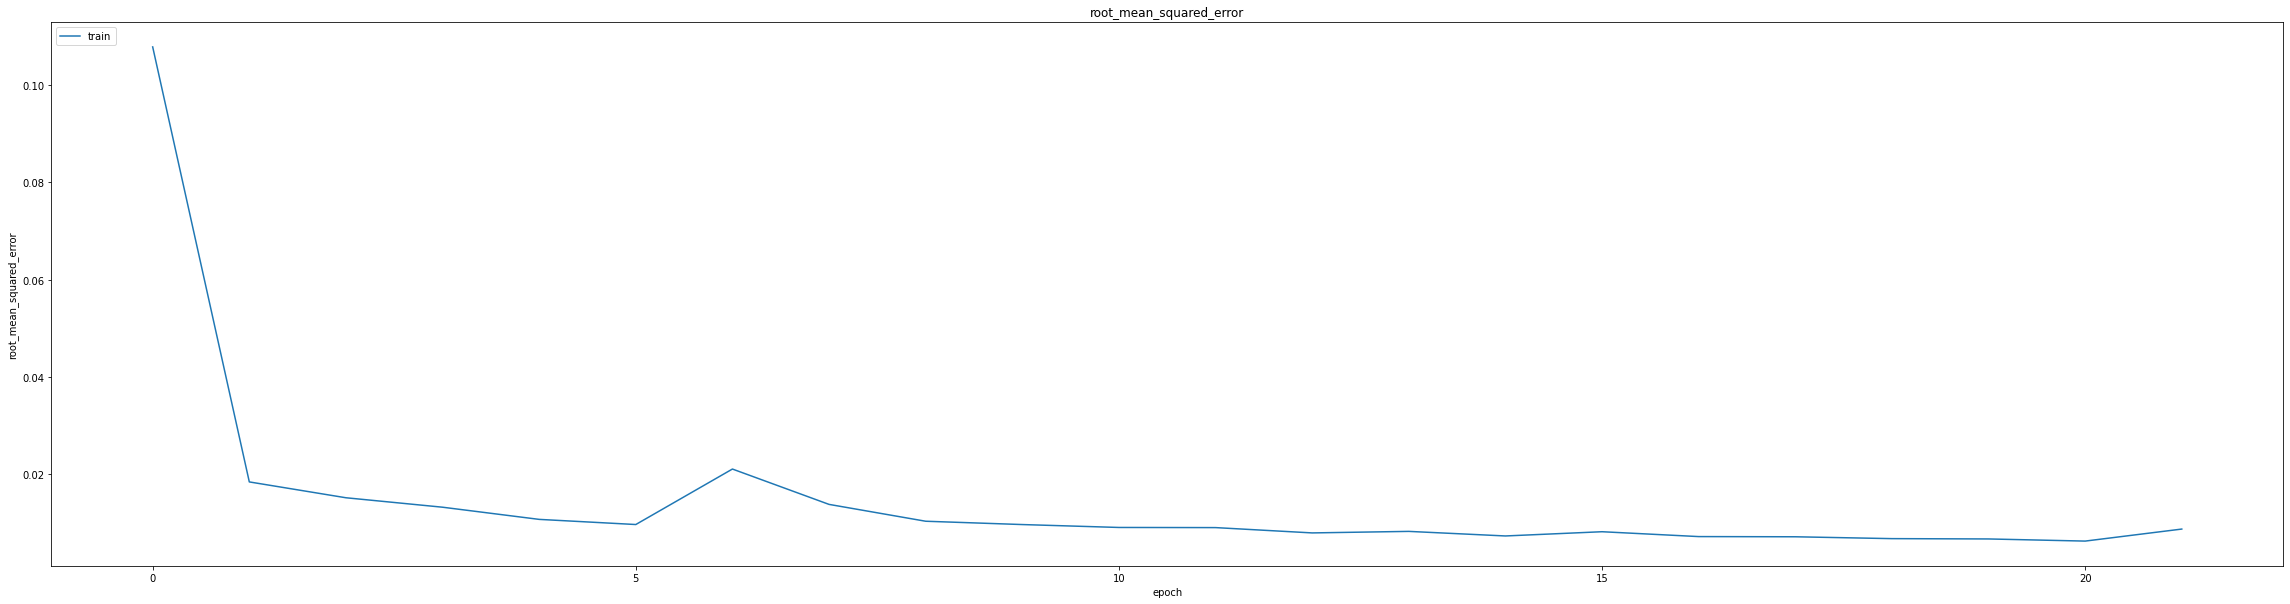

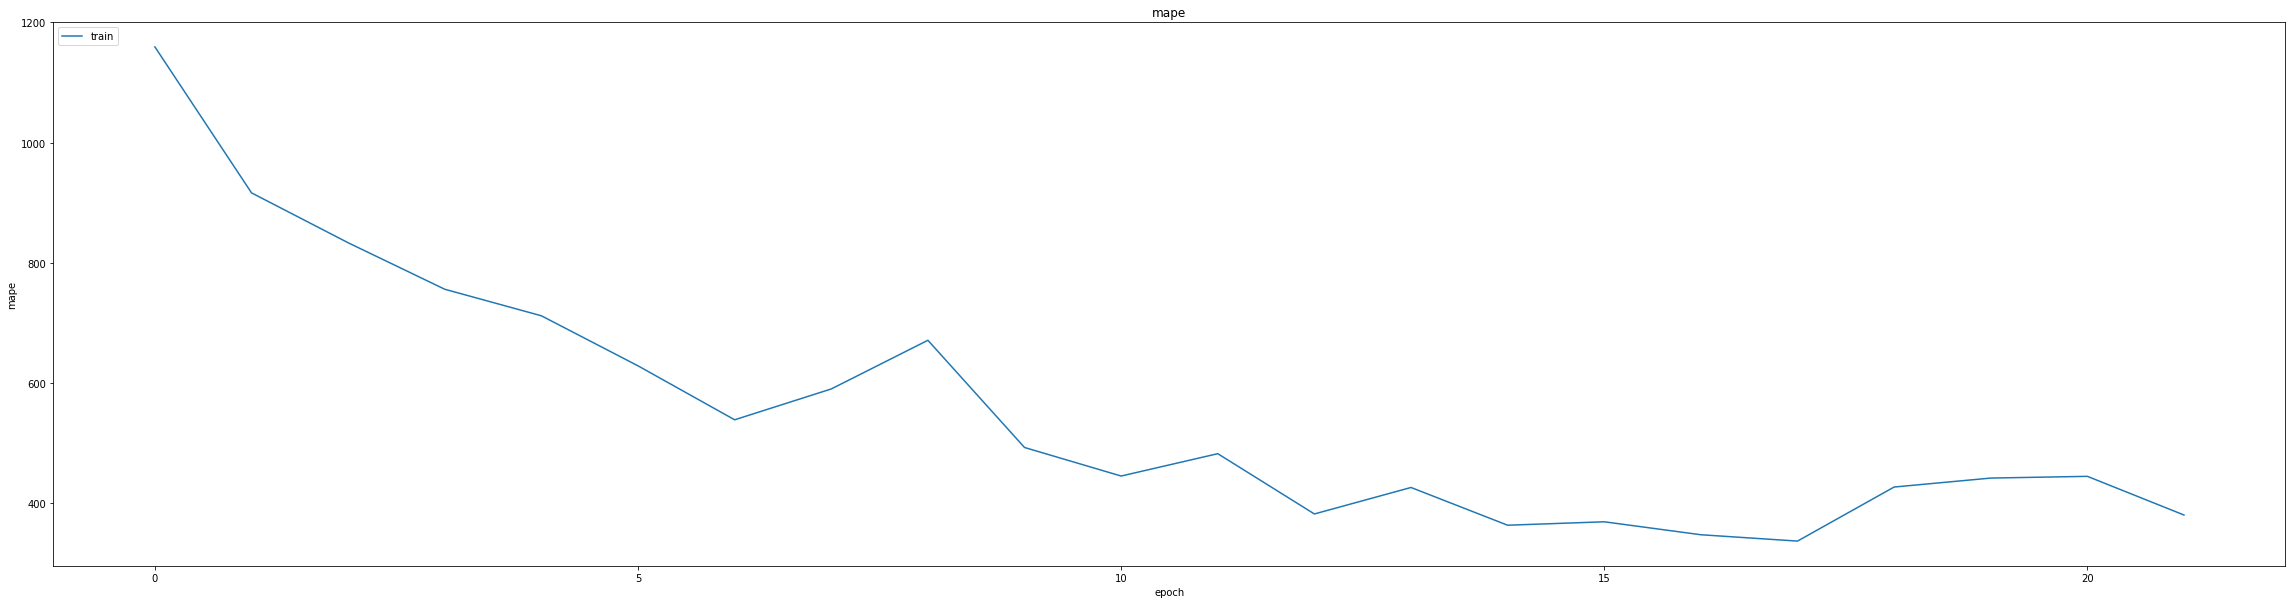

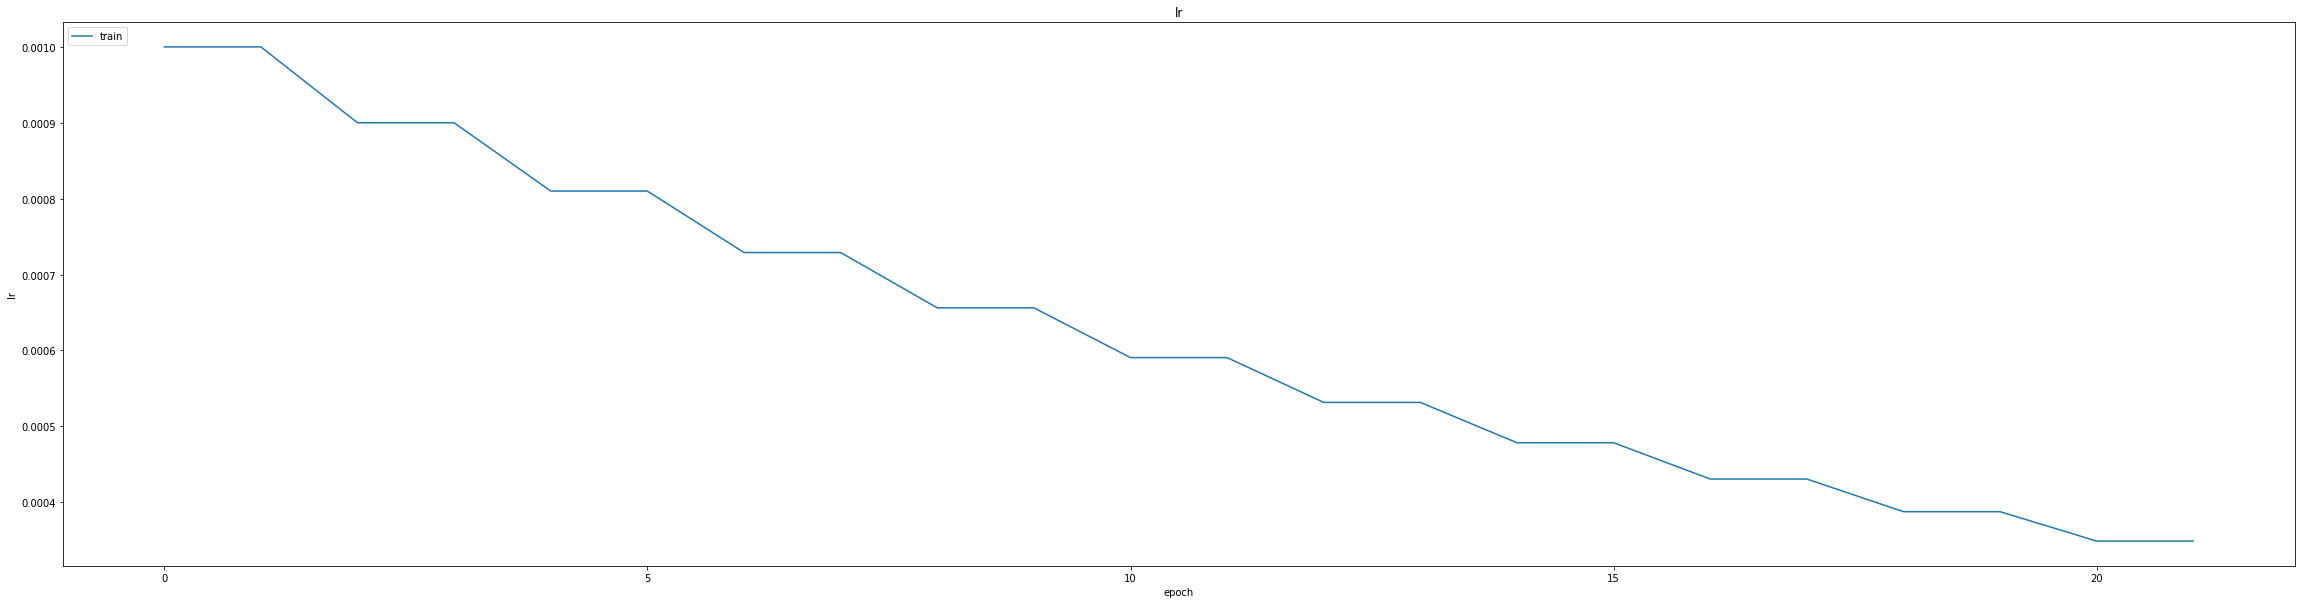

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.021357711404561996
0.026774205267429352
234/234 [==============================] - 3s 6ms/step
0.8691916406687871


234/234 [==============================] - 1s 6ms/step


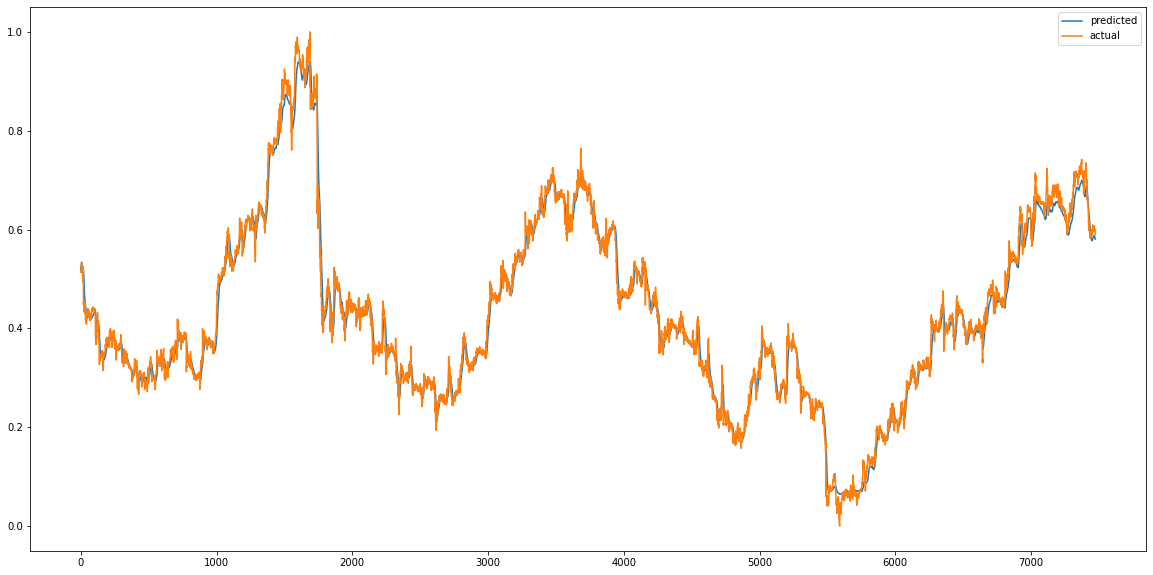

In [ ]:
model.load_weights("/content/drive/MyDrive/modelweights/CHF_USD_15min_GRU_BiLSTM.hdf5")
val_predictions=thesis.CreatPrediction(model,x_val, y_val)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


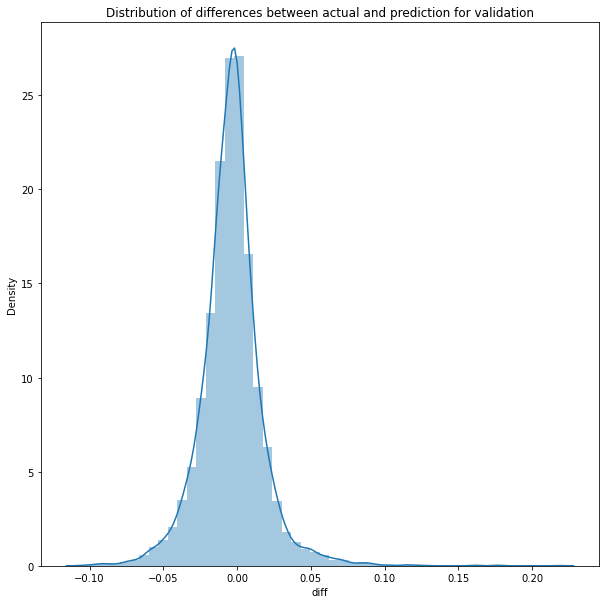

In [ ]:
val_predictions['diff'] = val_predictions['predicted'] - val_predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(val_predictions['diff']);
plt.title('Distribution of differences between actual and prediction for validation')
plt.show()

229/229 [==============================] - 1s 6ms/step


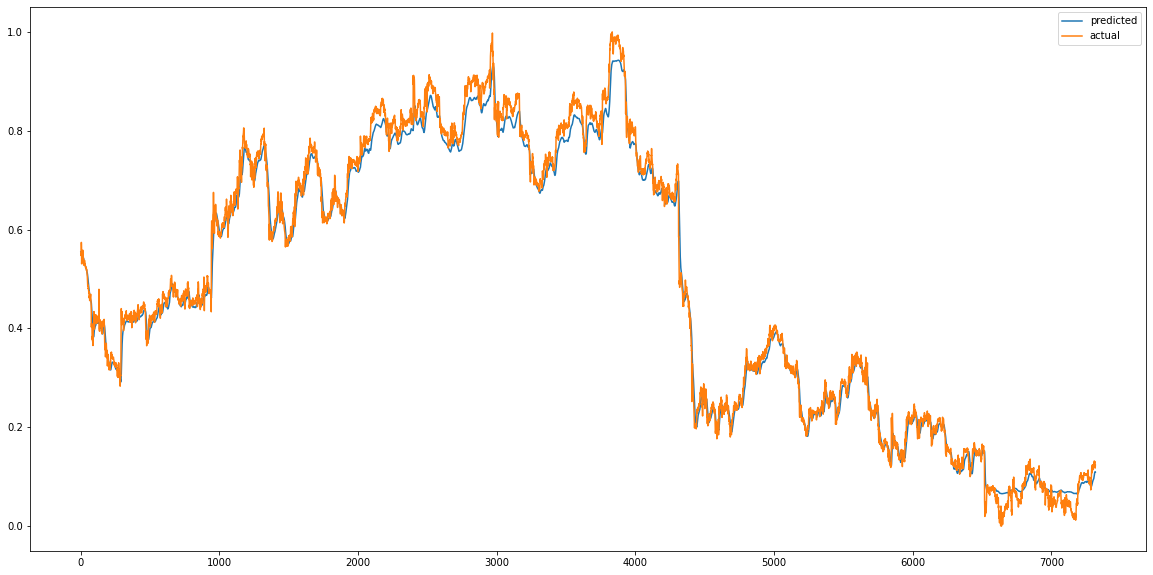

In [ ]:
predictions=thesis.CreatPrediction(model,x_test, y_test)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


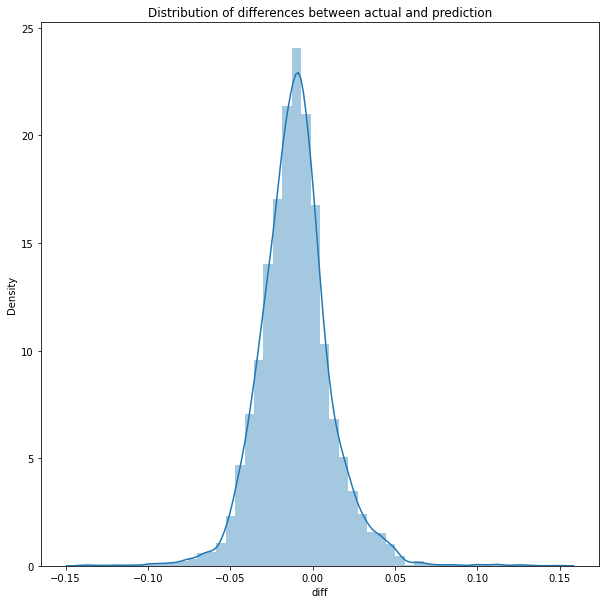

In [ ]:
predictions['diff'] = predictions['predicted'] - predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(predictions['diff']);
plt.title('Distribution of differences between actual and prediction')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
print("MSE : ", mean_squared_error(predictions['predicted'].values, predictions['actual'].values))
print("MAE : ", mean_absolute_error(predictions['predicted'].values, predictions['actual'].values))
from math import sqrt

print('RMSE  :', sqrt(mean_squared_error(predictions['predicted'].values, predictions['actual'].values)))

test_r2_scr = thesis.R_Squared_Score(model, x_test, y_test)
print('R2_Score  :',test_r2_scr)


predictions['diff'].describe()

MSE :  0.0005835422597393772
MAE :  0.018555104465803204
RMSE  : 0.024156619377292368
229/229 [==============================] - 1s 6ms/step
R2_Score  : 0.9927176505815724


count    7319.000000
mean       -0.010563
std         0.021726
min        -0.138592
25%        -0.023120
50%        -0.010766
75%         0.000670
max         0.147427
Name: diff, dtype: float64

In [ ]:
model= thesis.GRU_LSTM_Model(x_train)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 24, 32)            4416      
                                                                 
 lstm (LSTM)                 (None, 24, 256)           295936    
                                                                 
 dropout (Dropout)           (None, 24, 256)           0         
                                                                 
 lstm_1 (LSTM)               (None, 64)                82176     
                                                                 
 dense (Dense)               (None, 32)                2080      
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 1)                 1

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

# Set the metric you want to monitor, the threshold, and the patience value
early_stopping = EarlyStopping(monitor='val_mse', patience=30)


In [ ]:
from keras.callbacks import ModelCheckpoint


checkpoint = ModelCheckpoint("weights.best.hdf5", monitor='val_mse', verbose=1, save_best_only=True, mode='min')

# Fit
callbacks_list = [checkpoint, early_stopping ]

In [ ]:
Epochs=75
Batch_size=128
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/75
464/464 [==============================] - ETA: 0s - loss: 280.8002 - mae: 2.1391 - mse: 280.8002 - root_mean_squared_error: 16.7571 - mape: 7178.2847
Epoch 1: val_mse improved from inf to 0.03816, saving model to weights.best.hdf5
464/464 [==============================] - 133s 273ms/step - loss: 280.8002 - mae: 2.1391 - mse: 280.8002 - root_mean_squared_error: 16.7571 - mape: 7178.2847 - val_loss: 0.0382 - val_mae: 0.1470 - val_mse: 0.0382 - val_root_mean_squared_error: 0.1953 - val_mape: 49060.5977
Epoch 2/75
464/464 [==============================] - ETA: 0s - loss: 0.0421 - mae: 0.1590 - mse: 0.0421 - root_mean_squared_error: 0.2052 - mape: 6499.4399
Epoch 2: val_mse improved from 0.03816 to 0.03599, saving model to weights.best.hdf5
464/464 [==============================] - 128s 276ms/step - loss: 0.0421 - mae: 0.1590 - mse: 0.0421 - root_mean_squared_error: 0.2052 - mape: 6499.4399 - val_loss: 0.0360 - val_mae: 0.1447 - val_mse: 0.0360 - val_root_mean_squared_error: 

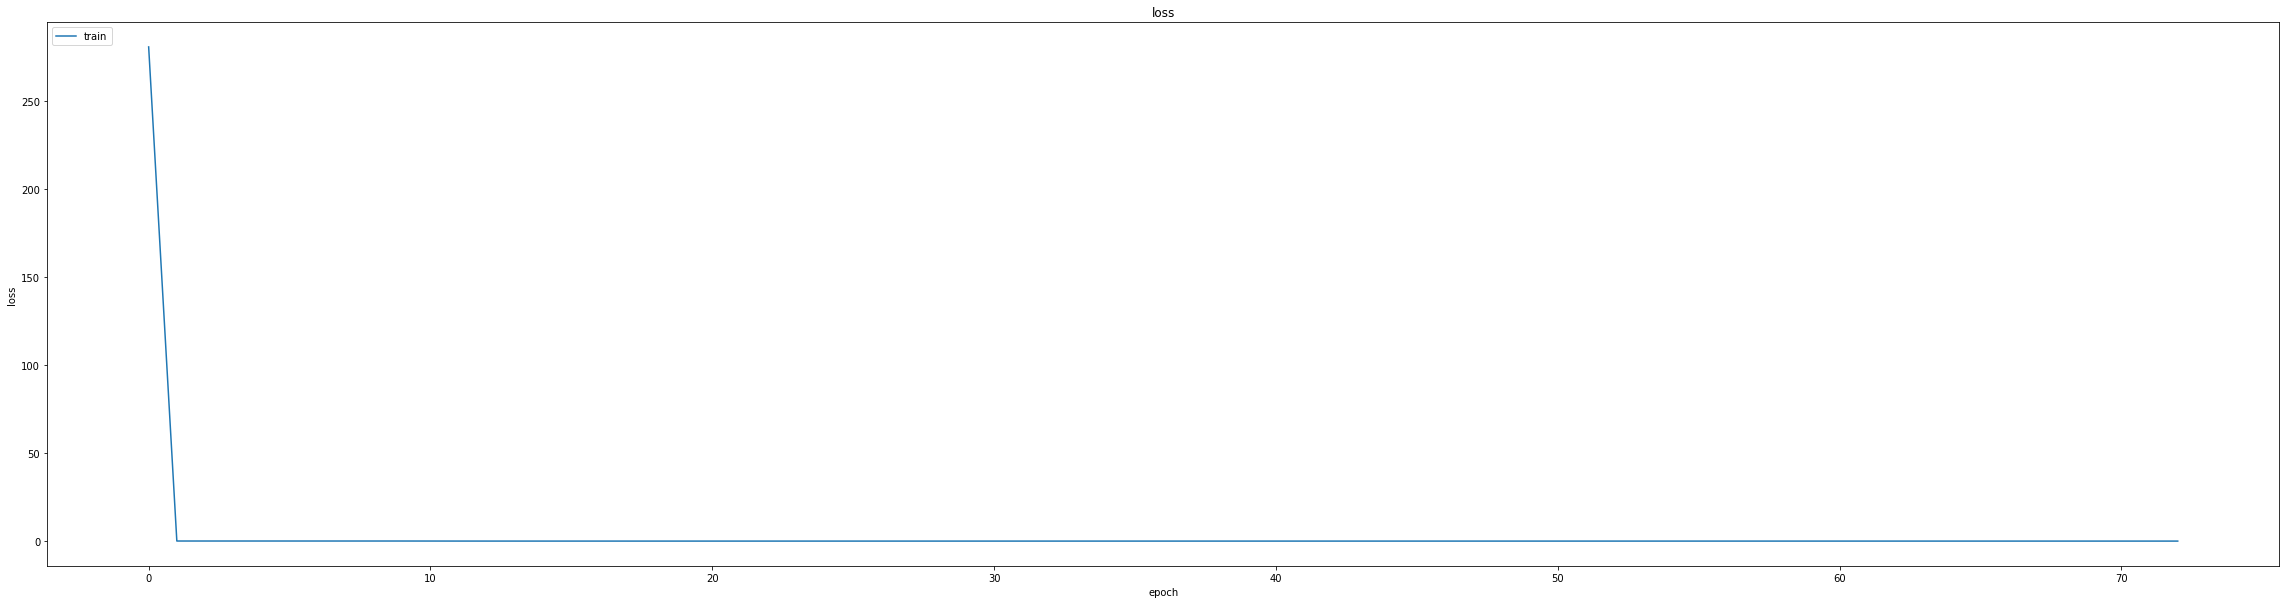

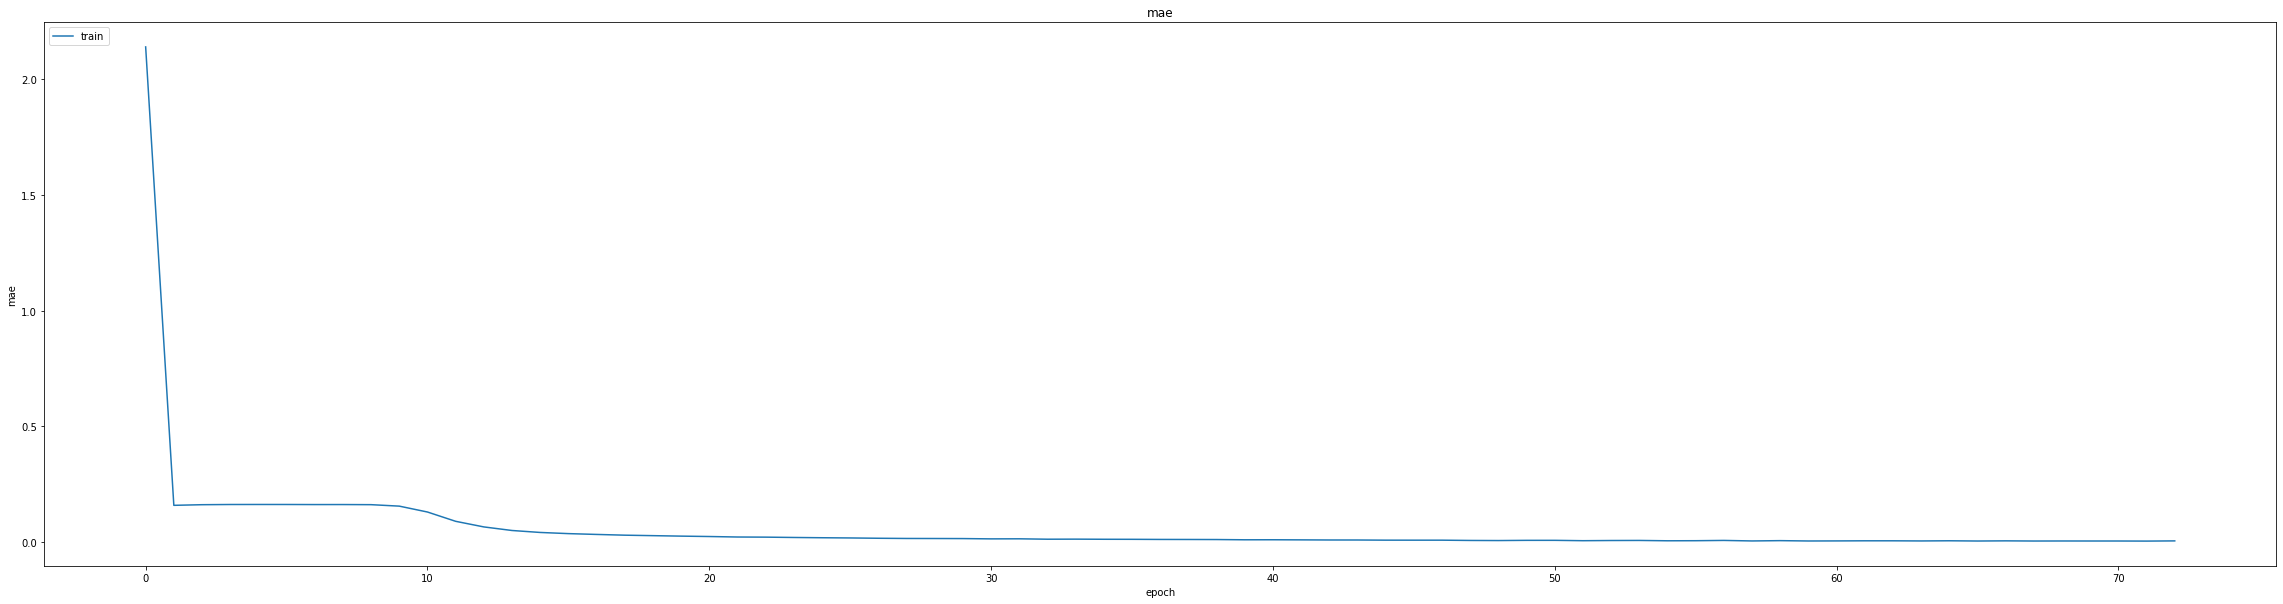

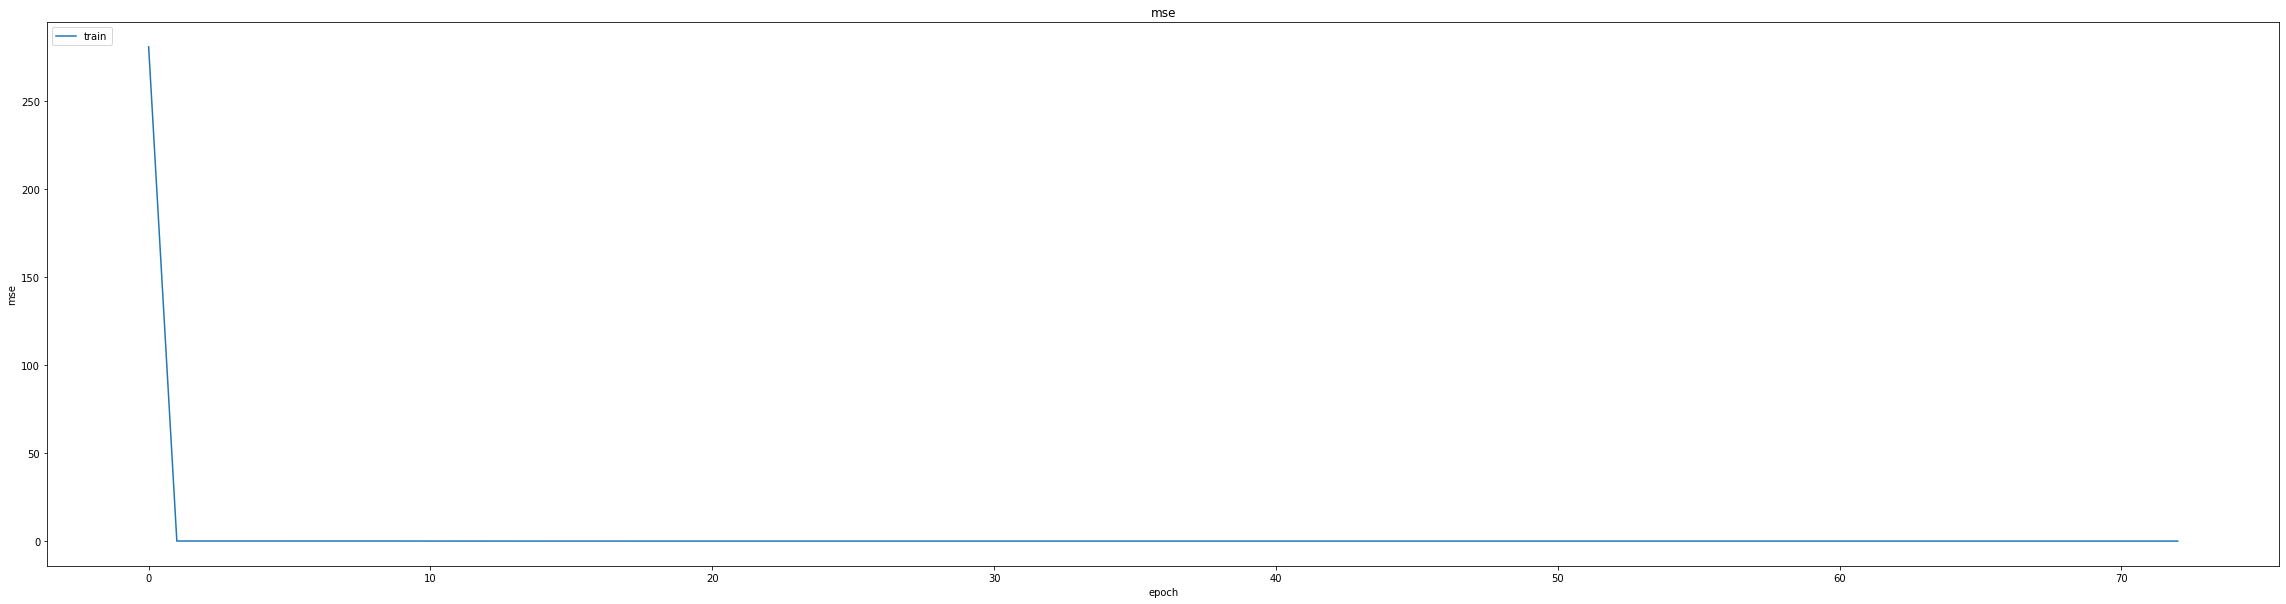

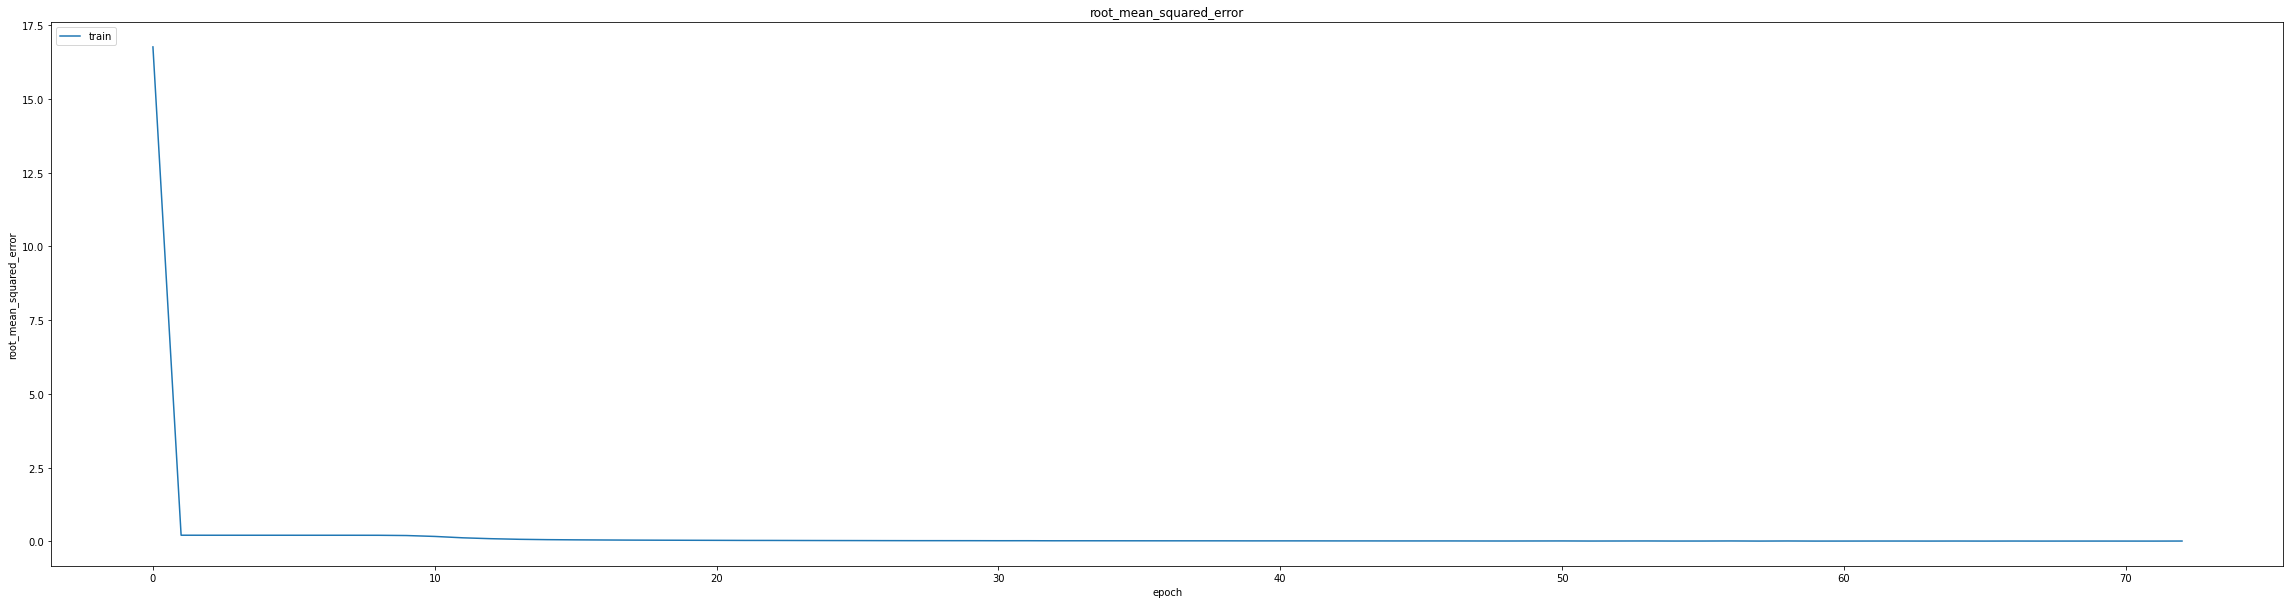

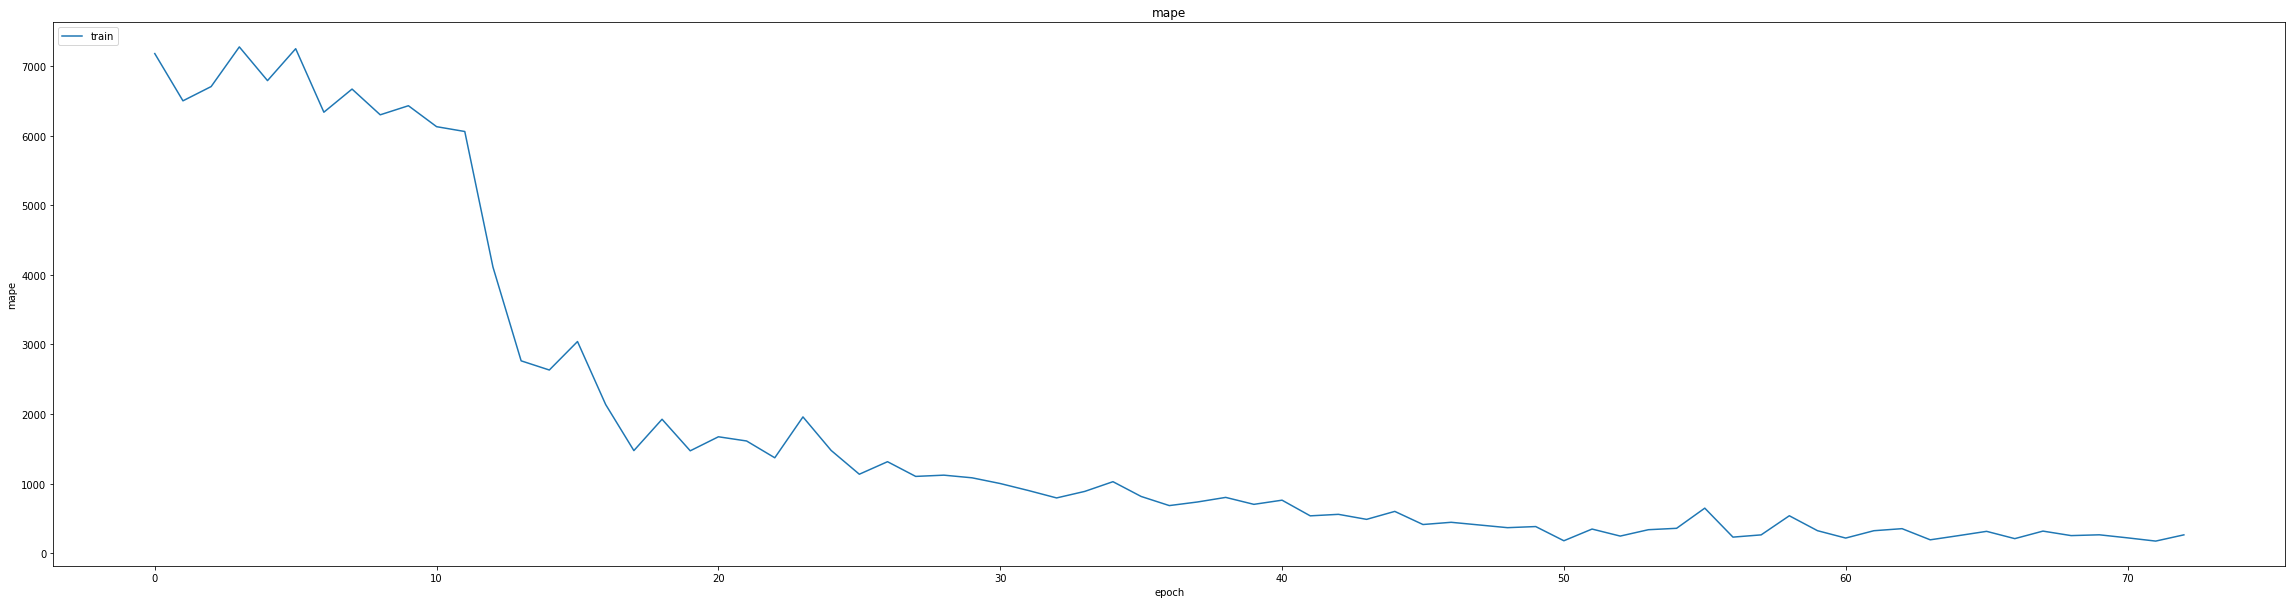

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:

print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
r2_score=thesis.R_Squared_Score(model, x_val, y_val)
print(r2_score)


0.014594383537769318
0.020205330103635788
234/234 [==============================] - 9s 36ms/step
0.9183589239126878


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [ ]:
model.load_weights("weights.best.hdf5")

In [ ]:
early_stopping = EarlyStopping(monitor='val_mse', patience=15)

from keras.callbacks import LearningRateScheduler
import keras.backend as K

def scheduler(epoch):
    if epoch%2==0 and epoch!=0:
        lr = K.get_value(model.optimizer.lr)
        K.set_value(model.optimizer.lr, lr*.9)
        print("lr changed to {}".format(lr*.9))
    return K.get_value(model.optimizer.lr)
lr_decay = LearningRateScheduler(scheduler)

callbacks_list = [checkpoint, lr_decay, early_stopping]

Epochs=int(Epochs/3)
Batch_size=128
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/25
464/464 [==============================] - ETA: 0s - loss: 0.0017 - mae: 0.0174 - mse: 0.0017 - root_mean_squared_error: 0.0418 - mape: 833.2205
Epoch 1: val_mse did not improve from 0.00041
464/464 [==============================] - 137s 282ms/step - loss: 0.0017 - mae: 0.0174 - mse: 0.0017 - root_mean_squared_error: 0.0418 - mape: 833.2205 - val_loss: 8.9909e-04 - val_mae: 0.0256 - val_mse: 8.9909e-04 - val_root_mean_squared_error: 0.0300 - val_mape: 9281.3418 - lr: 0.0010
Epoch 2/25
464/464 [==============================] - ETA: 0s - loss: 8.8801e-05 - mae: 0.0072 - mse: 8.8801e-05 - root_mean_squared_error: 0.0094 - mape: 387.5850
Epoch 2: val_mse did not improve from 0.00041
464/464 [==============================] - 133s 286ms/step - loss: 8.8801e-05 - mae: 0.0072 - mse: 8.8801e-05 - root_mean_squared_error: 0.0094 - mape: 387.5850 - val_loss: 0.0012 - val_mae: 0.0302 - val_mse: 0.0012 - val_root_mean_squared_error: 0.0342 - val_mape: 9333.6299 - lr: 0.0010
lr changed

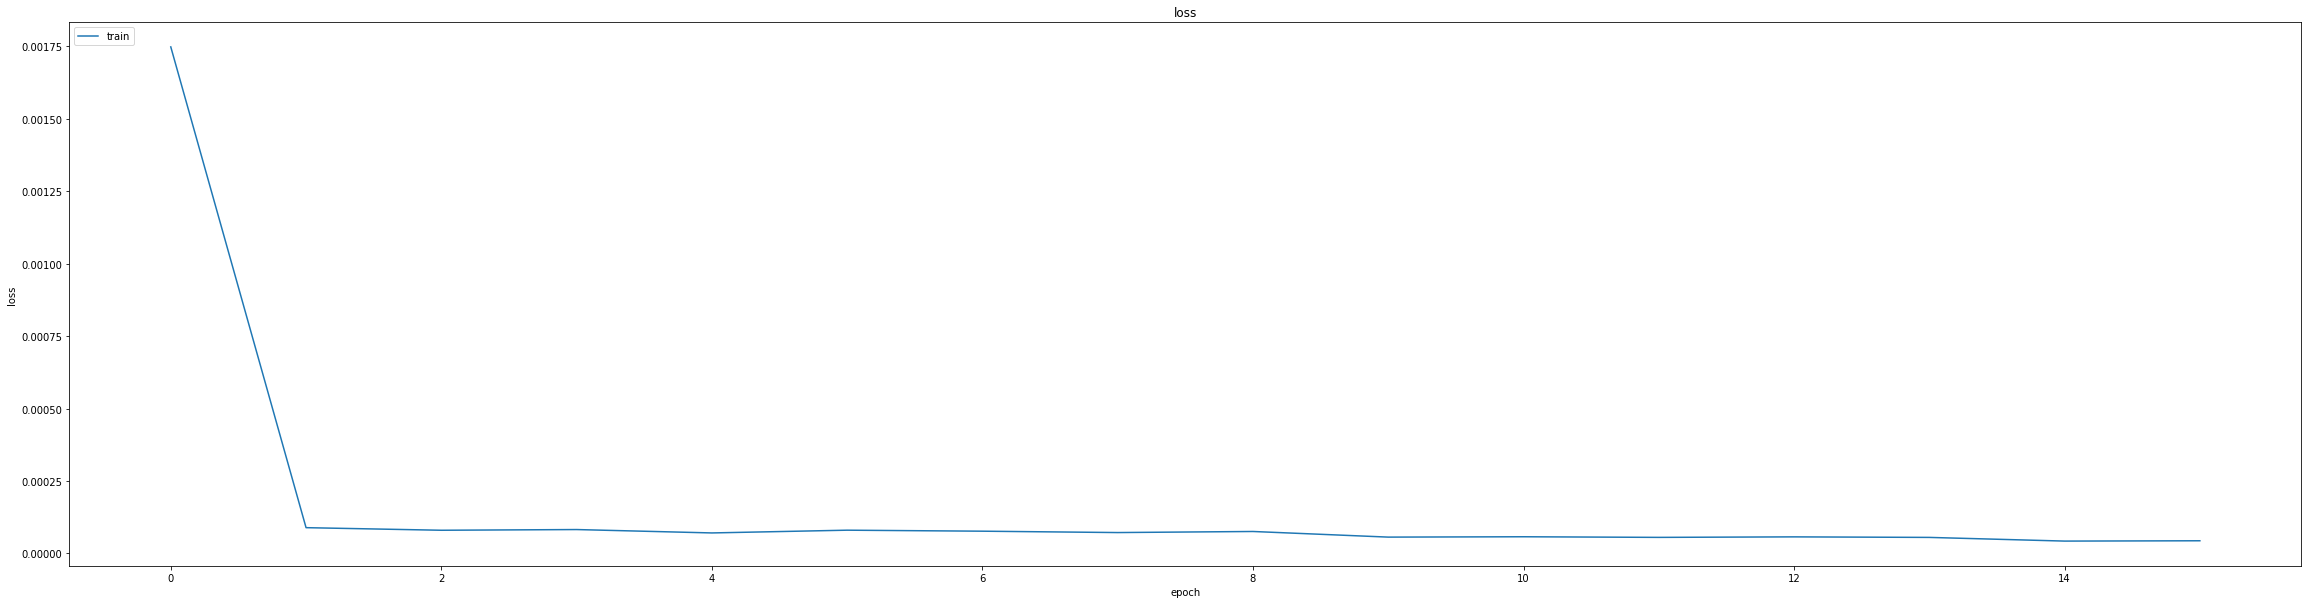

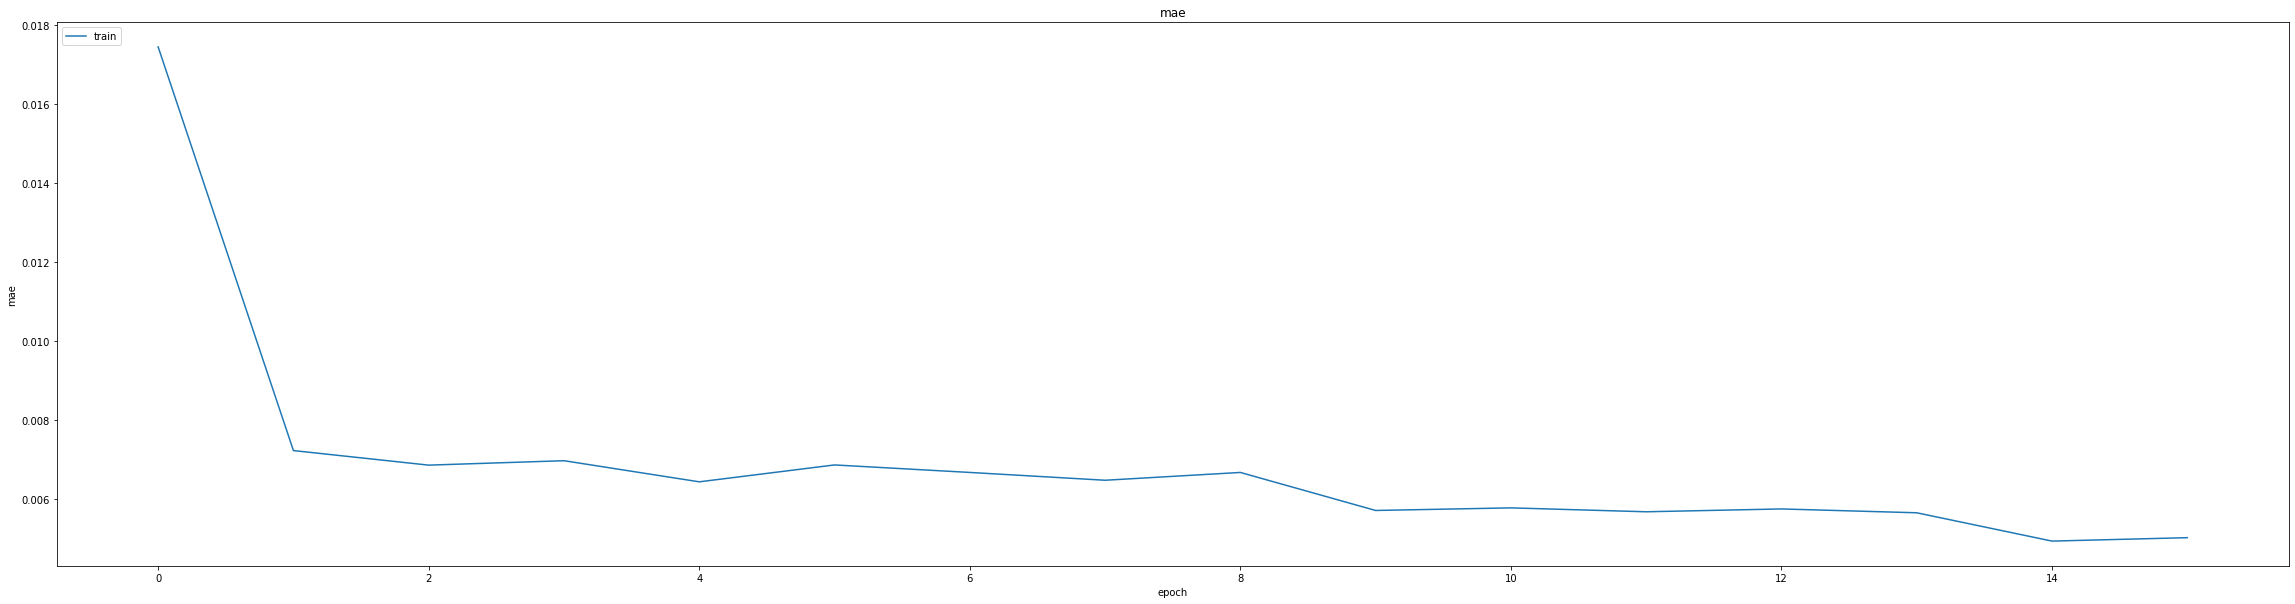

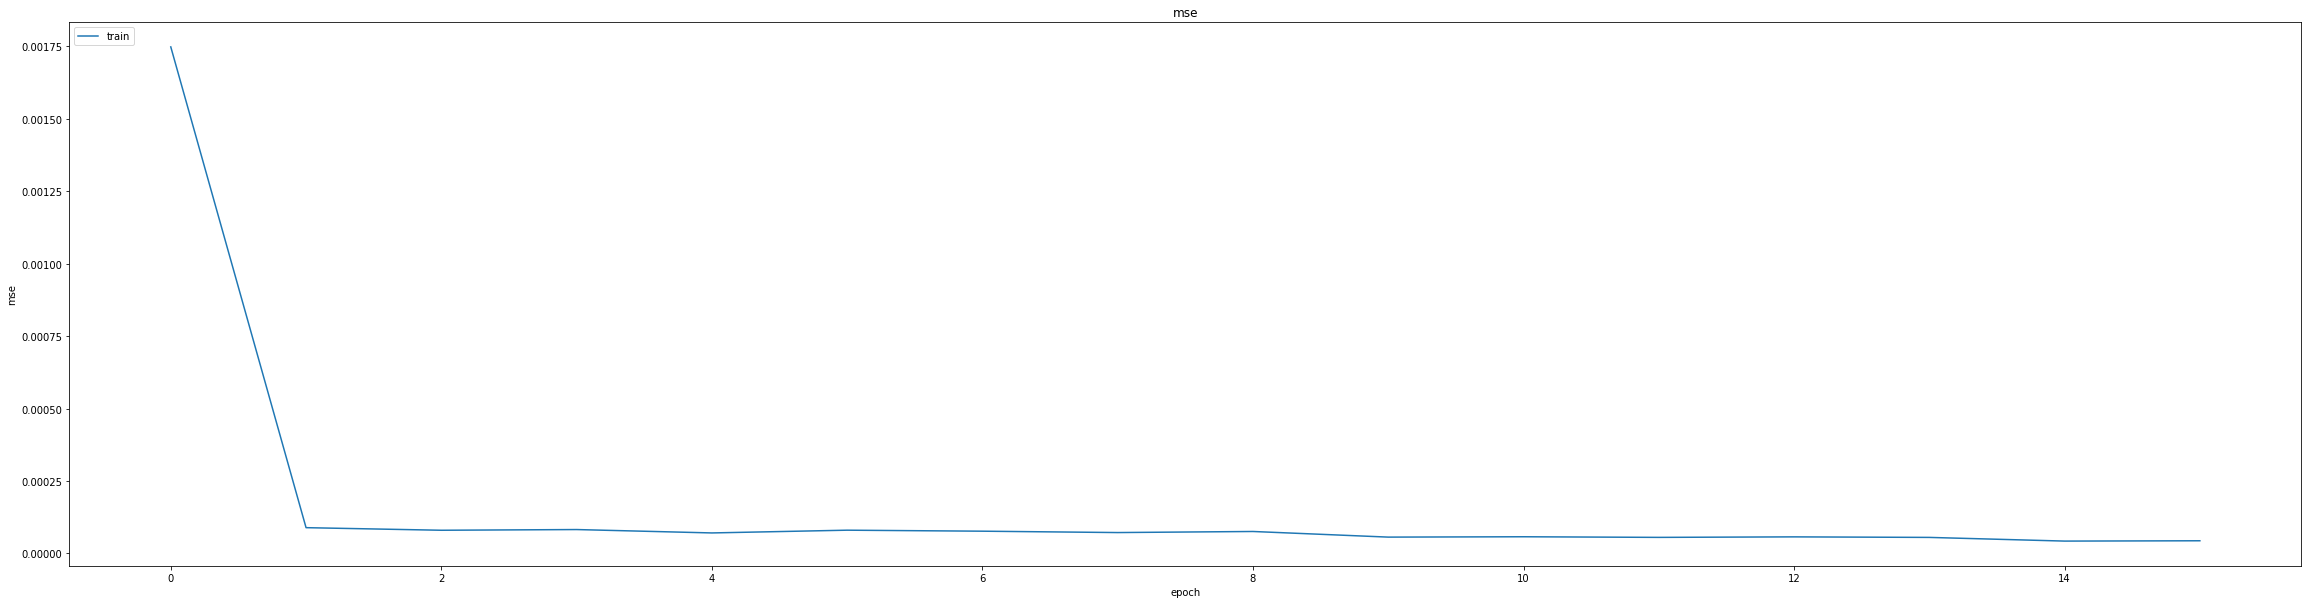

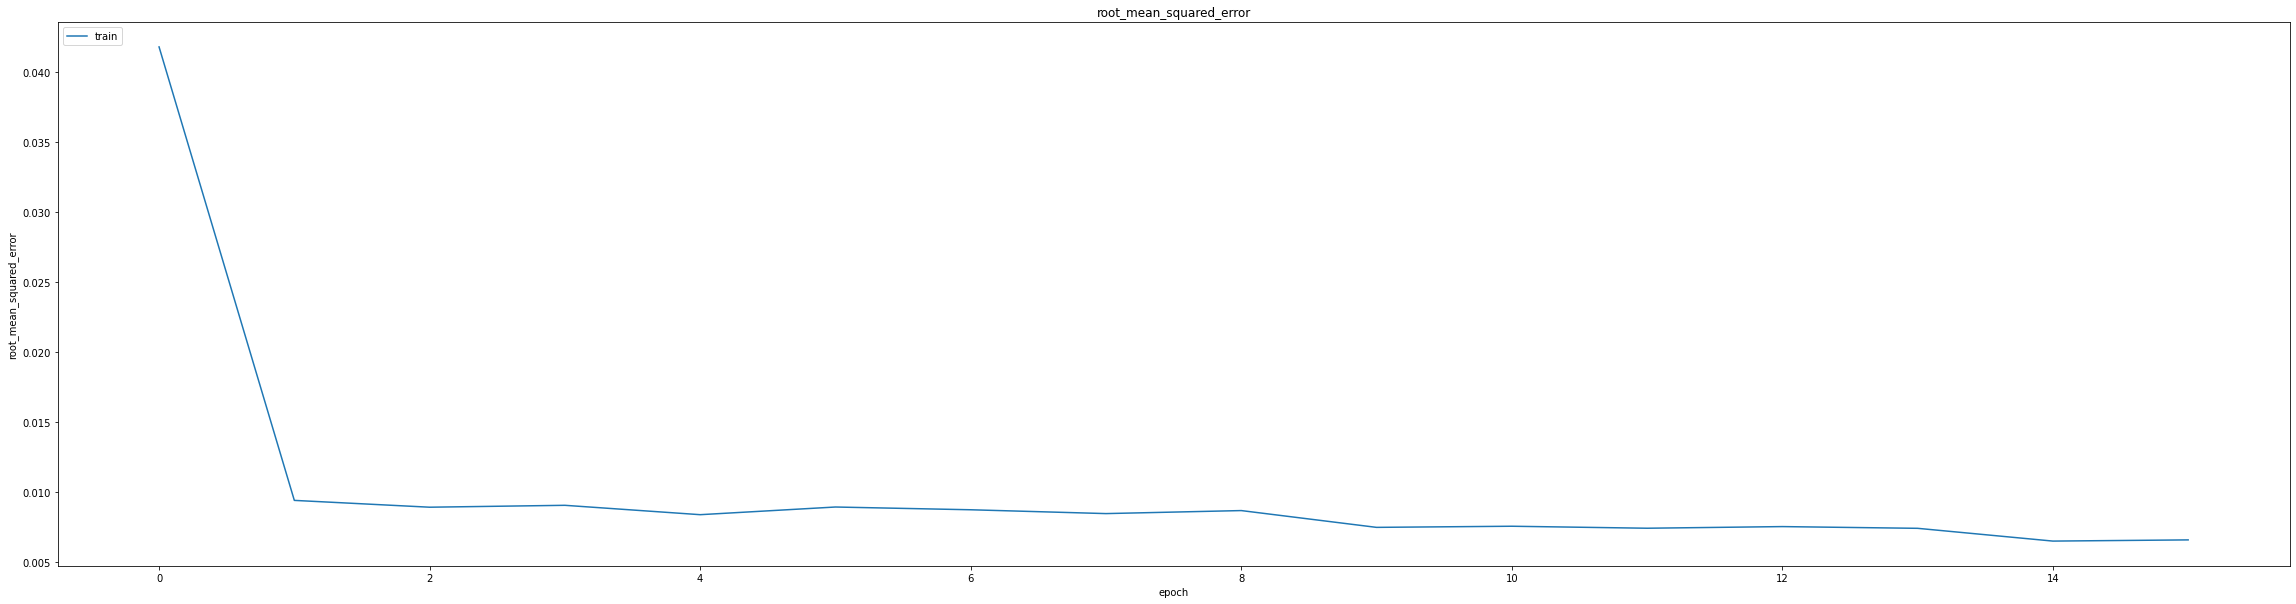

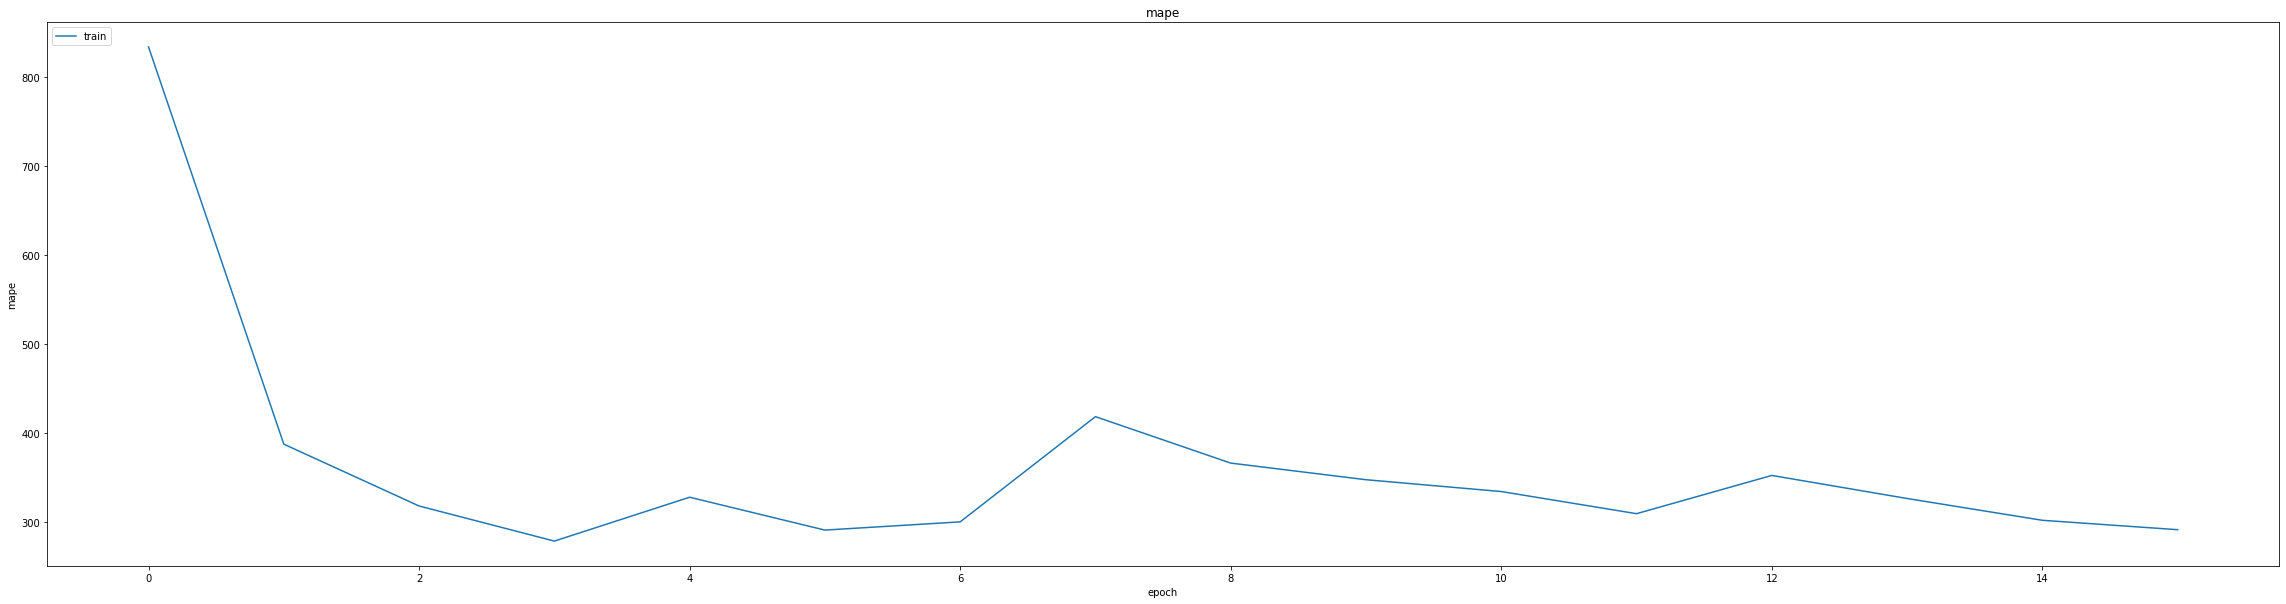

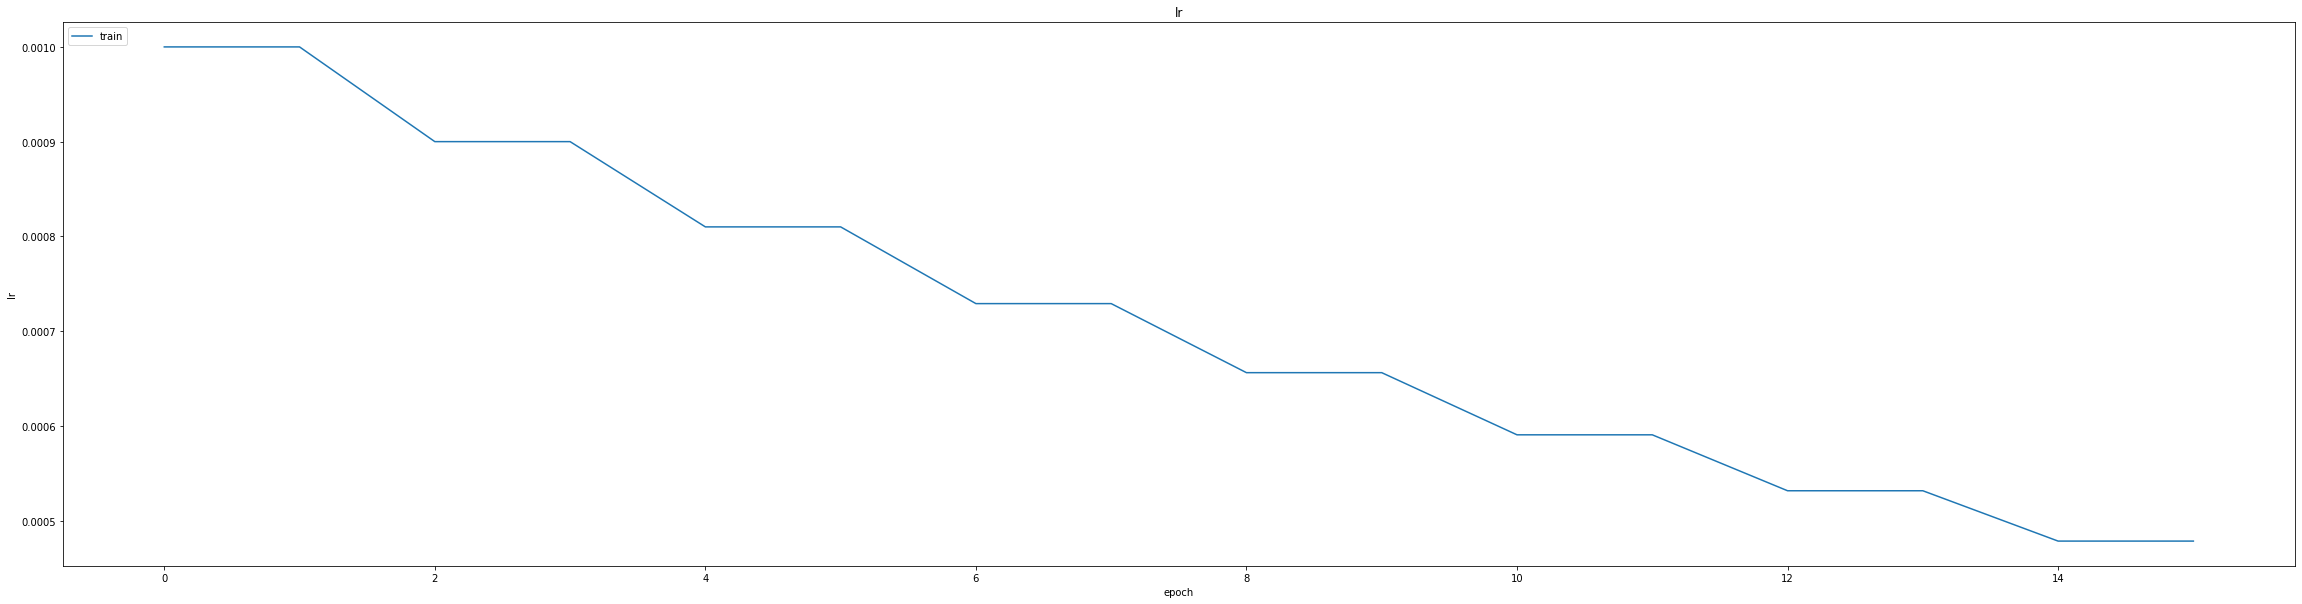

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:

print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
r2_score=thesis.R_Squared_Score(model, x_val, y_val)
print(r2_score)


0.025625508278608322
0.02998482435941696
234/234 [==============================] - 9s 35ms/step
0.9296683038279642


In [ ]:
model.load_weights("weights.best.hdf5")

234/234 [==============================] - 8s 36ms/step


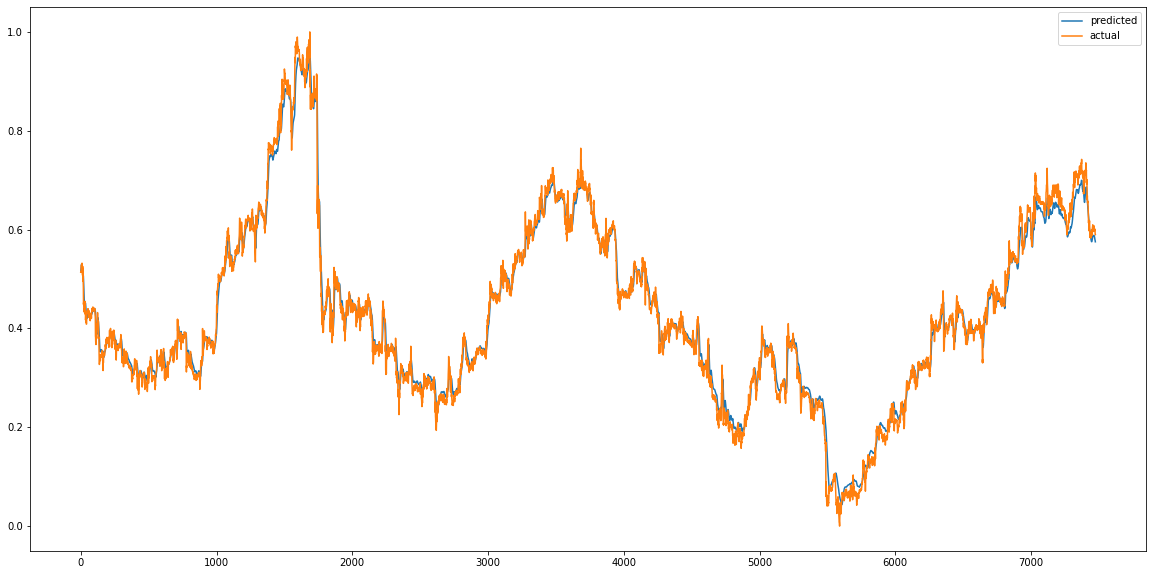

In [ ]:
val_predictions=thesis.CreatPrediction(model,x_val, y_val)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


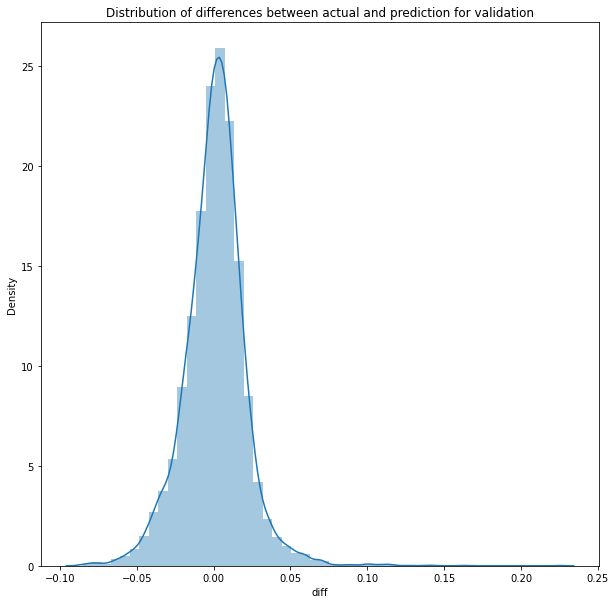

In [ ]:
val_predictions['diff'] = val_predictions['predicted'] - val_predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(val_predictions['diff']);
plt.title('Distribution of differences between actual and prediction for validation')
plt.show()

229/229 [==============================] - 9s 40ms/step


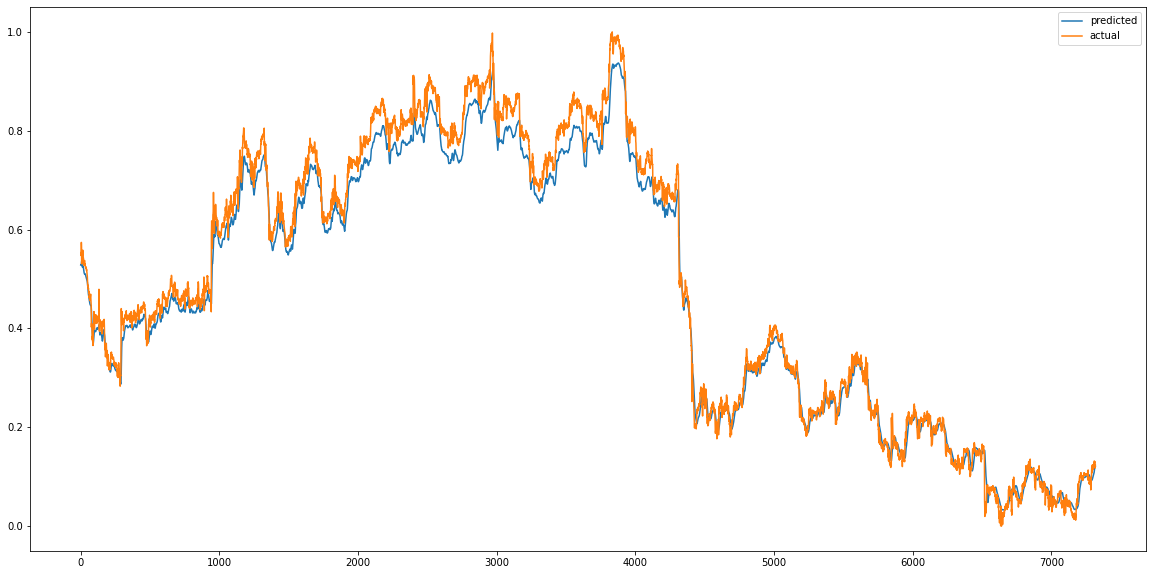

In [ ]:
predictions=thesis.CreatPrediction(model,x_test, y_test)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


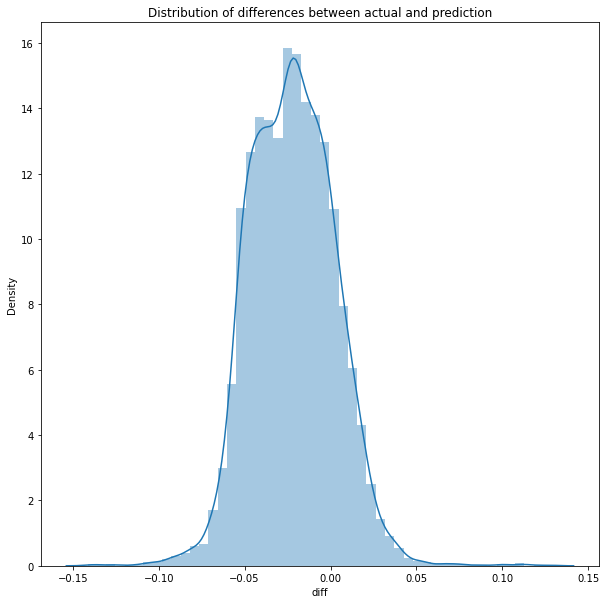

In [ ]:
predictions['diff'] = predictions['predicted'] - predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(predictions['diff']);
plt.title('Distribution of differences between actual and prediction')
plt.show()

In [ ]:
print("MSE : ", mean_squared_error(predictions['predicted'].values, predictions['actual'].values))
print("MAE : ", mean_absolute_error(predictions['predicted'].values, predictions['actual'].values))
from math import sqrt
print("RMSE : ", sqrt(mean_squared_error(predictions['predicted'].values, predictions['actual'].values)))

test_r2_score=thesis.R_Squared_Score(model, x_test, y_test)
print('R2_Score  :', r2_score)
predictions['diff'].describe()

MSE :  0.001086517516064399
MAE :  0.02695584889337948
RMSE :  0.03296236514670024
229/229 [==============================] - 8s 36ms/step
R2_Score  : 0.9296683038279642


count    7319.000000
mean       -0.022095
std         0.024463
min        -0.141390
25%        -0.040247
50%        -0.022449
75%        -0.005184
max         0.129080
Name: diff, dtype: float64